# pycisTopic analysis

Full dataset, using consensus peak regions.

In [1]:
import pycisTopic

%load_ext nb_black
import warnings

warnings.filterwarnings("ignore")
warnings.simplefilter("ignore")
import pickle
import pandas as pd
import os

<IPython.core.display.Javascript object>

In [2]:
!pwd

/lustre1/project/stg_00090/scatac_benchmark/fixedcells_9_individual_malefemale_celltypefair


<IPython.core.display.Javascript object>

In [3]:
wdir = "/lustre1/project/stg_00090/scatac_benchmark/fixedcells_9_individual_malefemale_celltypefair"
os.chdir(wdir)

<IPython.core.display.Javascript object>

In [4]:
# create output directory:
f_final_dir = os.path.join(wdir, "downstream_analysis")
if not os.path.exists(f_final_dir):
    os.makedirs(f_final_dir)

<IPython.core.display.Javascript object>

In [5]:
import glob

<IPython.core.display.Javascript object>

## Save/load cisTopic objects

In [13]:
cto_consensus_paths = sorted(glob.glob(f"male_female_celltypefaircto/*dimreduc.pkl"))
cistopic_obj_path_dict = {
    x.split("/")[-1].split(f"_")[0]: x for x in cto_consensus_paths
}
cistopic_obj_path_dict

{'10xmultiome': 'male_female_celltypefaircto/10xmultiome_malefemalecelltypefair.model_29topics.dimreduc.pkl',
 '10xv11': 'male_female_celltypefaircto/10xv11_malefemalecelltypefair.model_29topics.dimreduc.pkl',
 '10xv1': 'male_female_celltypefaircto/10xv1_malefemalecelltypefair.model_25topics.dimreduc.pkl',
 '10xv2': 'male_female_celltypefaircto/10xv2_malefemalecelltypefair.model_30topics.dimreduc.pkl',
 'ddseq': 'male_female_celltypefaircto/ddseq_malefemalecelltypefair.model_24topics.dimreduc.pkl',
 'hydrop': 'male_female_celltypefaircto/hydrop_malefemalecelltypefair.model_29topics.dimreduc.pkl',
 'mtscatac': 'male_female_celltypefaircto/mtscatac_malefemalecelltypefair.model_26topics.dimreduc.pkl',
 's3atac': 'male_female_celltypefaircto/s3atac_malefemalecelltypefair.model_24topics.dimreduc.pkl'}

<IPython.core.display.Javascript object>

## Topic binarization & QC

In [14]:
from pycisTopic.topic_binarization import binarize_topics
from pycisTopic.topic_qc import compute_topic_metrics, plot_topic_qc
from pycisTopic.utils import fig2img
import matplotlib.pyplot as plt
from pycisTopic.topic_qc import topic_annotation
from pycisTopic.diff_features import (
    impute_accessibility,
    normalize_scores,
    find_highly_variable_features,
    find_diff_features,
)
from pycisTopic.clust_vis import plot_imputed_features
import numpy as np
import copy

<IPython.core.display.Javascript object>

### Binarize the topic-region distributions

Loading male_female_celltypefaircto/10xmultiome_malefemalecelltypefair.model_29topics.dimreduc.pkl


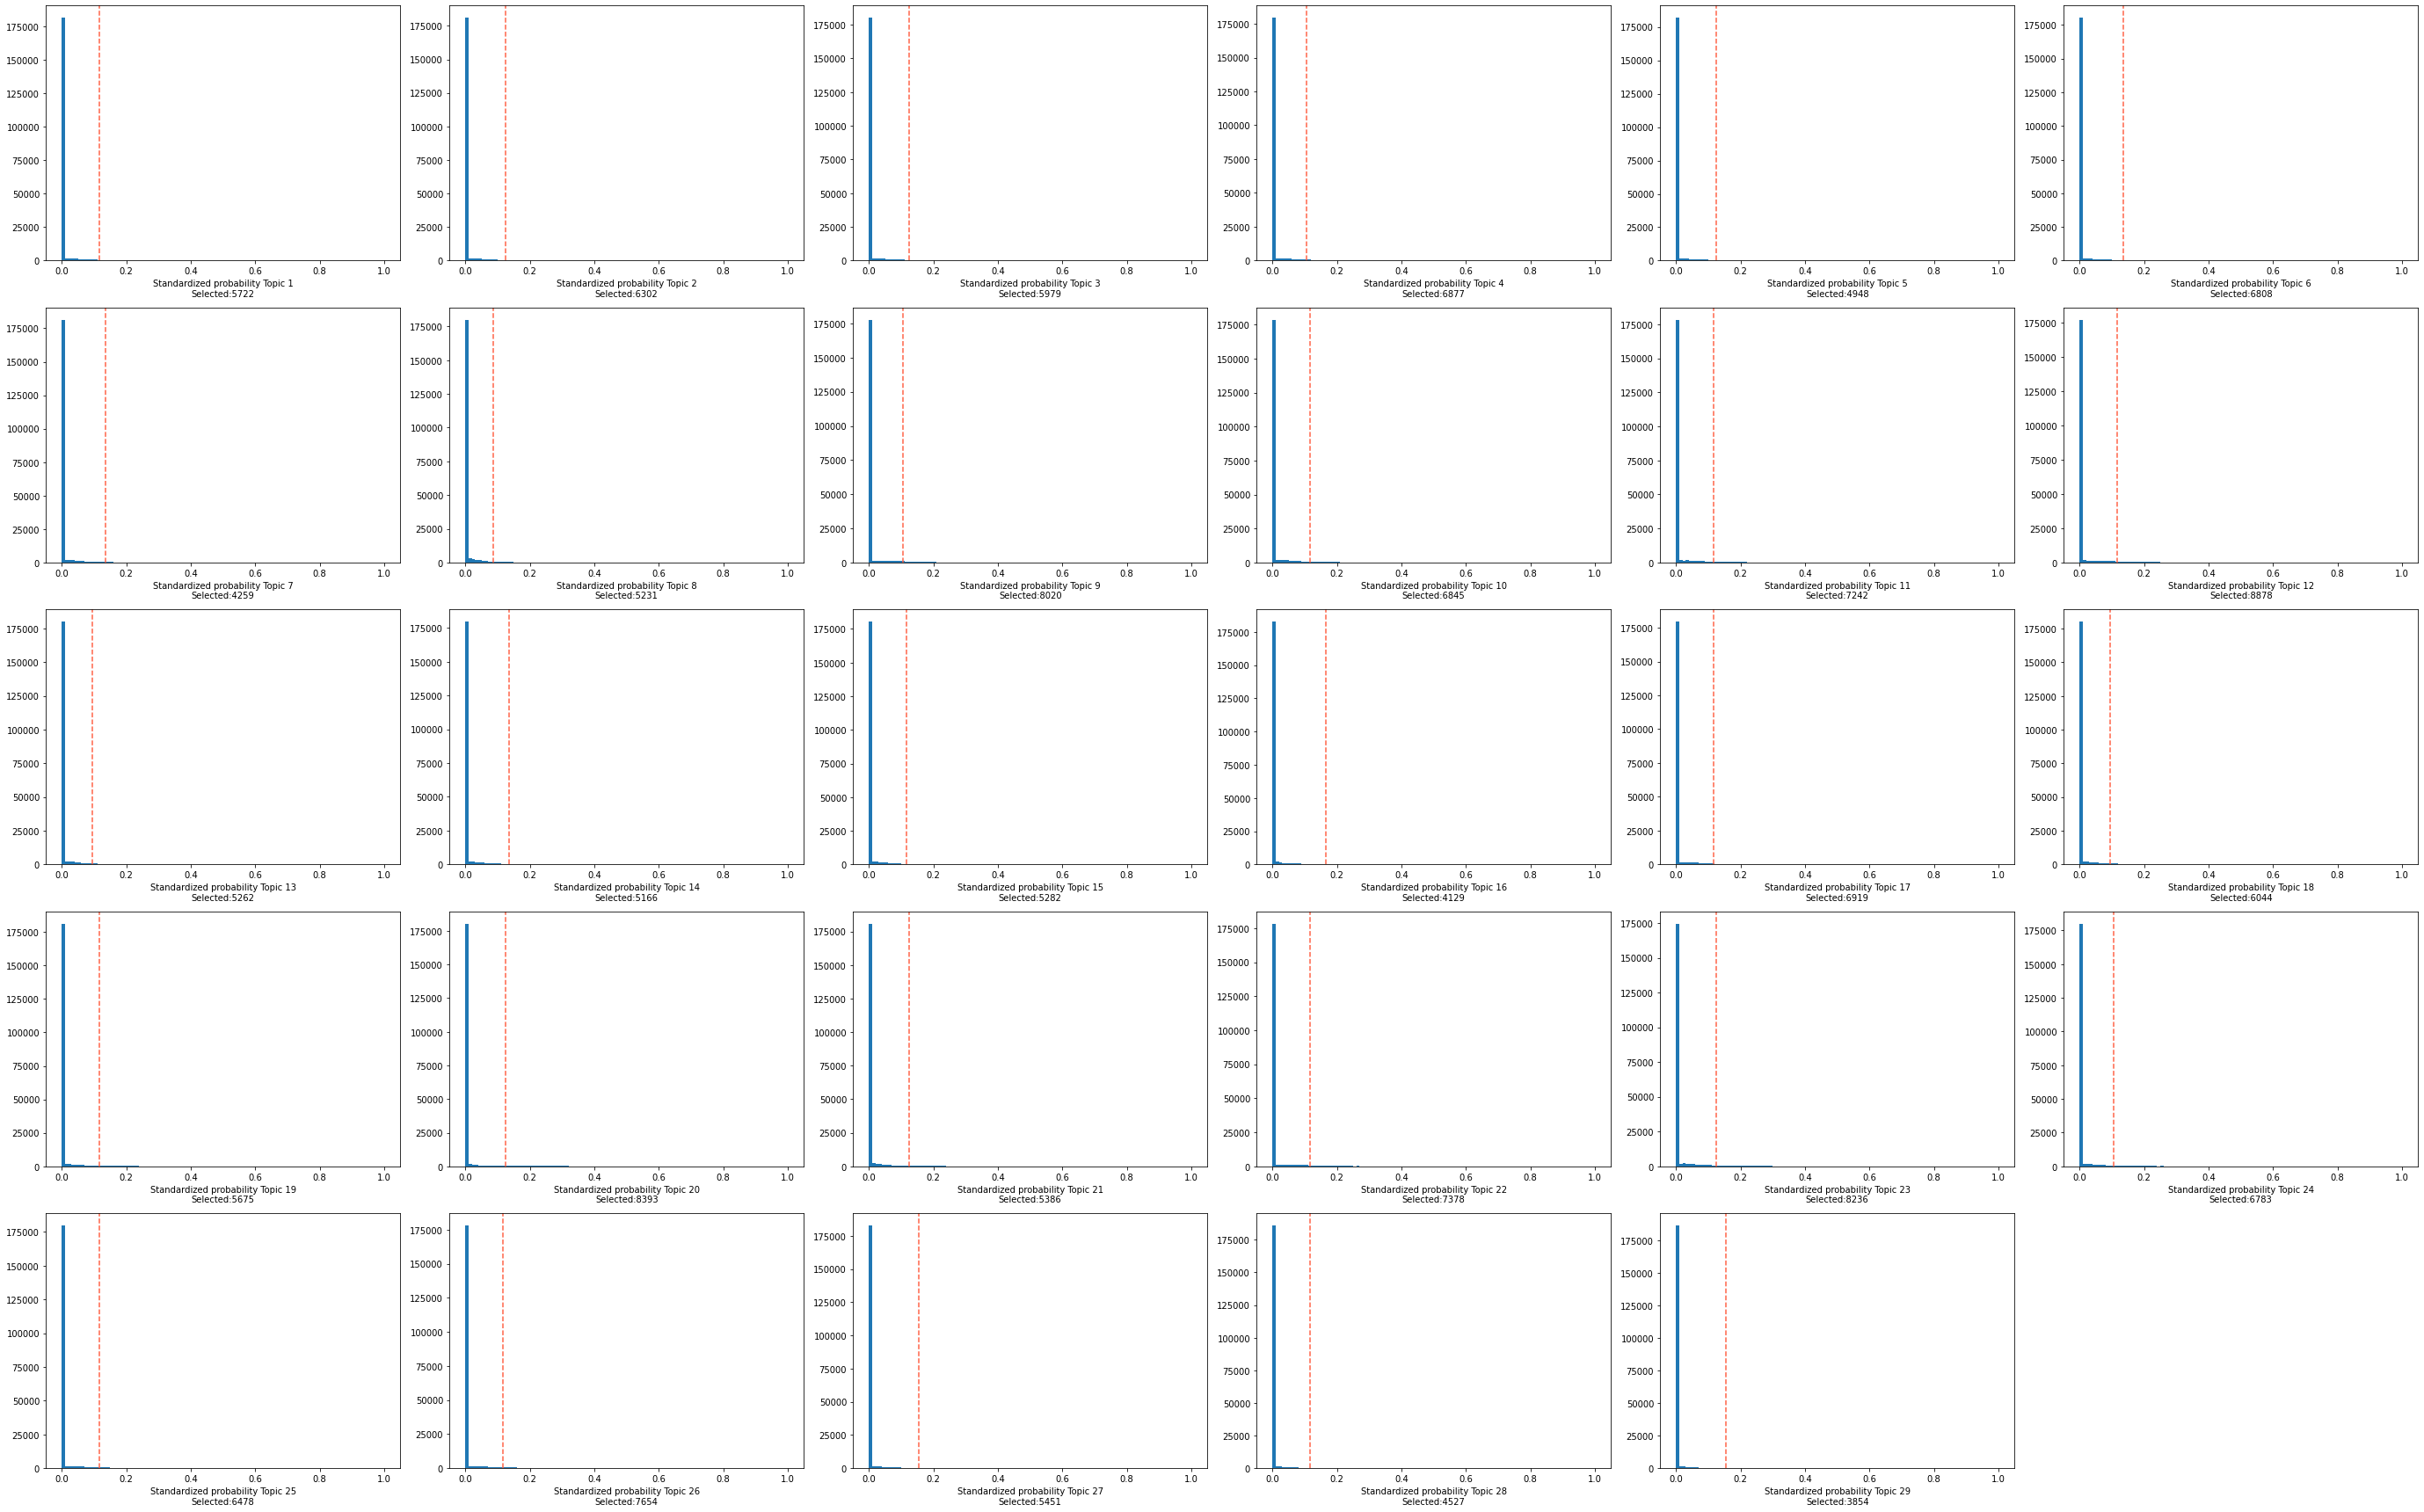

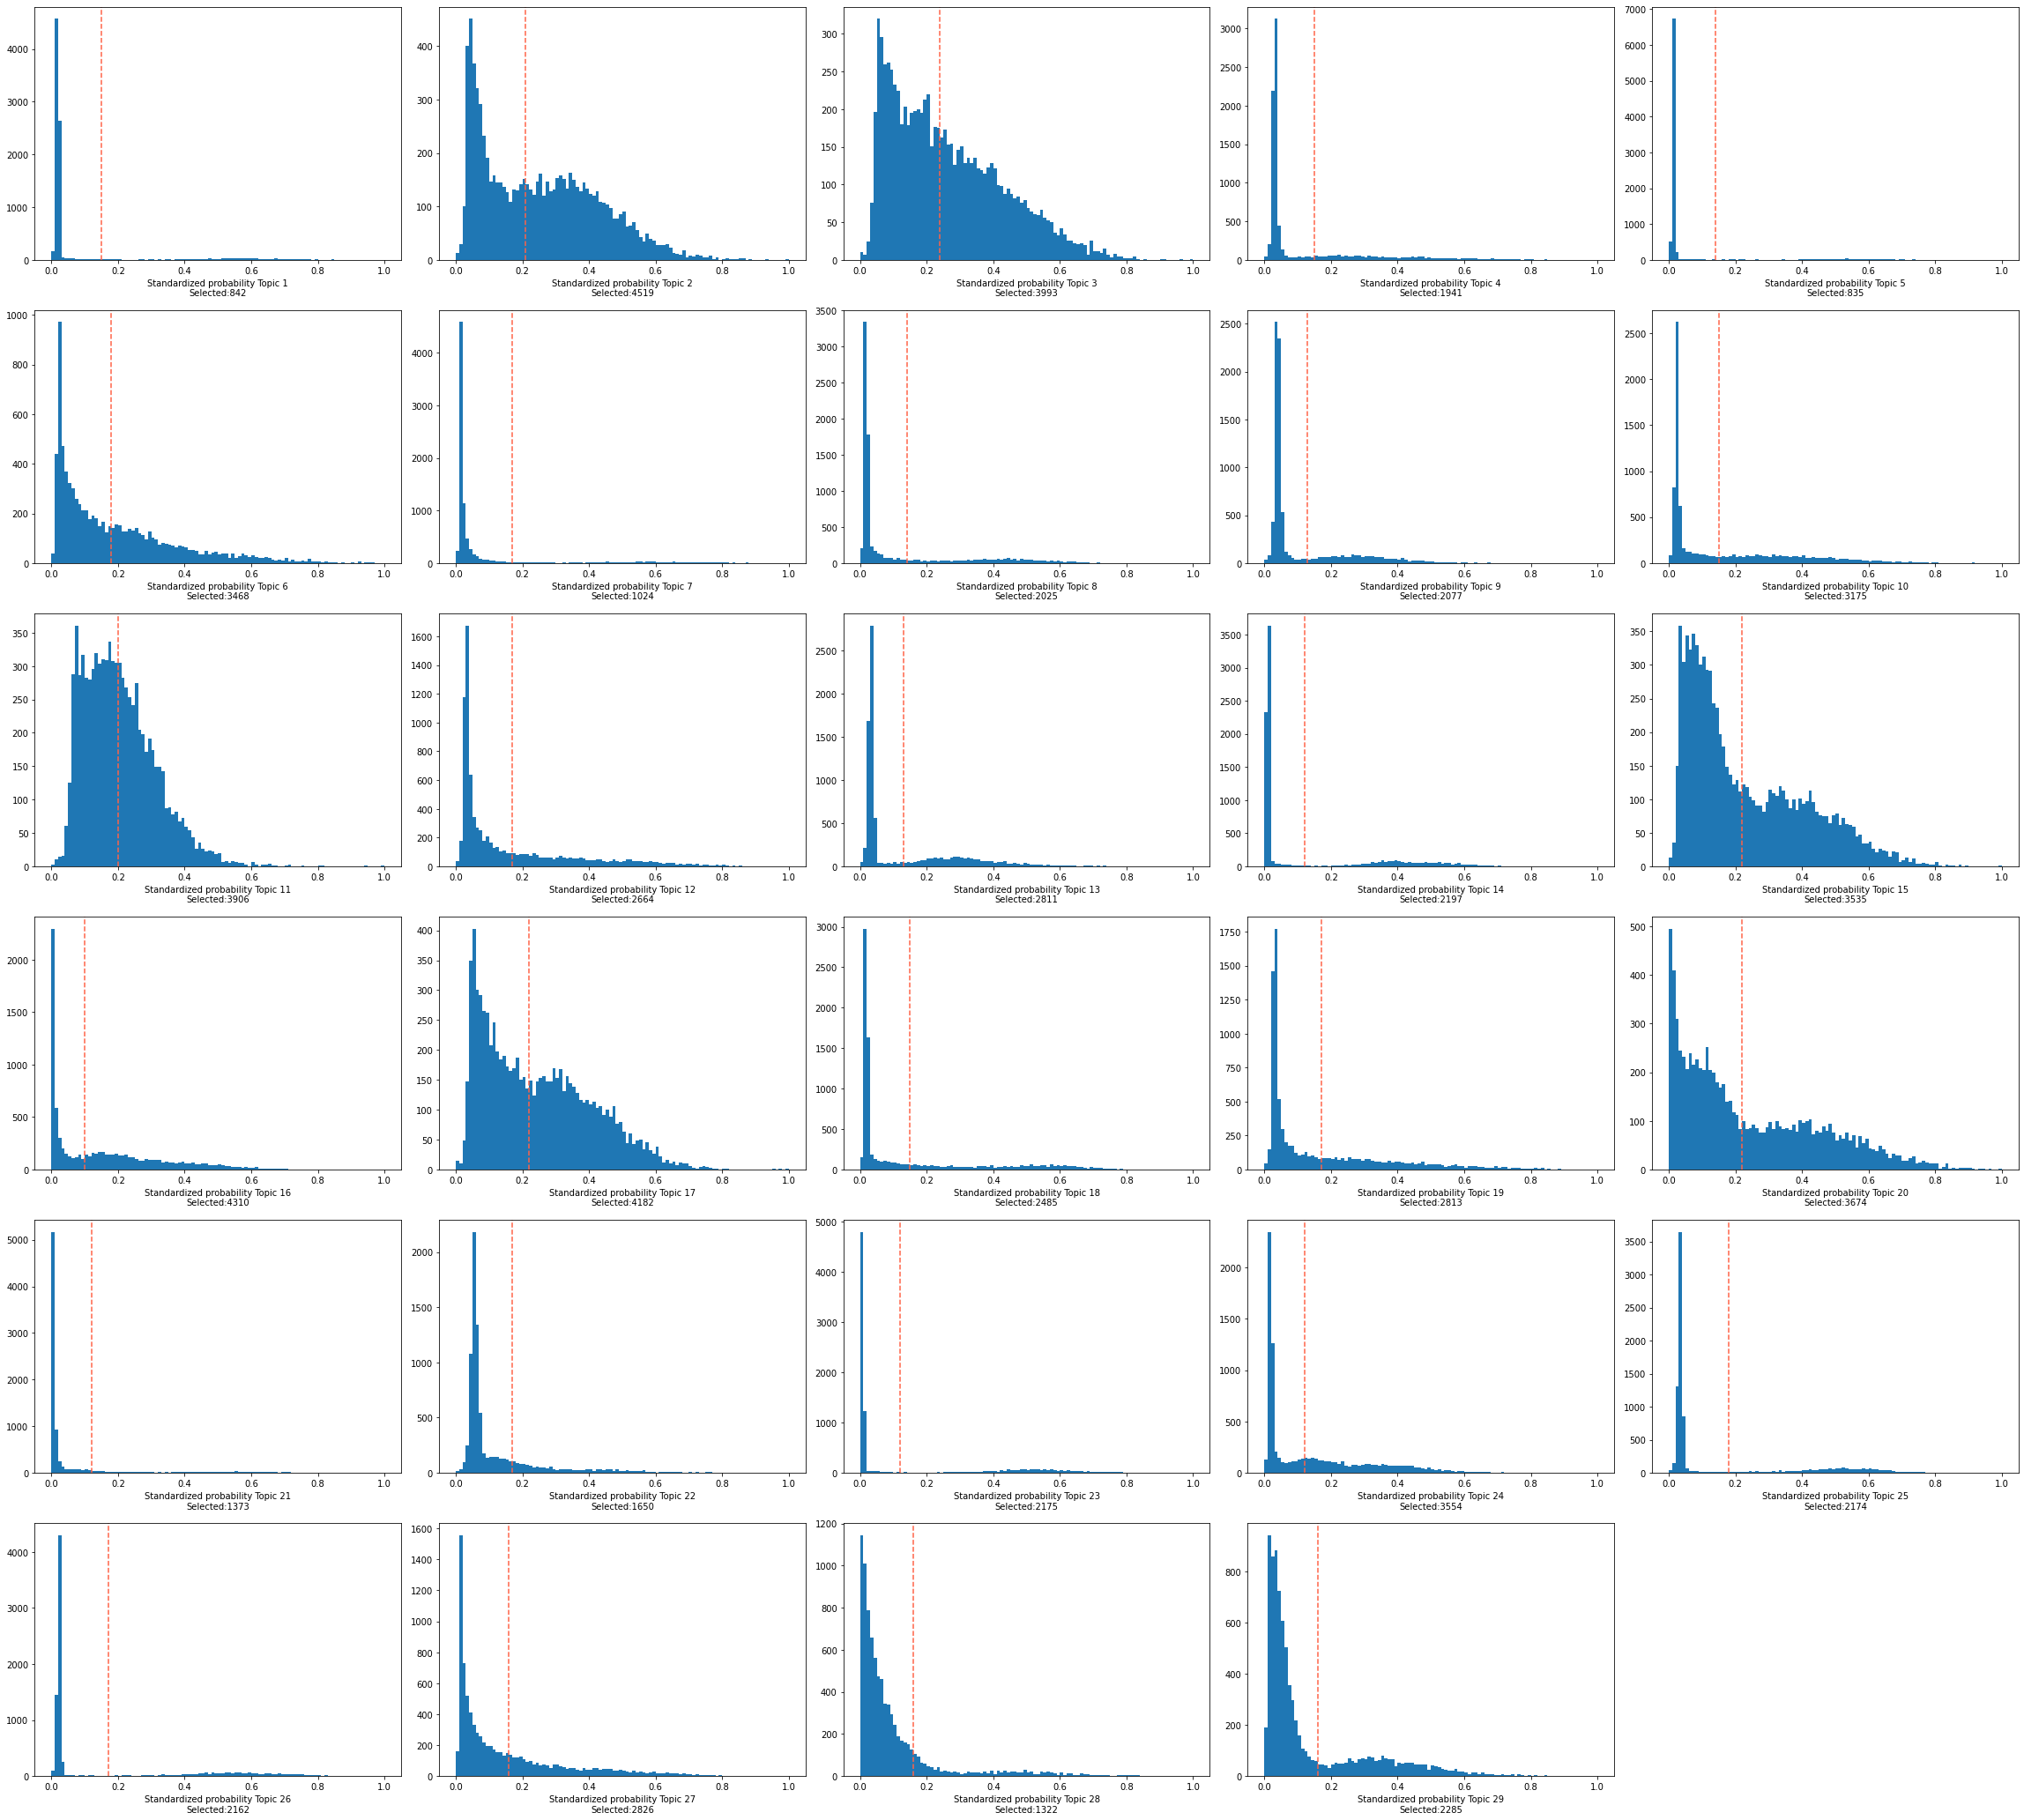

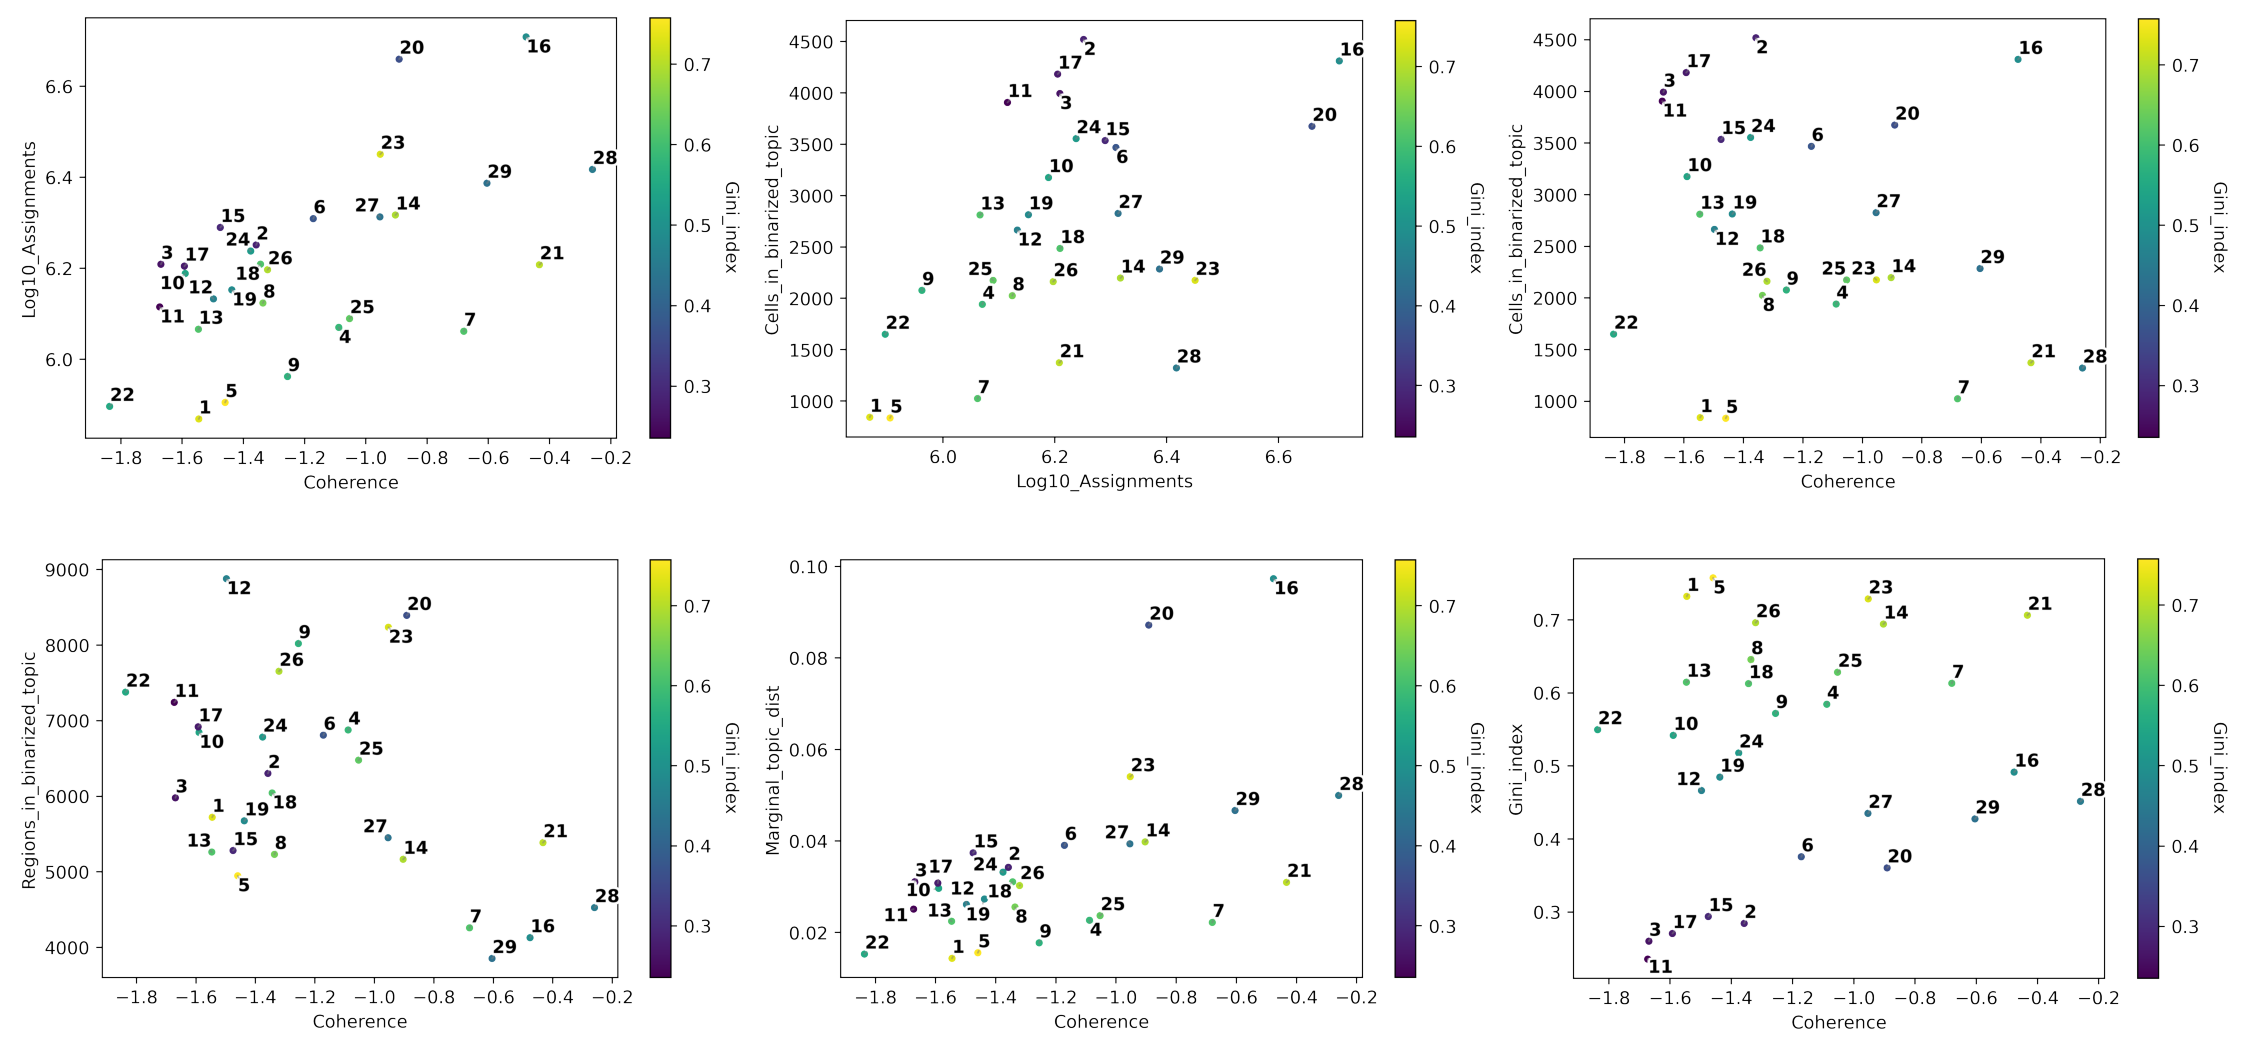

2023-03-08 11:48:03,185 cisTopic     INFO     Imputing drop-outs
2023-03-08 11:48:06,530 cisTopic     INFO     Scaling
2023-03-08 11:48:09,865 cisTopic     INFO     Keep non zero rows
2023-03-08 11:48:14,733 cisTopic     INFO     Imputed accessibility sparsity: 0.4355009911973863
2023-03-08 11:48:14,734 cisTopic     INFO     Create CistopicImputedFeatures object
2023-03-08 11:48:14,735 cisTopic     INFO     Done!
2023-03-08 11:48:14,736 cisTopic     INFO     Normalizing imputed data
2023-03-08 11:48:28,507 cisTopic     INFO     Done!
2023-03-08 11:48:59,925 cisTopic     INFO     Calculating mean
2023-03-08 11:49:01,506 cisTopic     INFO     Calculating variance


<Figure size 432x288 with 0 Axes>

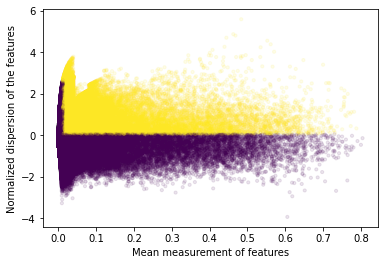

2023-03-08 11:49:17,499 cisTopic     INFO     Done!
Found 48708 variable regions
Cytotoxic T cell
CD4+ T cell
Natural killer cell
CD14+ monocyte
B cell
CD16+ monocyte
Dendritic cell


2023-03-08 11:49:23,697	INFO services.py:1470 -- View the Ray dashboard at http://127.0.0.1:8265


(markers_ray pid=1163275) 2023-03-08 11:49:28,441 cisTopic     INFO     Formatting data for 10xmultiome_sampleA_Cytotoxic T cell_VS_10xmultiome_sampleB_Cytotoxic T cell
(markers_ray pid=1163269) 2023-03-08 11:49:29,010 cisTopic     INFO     Formatting data for 10xmultiome_sampleB_Cytotoxic T cell_VS_10xmultiome_sampleA_Cytotoxic T cell
(markers_ray pid=1163282) 2023-03-08 11:49:29,748 cisTopic     INFO     Formatting data for 10xmultiome_sampleA_CD4+ T cell_VS_10xmultiome_sampleB_CD4+ T cell
(markers_ray pid=1163275) 2023-03-08 11:49:30,001 cisTopic     INFO     Computing p-value for 10xmultiome_sampleA_Cytotoxic T cell_VS_10xmultiome_sampleB_Cytotoxic T cell
(markers_ray pid=1163271) 2023-03-08 11:49:30,403 cisTopic     INFO     Formatting data for 10xmultiome_sampleB_CD4+ T cell_VS_10xmultiome_sampleA_CD4+ T cell
(markers_ray pid=1163269) 2023-03-08 11:49:30,511 cisTopic     INFO     Computing p-value for 10xmultiome_sampleB_Cytotoxic T cell_VS_10xmultiome_sampleA_Cytotoxic T cell
(m

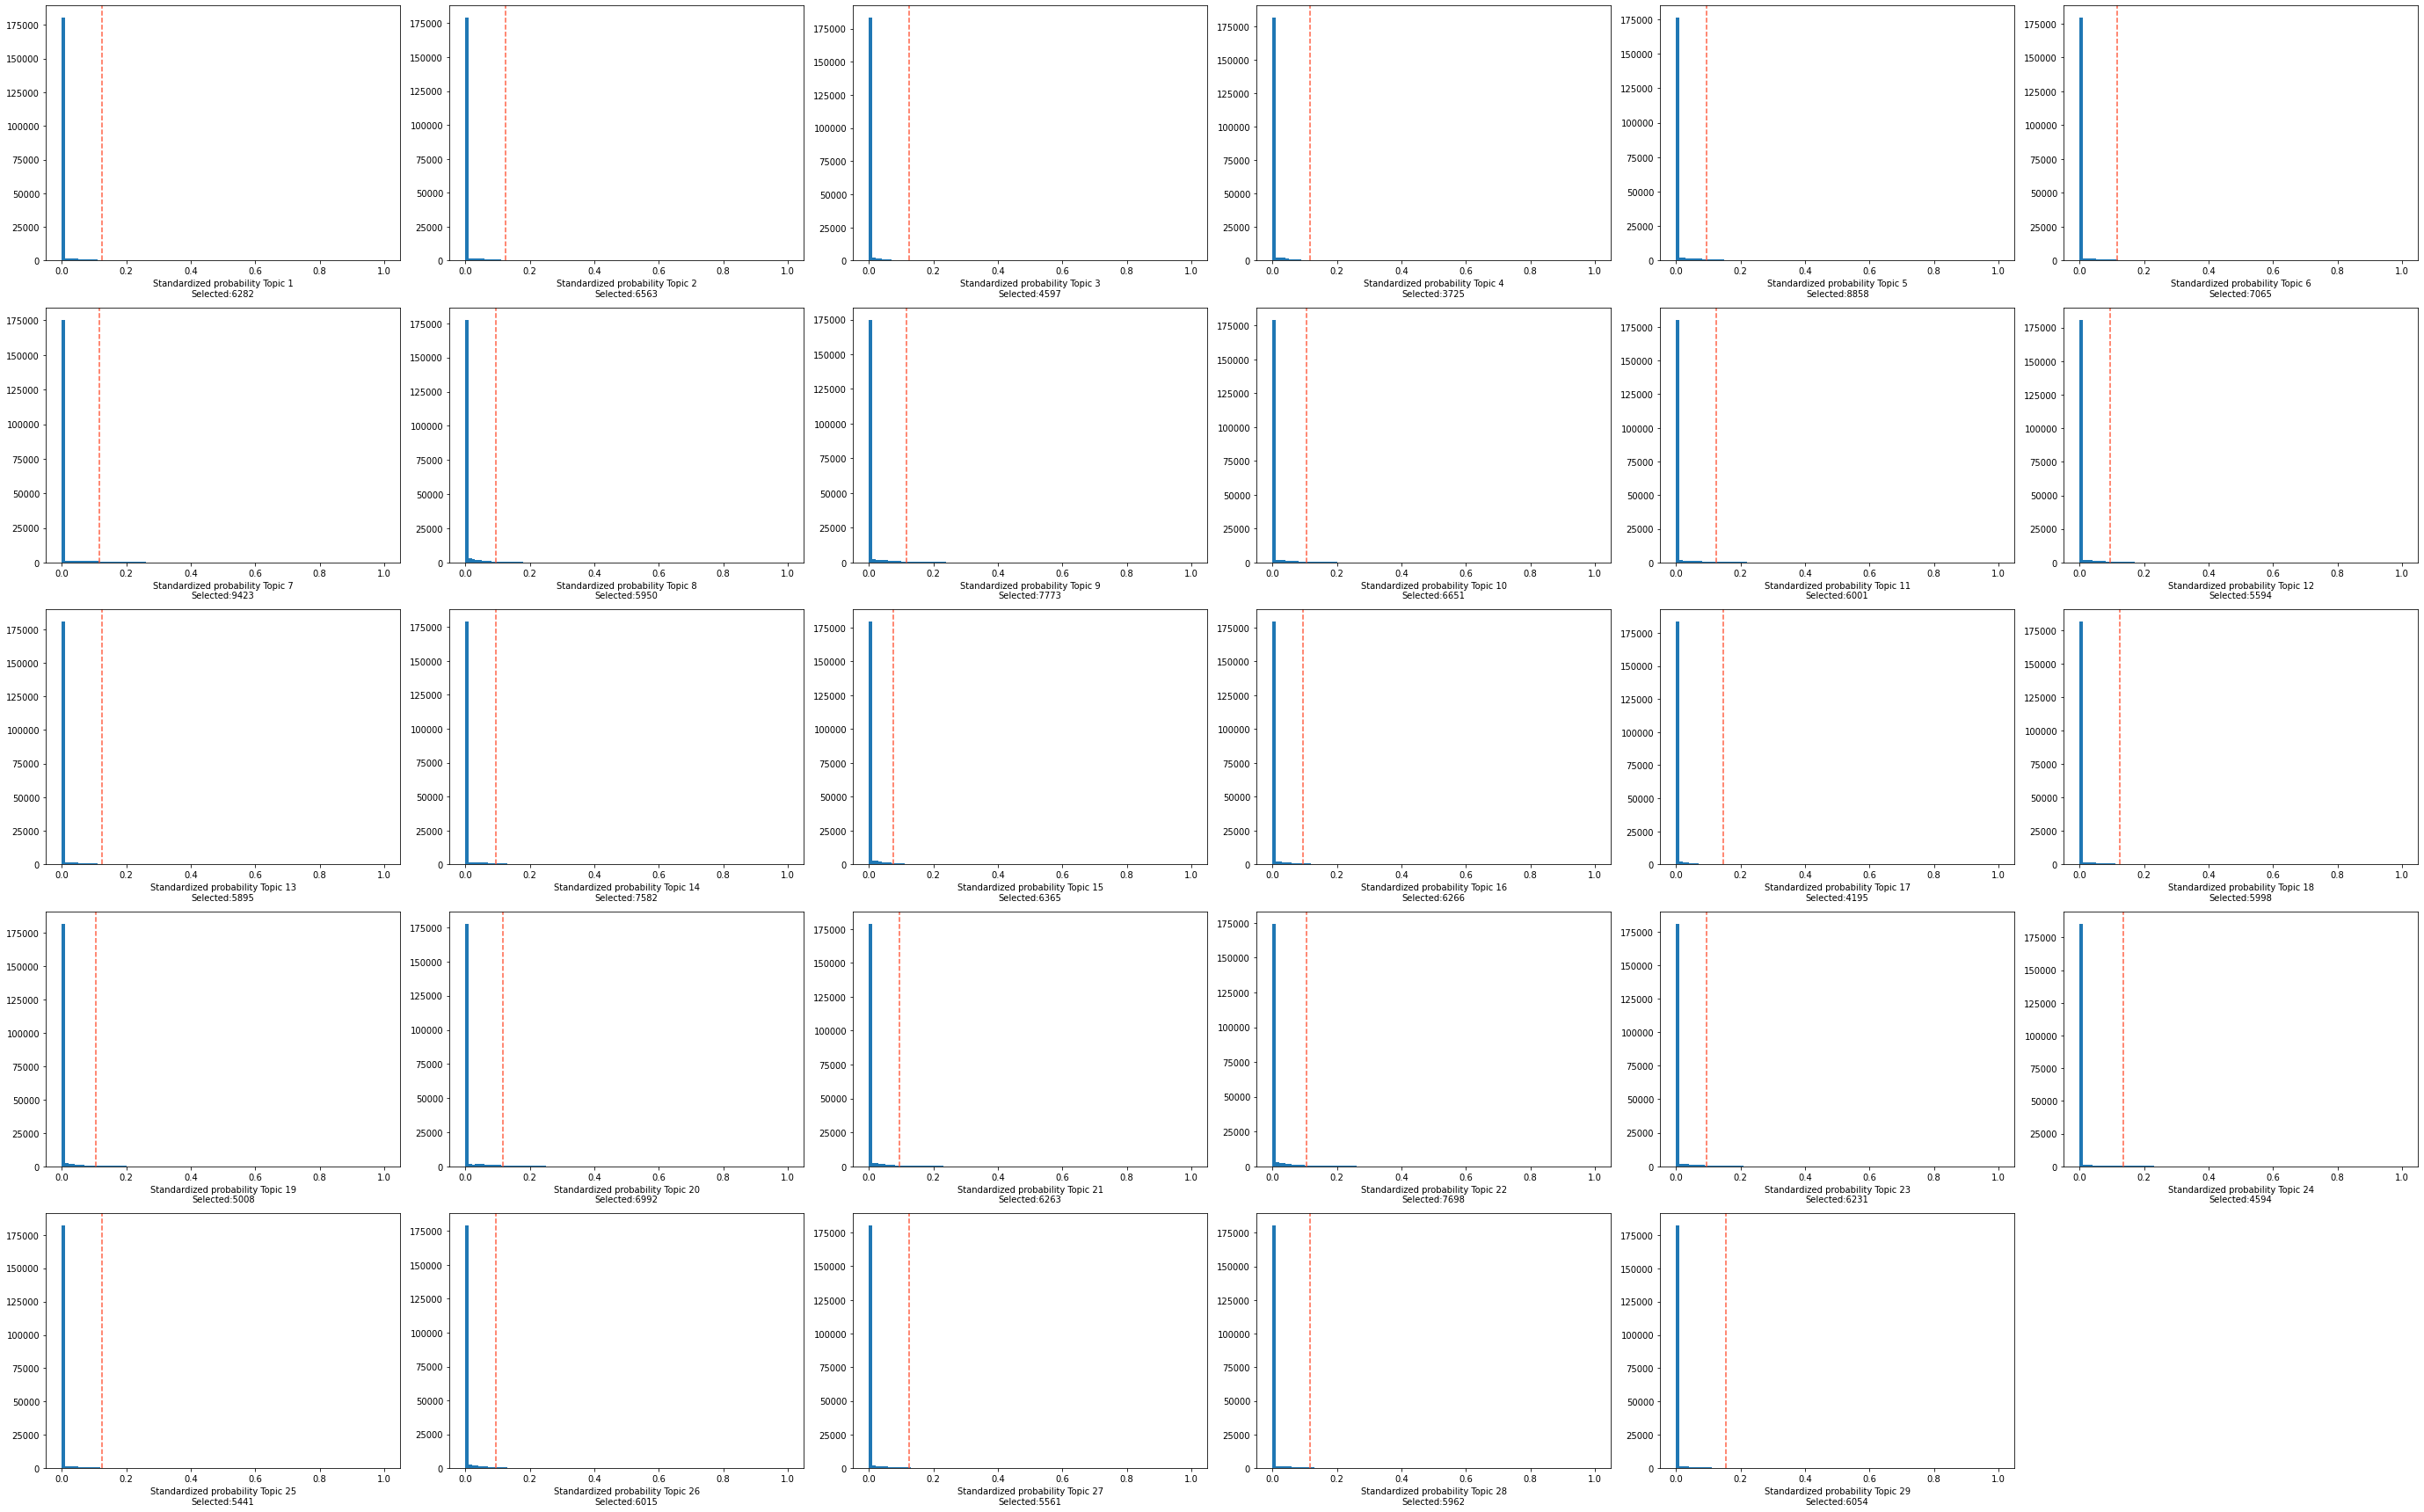

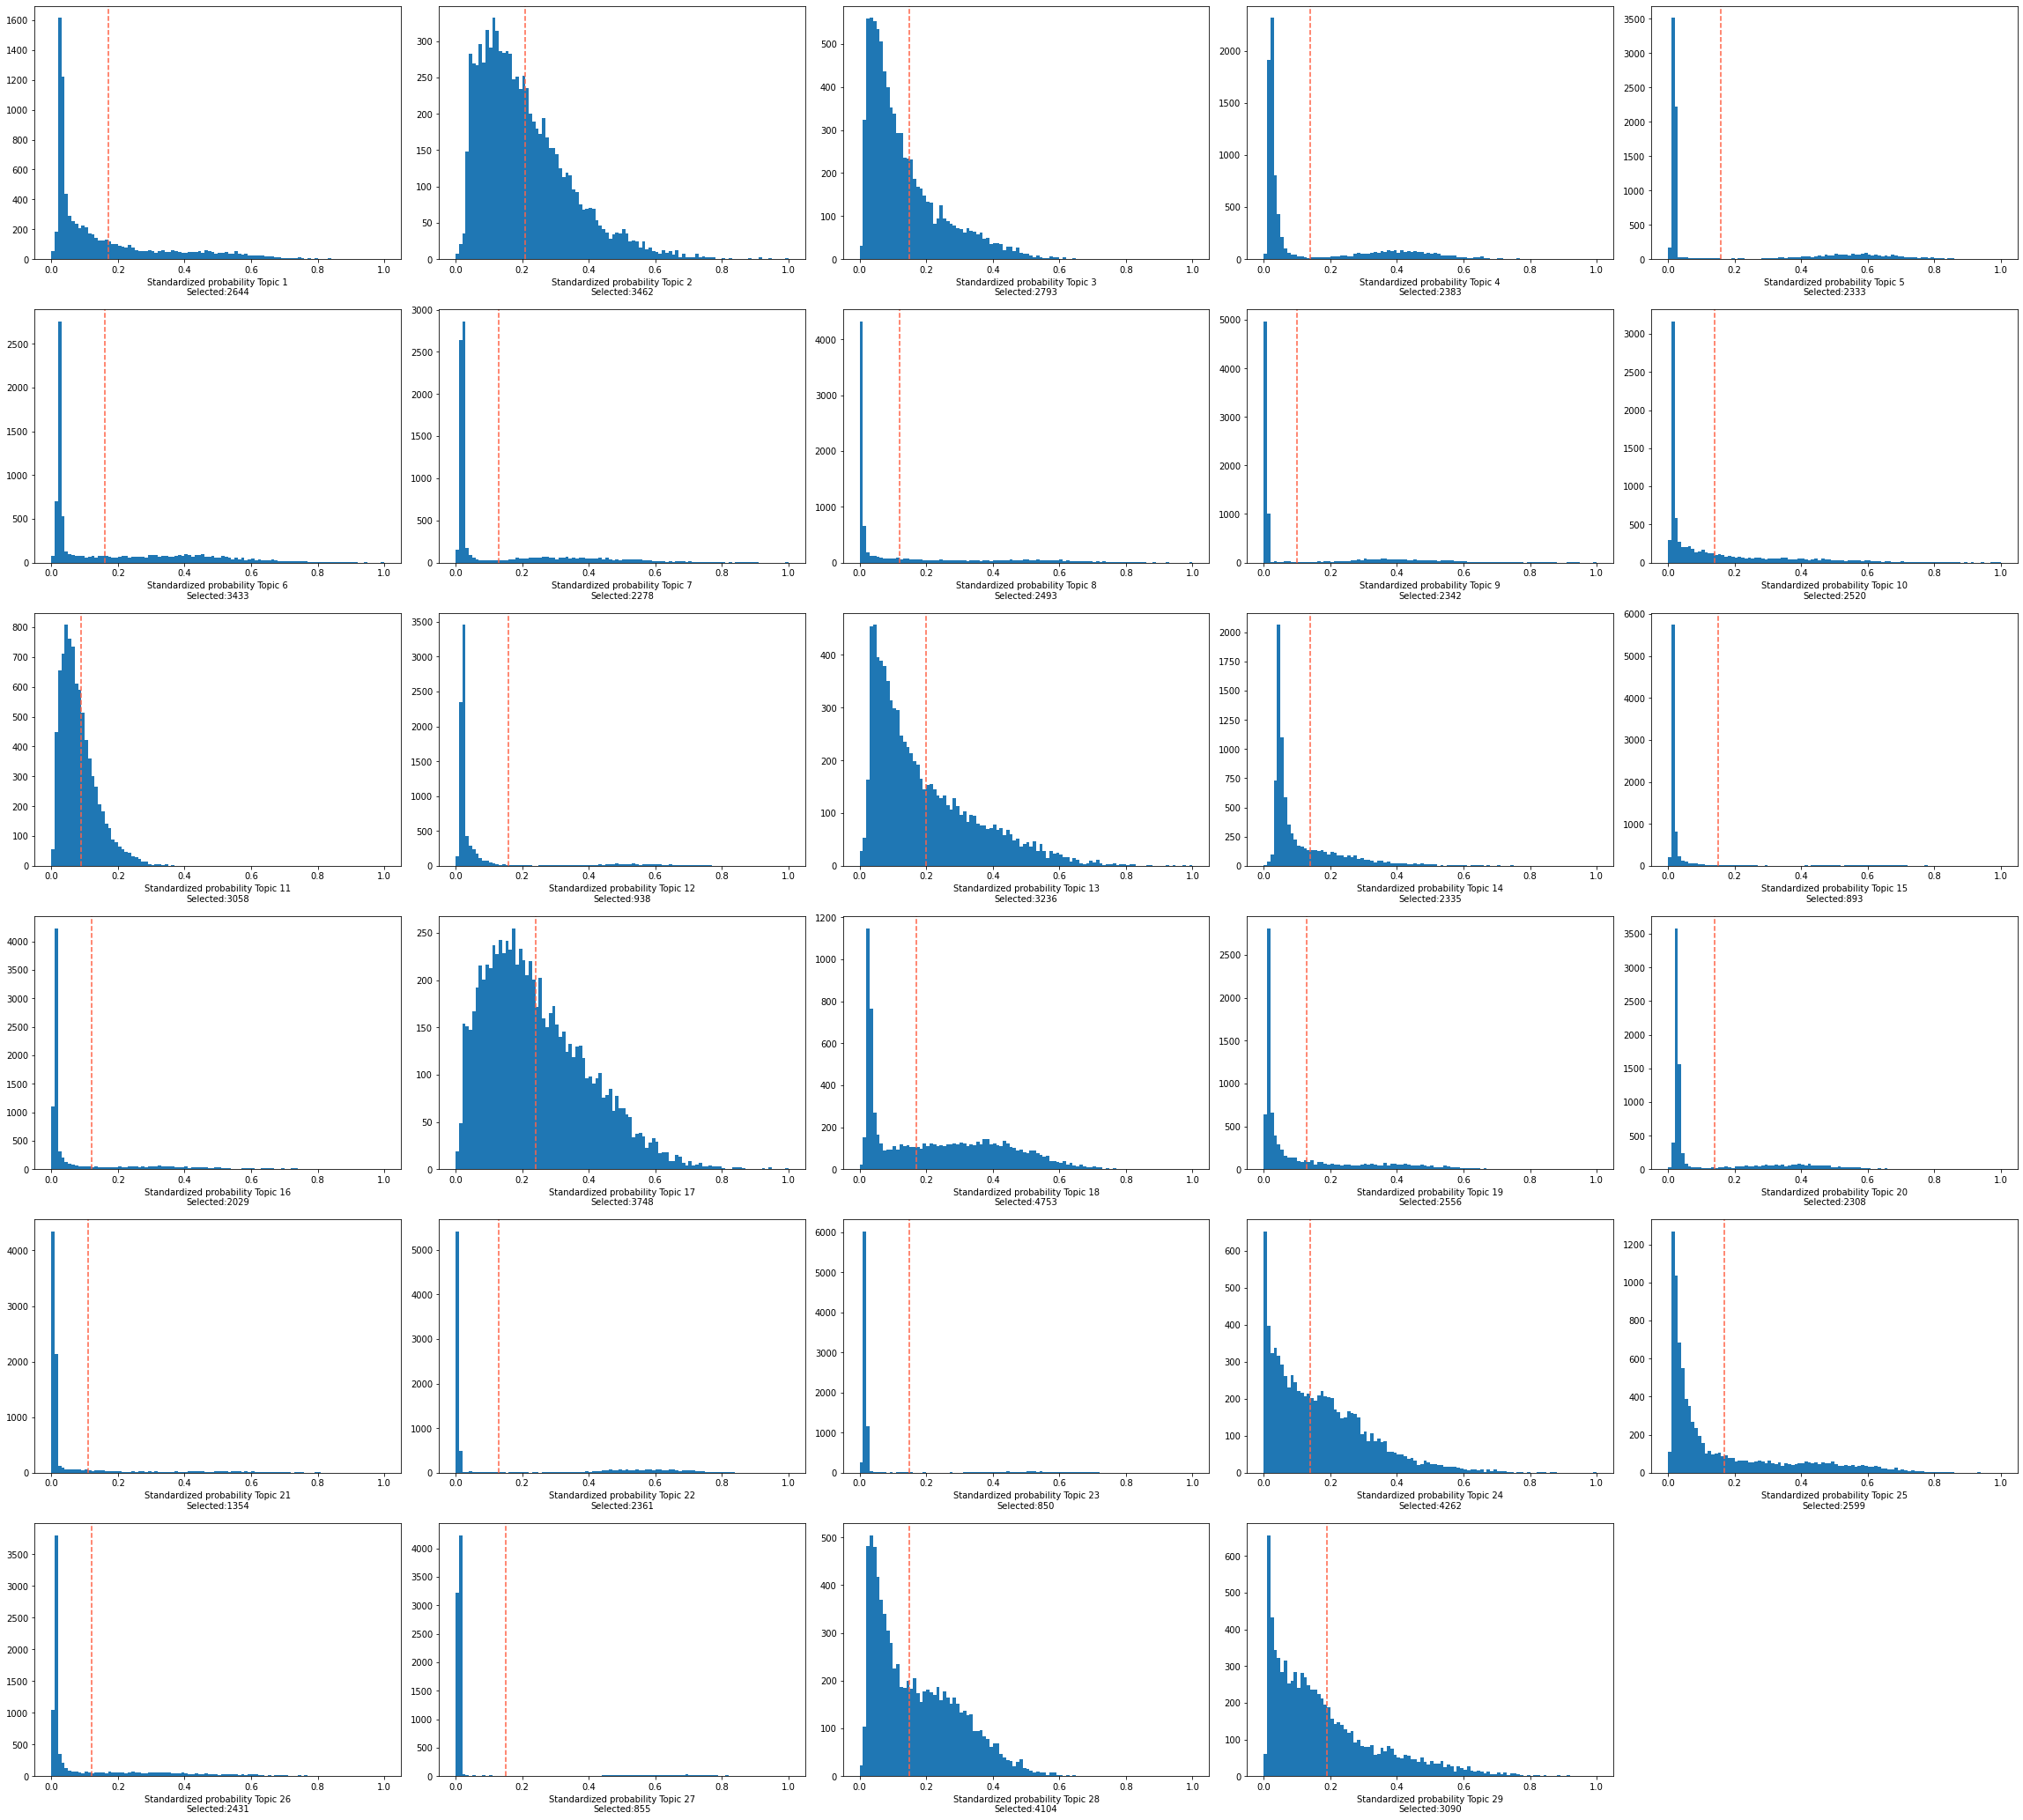

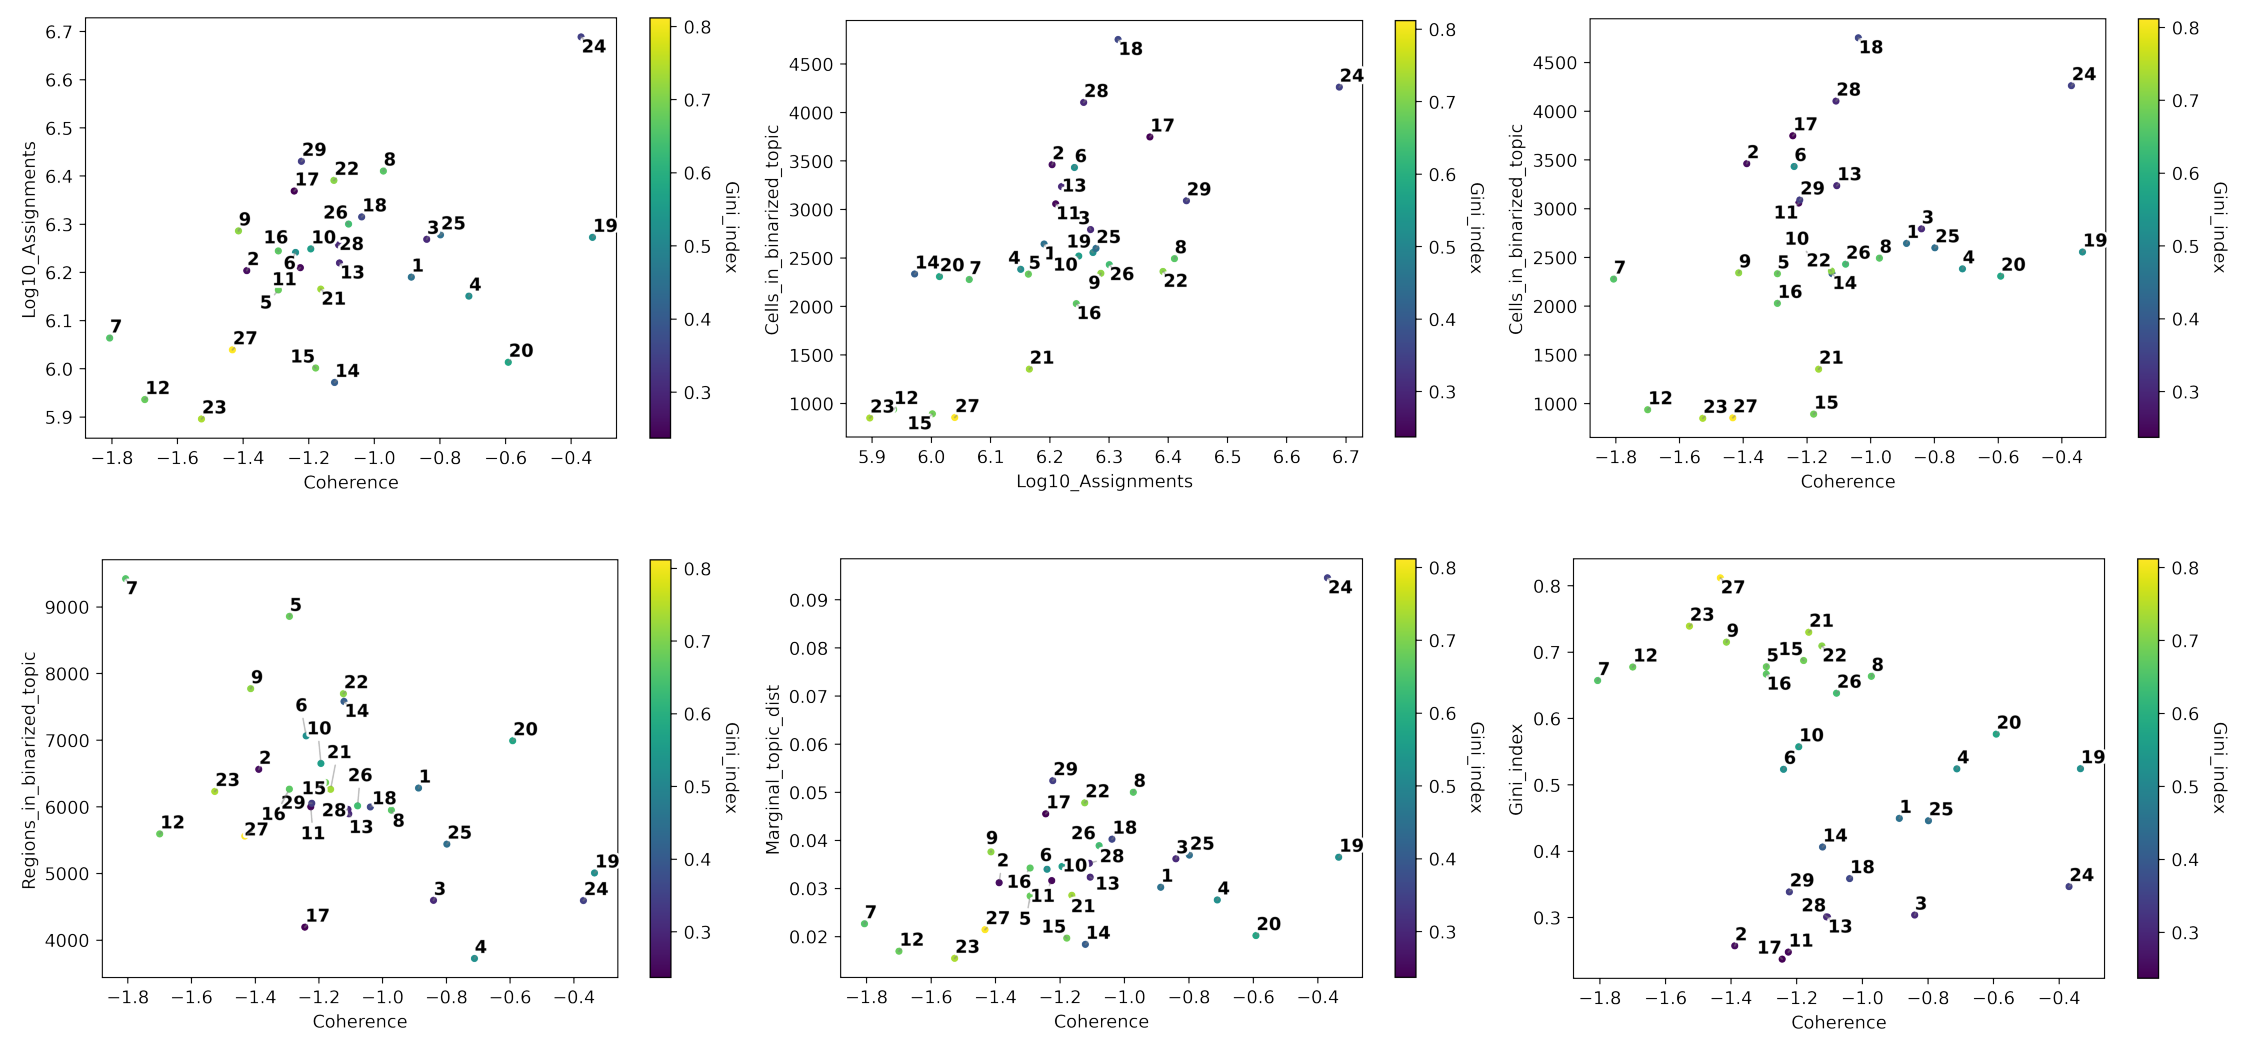

2023-03-08 11:51:28,199 cisTopic     INFO     Imputing drop-outs
2023-03-08 11:51:31,737 cisTopic     INFO     Scaling
2023-03-08 11:51:35,160 cisTopic     INFO     Keep non zero rows
2023-03-08 11:51:40,300 cisTopic     INFO     Imputed accessibility sparsity: 0.41319993065935645
2023-03-08 11:51:40,301 cisTopic     INFO     Create CistopicImputedFeatures object
2023-03-08 11:51:40,303 cisTopic     INFO     Done!
2023-03-08 11:51:40,321 cisTopic     INFO     Normalizing imputed data
2023-03-08 11:51:54,487 cisTopic     INFO     Done!
2023-03-08 11:52:06,670 cisTopic     INFO     Calculating mean
2023-03-08 11:52:08,275 cisTopic     INFO     Calculating variance


<Figure size 432x288 with 0 Axes>

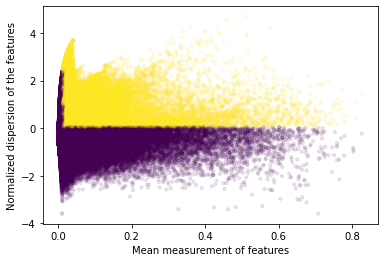

2023-03-08 11:52:24,319 cisTopic     INFO     Done!
Found 56893 variable regions
Cytotoxic T cell
CD4+ T cell
Natural killer cell
CD14+ monocyte
B cell
CD16+ monocyte
Dendritic cell


2023-03-08 11:52:30,480	INFO services.py:1470 -- View the Ray dashboard at http://127.0.0.1:8265


(markers_ray pid=1164349) 2023-03-08 11:52:34,982 cisTopic     INFO     Formatting data for 10xv11_sampleA_Cytotoxic T cell_VS_10xv11_sampleB_Cytotoxic T cell
(markers_ray pid=1164363) 2023-03-08 11:52:35,682 cisTopic     INFO     Formatting data for 10xv11_sampleB_Cytotoxic T cell_VS_10xv11_sampleA_Cytotoxic T cell
(markers_ray pid=1164364) 2023-03-08 11:52:36,488 cisTopic     INFO     Formatting data for 10xv11_sampleA_CD4+ T cell_VS_10xv11_sampleB_CD4+ T cell
(markers_ray pid=1164349) 2023-03-08 11:52:36,776 cisTopic     INFO     Computing p-value for 10xv11_sampleA_Cytotoxic T cell_VS_10xv11_sampleB_Cytotoxic T cell
(markers_ray pid=1164363) 2023-03-08 11:52:37,320 cisTopic     INFO     Computing p-value for 10xv11_sampleB_Cytotoxic T cell_VS_10xv11_sampleA_Cytotoxic T cell
(markers_ray pid=1164359) 2023-03-08 11:52:37,249 cisTopic     INFO     Formatting data for 10xv11_sampleB_CD4+ T cell_VS_10xv11_sampleA_CD4+ T cell
(markers_ray pid=1164352) 2023-03-08 11:52:38,158 cisTopic    

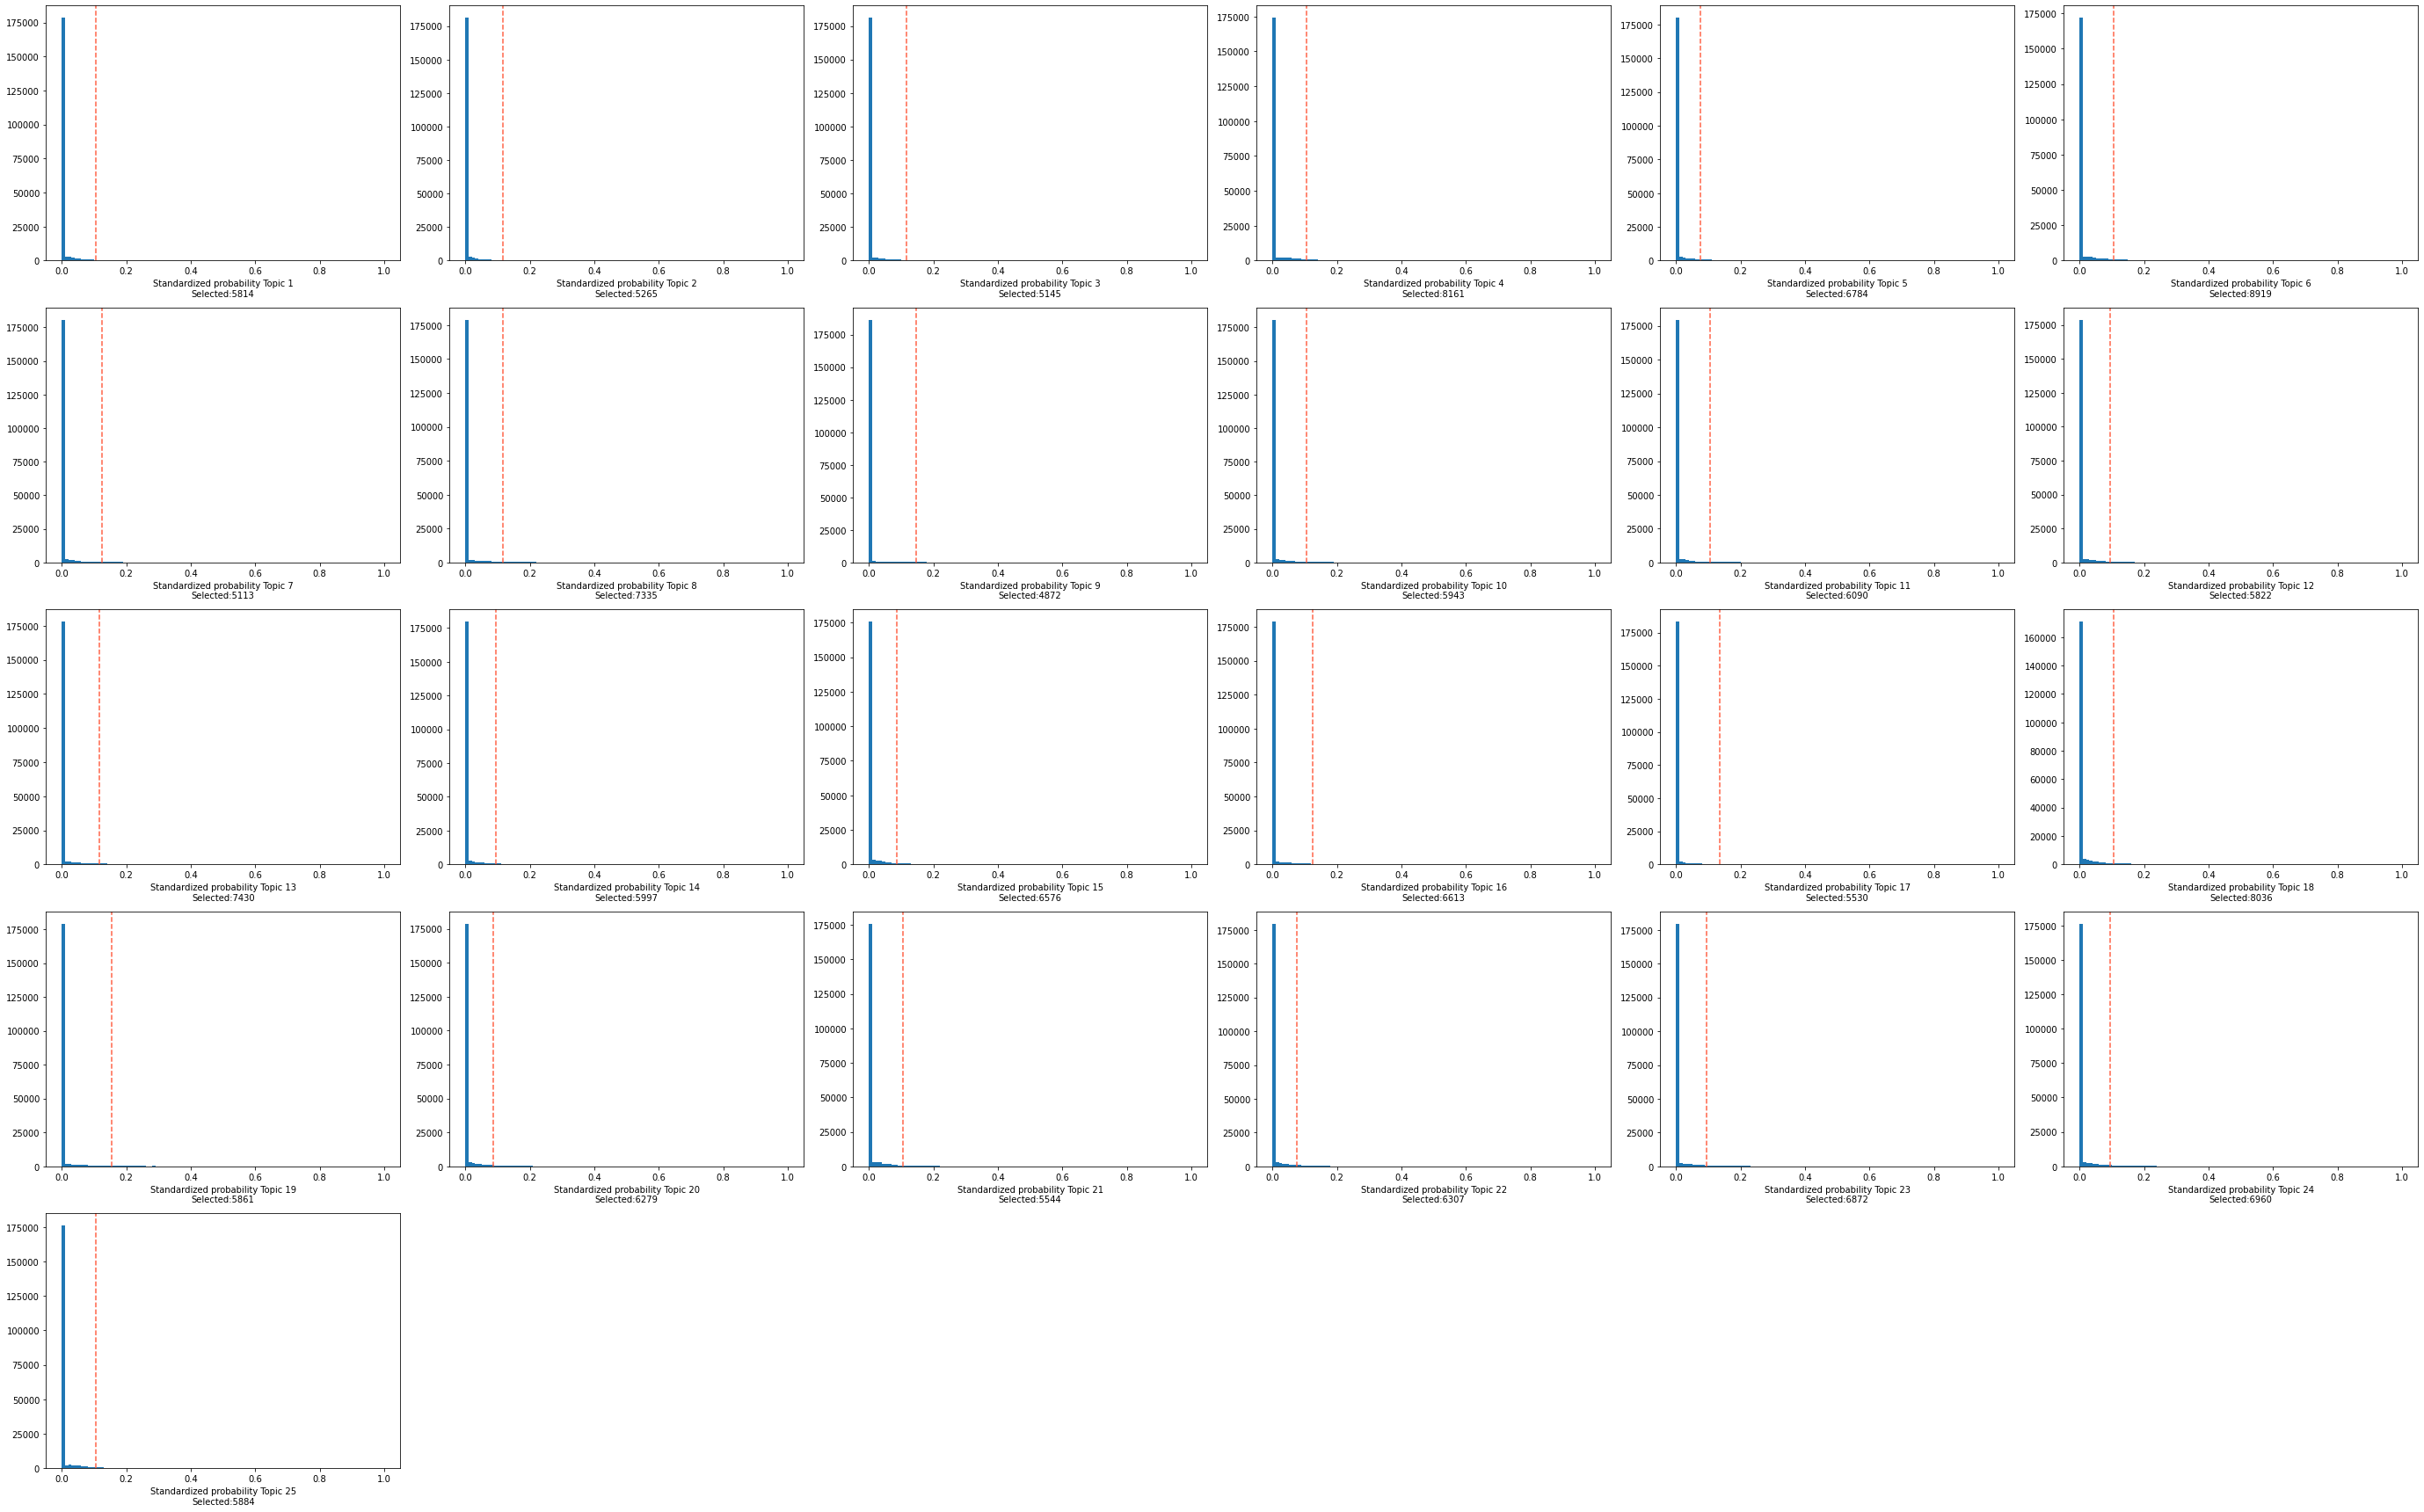

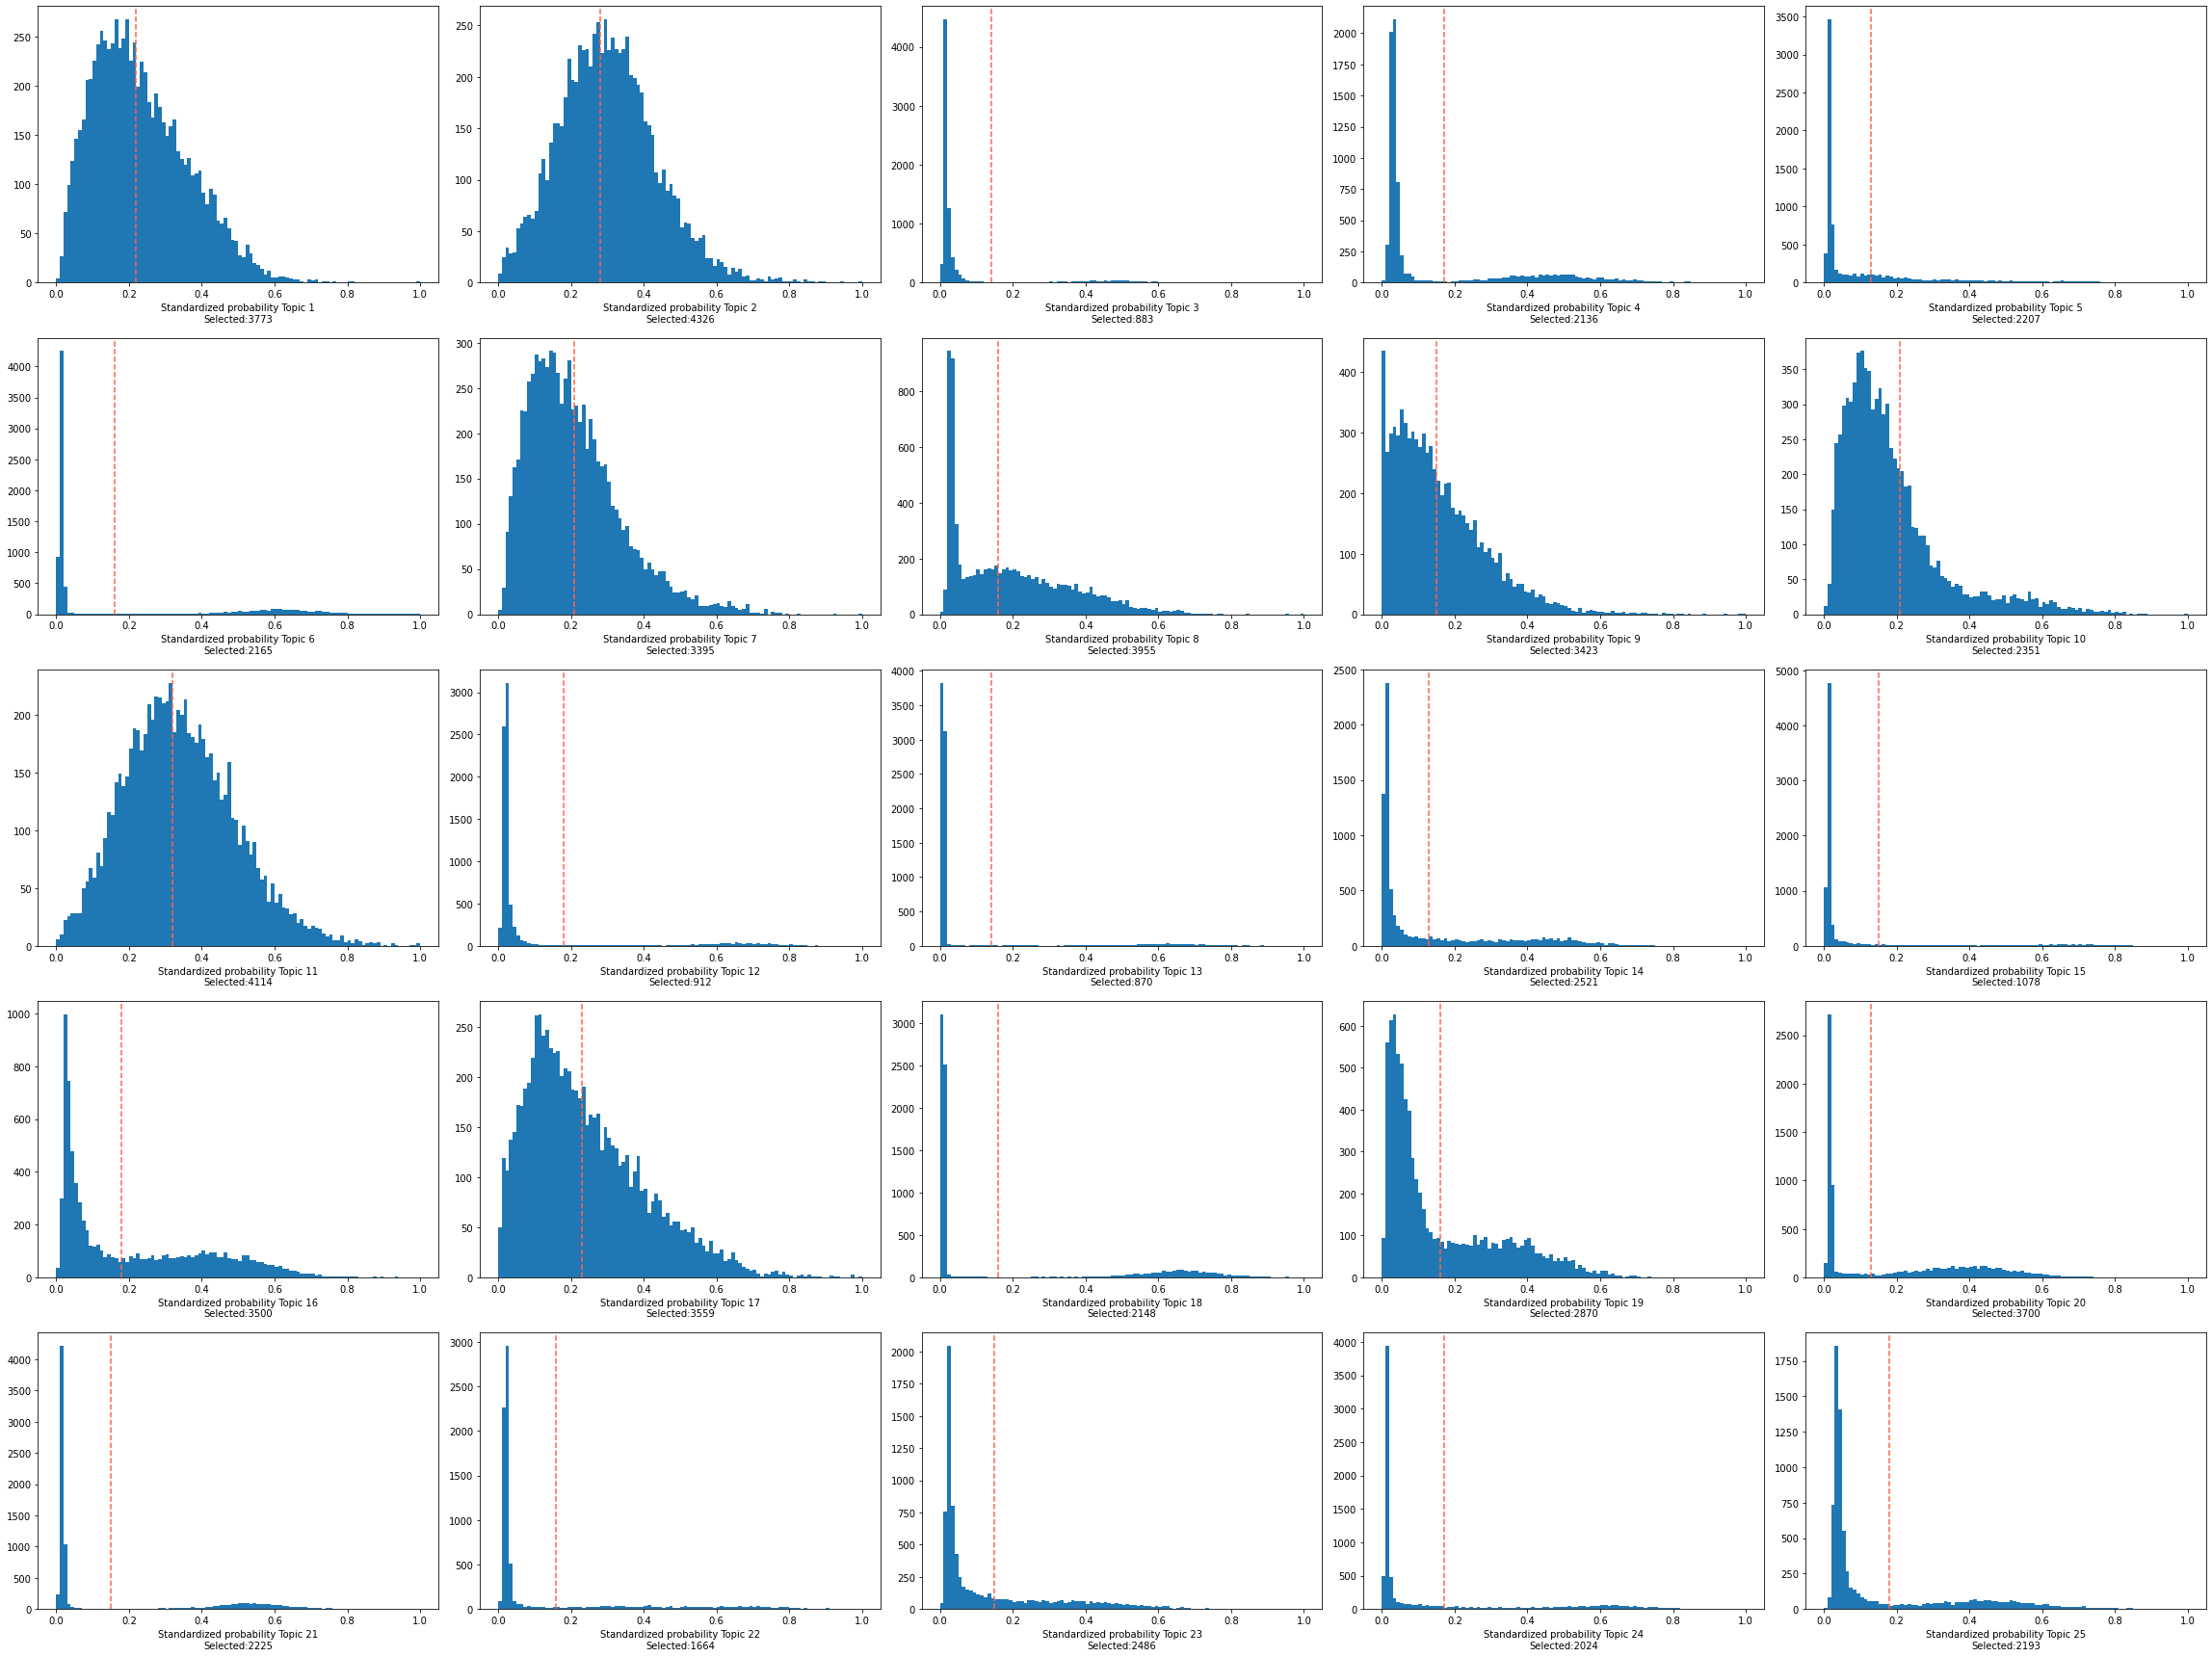

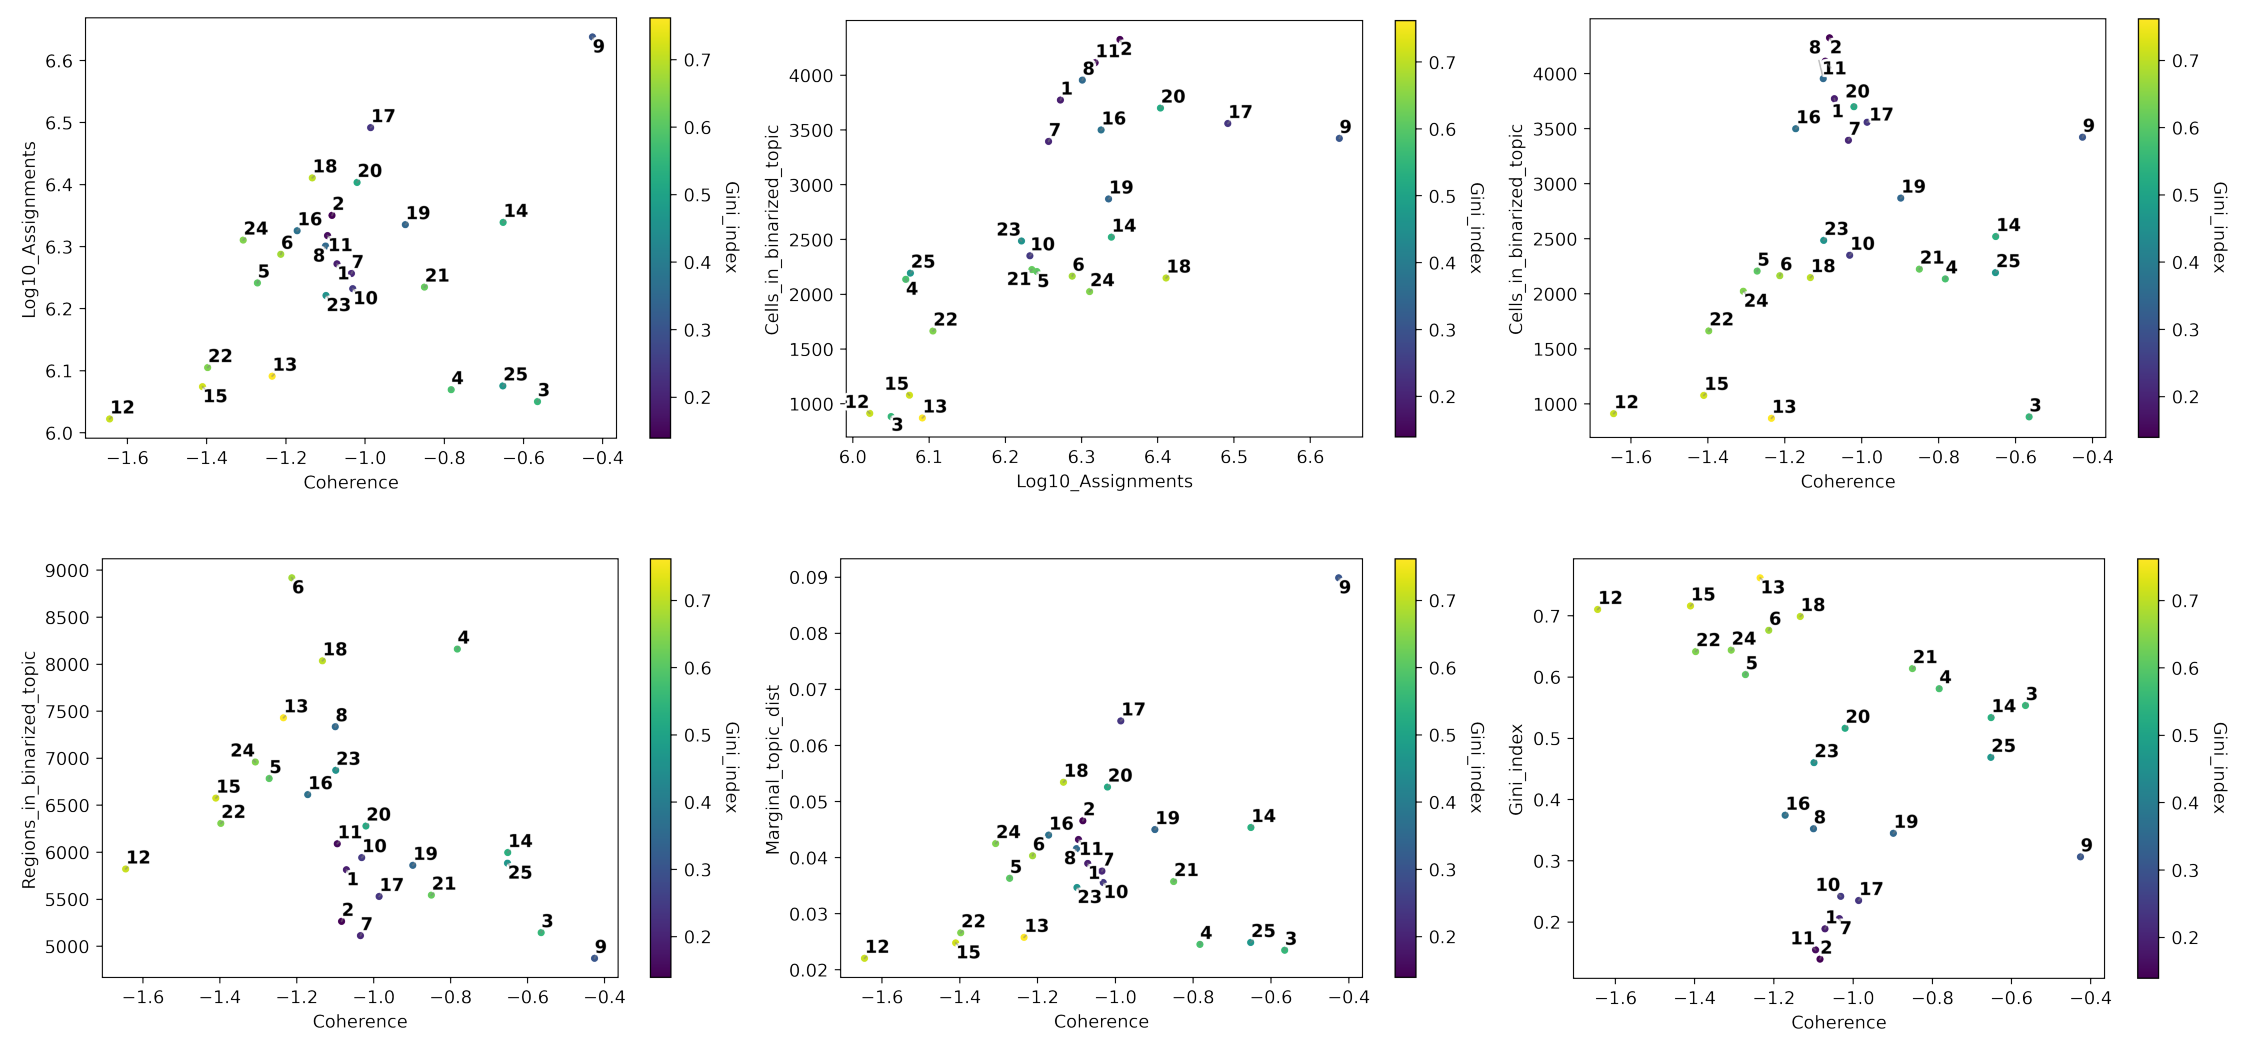

2023-03-08 11:54:19,772 cisTopic     INFO     Imputing drop-outs
2023-03-08 11:54:23,149 cisTopic     INFO     Scaling
2023-03-08 11:54:26,407 cisTopic     INFO     Keep non zero rows
2023-03-08 11:54:31,012 cisTopic     INFO     Imputed accessibility sparsity: 0.4454966594556371
2023-03-08 11:54:31,013 cisTopic     INFO     Create CistopicImputedFeatures object
2023-03-08 11:54:31,014 cisTopic     INFO     Done!
2023-03-08 11:54:31,033 cisTopic     INFO     Normalizing imputed data
2023-03-08 11:54:44,842 cisTopic     INFO     Done!
2023-03-08 11:54:56,350 cisTopic     INFO     Calculating mean
2023-03-08 11:54:57,838 cisTopic     INFO     Calculating variance


<Figure size 432x288 with 0 Axes>

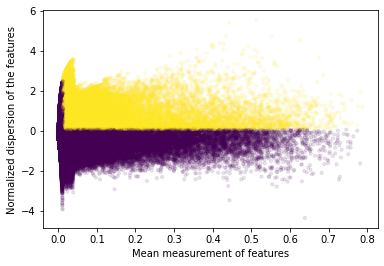

2023-03-08 11:55:12,763 cisTopic     INFO     Done!
Found 49973 variable regions
Cytotoxic T cell
CD4+ T cell
Natural killer cell
CD14+ monocyte
B cell
CD16+ monocyte
Dendritic cell


2023-03-08 11:55:18,057	INFO services.py:1470 -- View the Ray dashboard at http://127.0.0.1:8265


(markers_ray pid=1165581) 2023-03-08 11:55:22,346 cisTopic     INFO     Formatting data for 10xv1_sampleA_Cytotoxic T cell_VS_10xv1_sampleB_Cytotoxic T cell
(markers_ray pid=1165582) 2023-03-08 11:55:22,995 cisTopic     INFO     Formatting data for 10xv1_sampleB_Cytotoxic T cell_VS_10xv1_sampleA_Cytotoxic T cell
(markers_ray pid=1165581) 2023-03-08 11:55:23,680 cisTopic     INFO     Computing p-value for 10xv1_sampleA_Cytotoxic T cell_VS_10xv1_sampleB_Cytotoxic T cell
(markers_ray pid=1165586) 2023-03-08 11:55:23,772 cisTopic     INFO     Formatting data for 10xv1_sampleA_CD4+ T cell_VS_10xv1_sampleB_CD4+ T cell
(markers_ray pid=1165582) 2023-03-08 11:55:24,300 cisTopic     INFO     Computing p-value for 10xv1_sampleB_Cytotoxic T cell_VS_10xv1_sampleA_Cytotoxic T cell
(markers_ray pid=1165587) 2023-03-08 11:55:24,259 cisTopic     INFO     Formatting data for 10xv1_sampleB_CD4+ T cell_VS_10xv1_sampleA_CD4+ T cell
(markers_ray pid=1165580) 2023-03-08 11:55:24,863 cisTopic     INFO     Fo

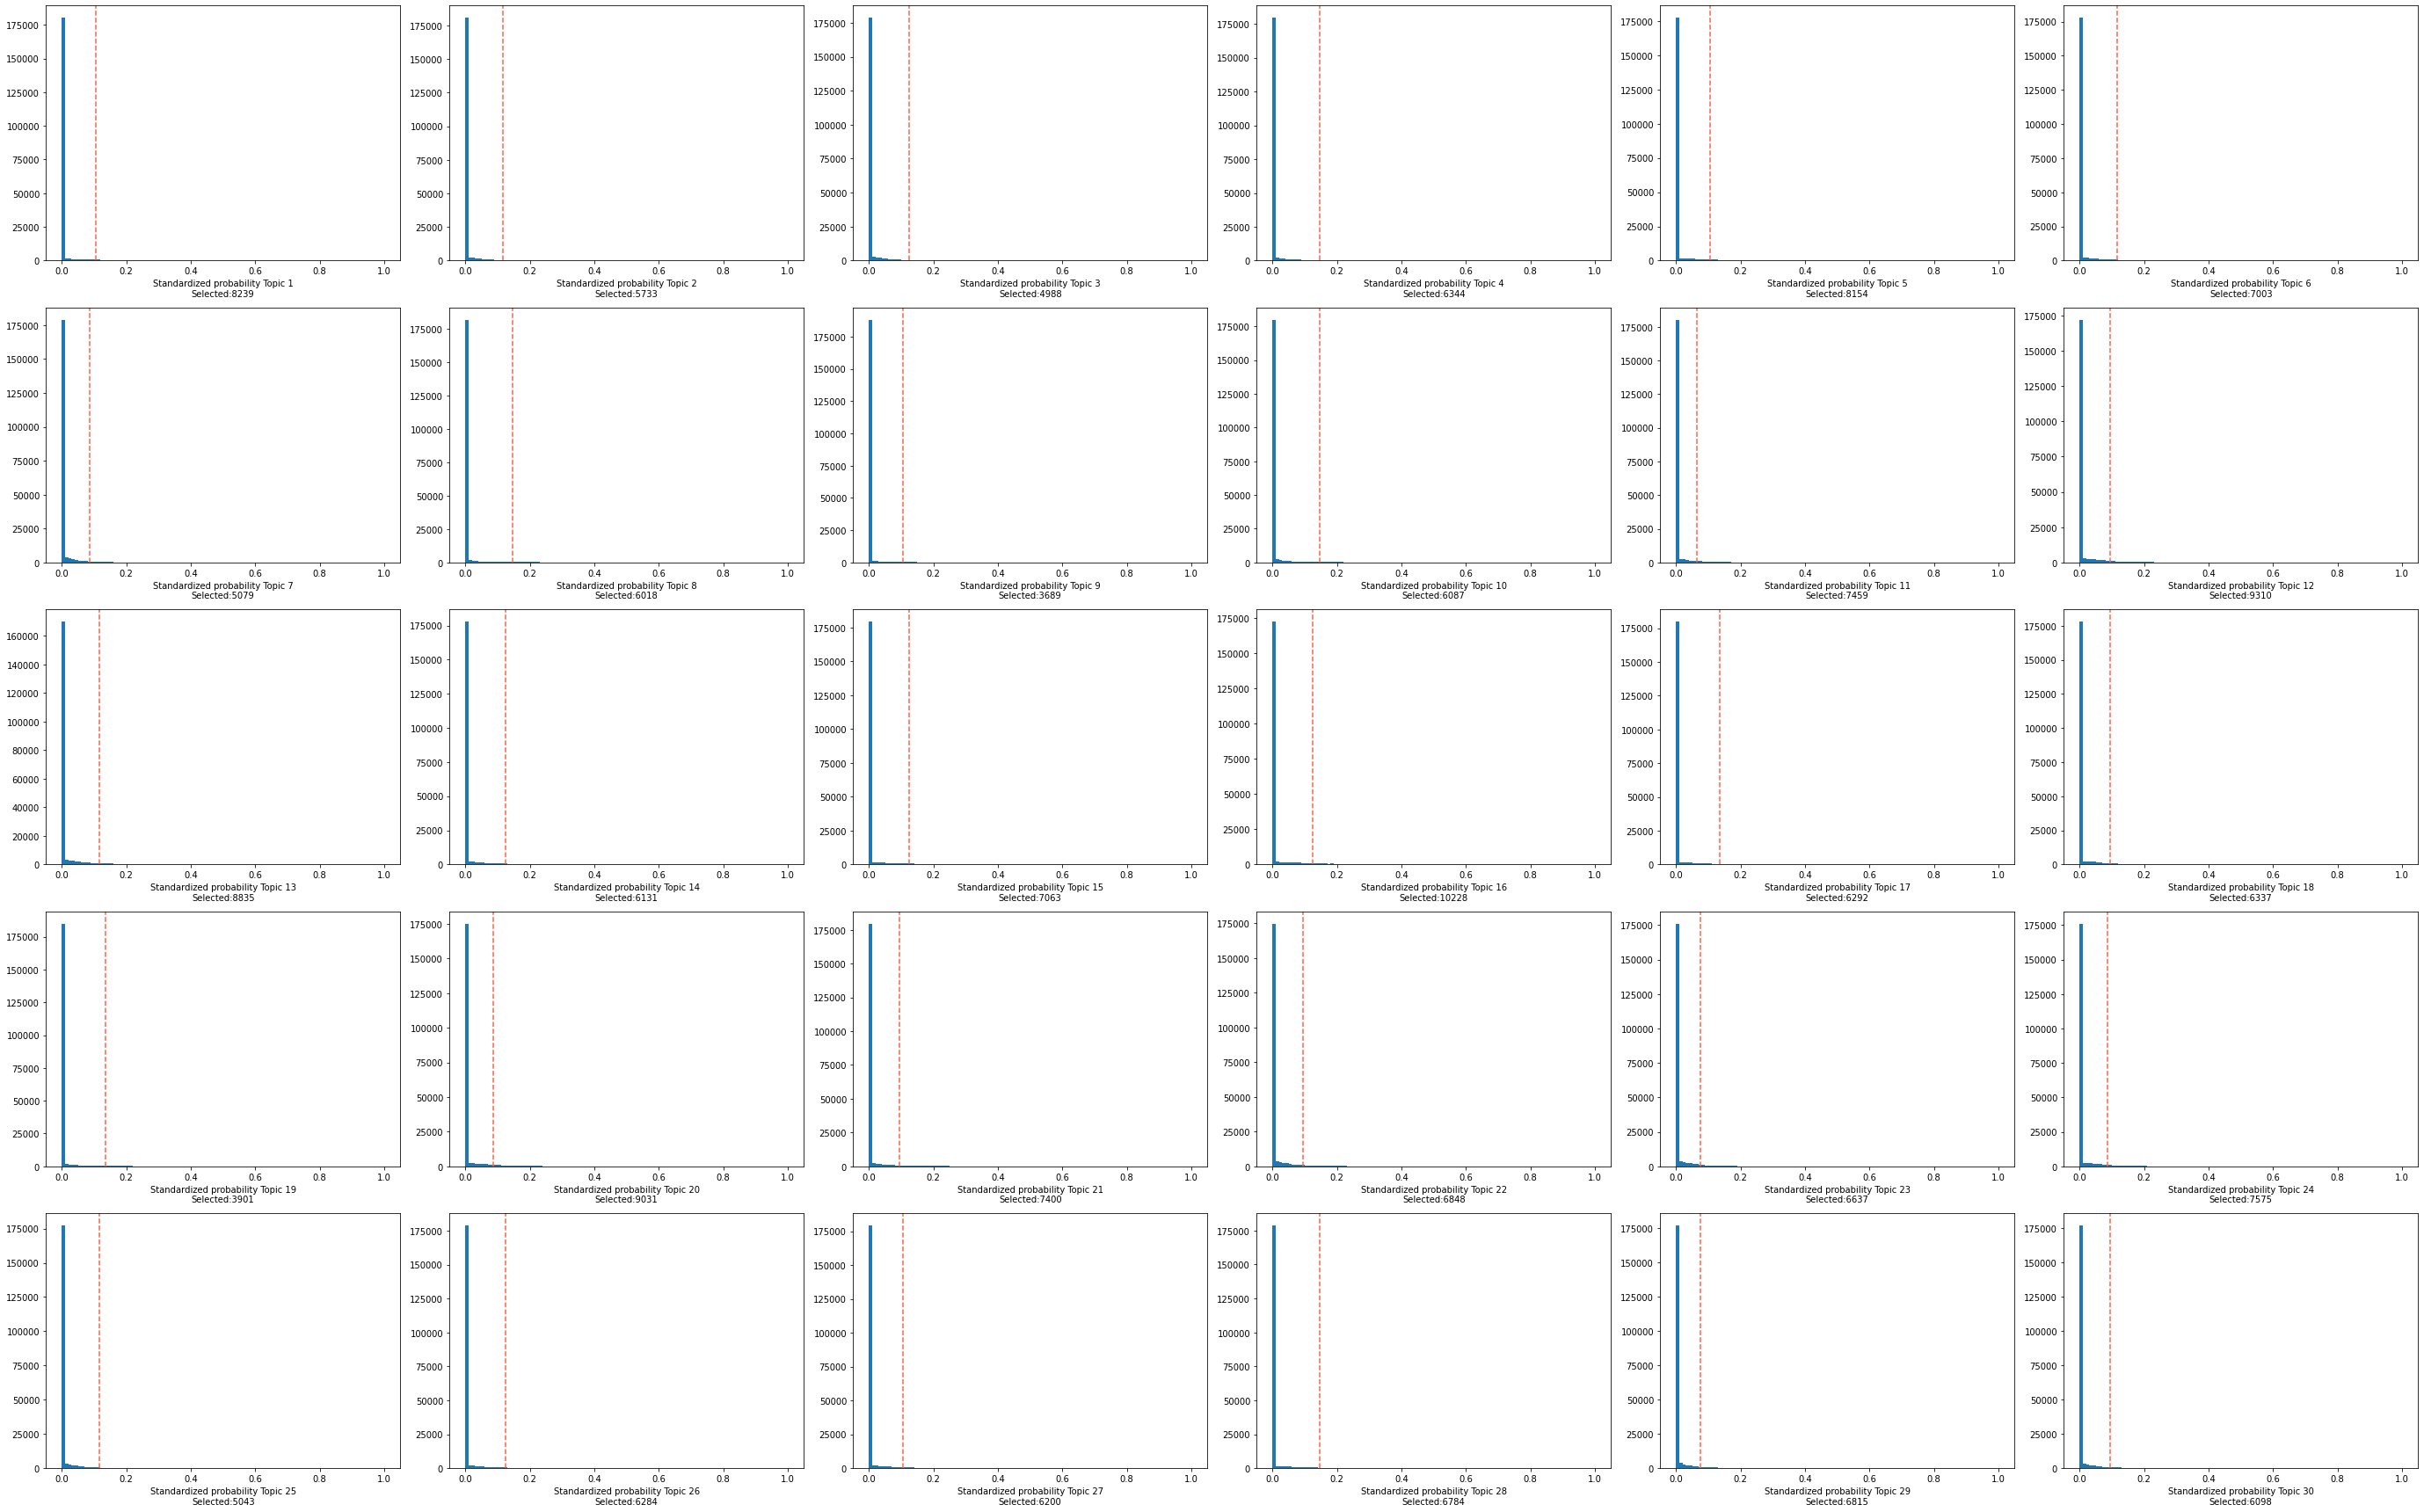

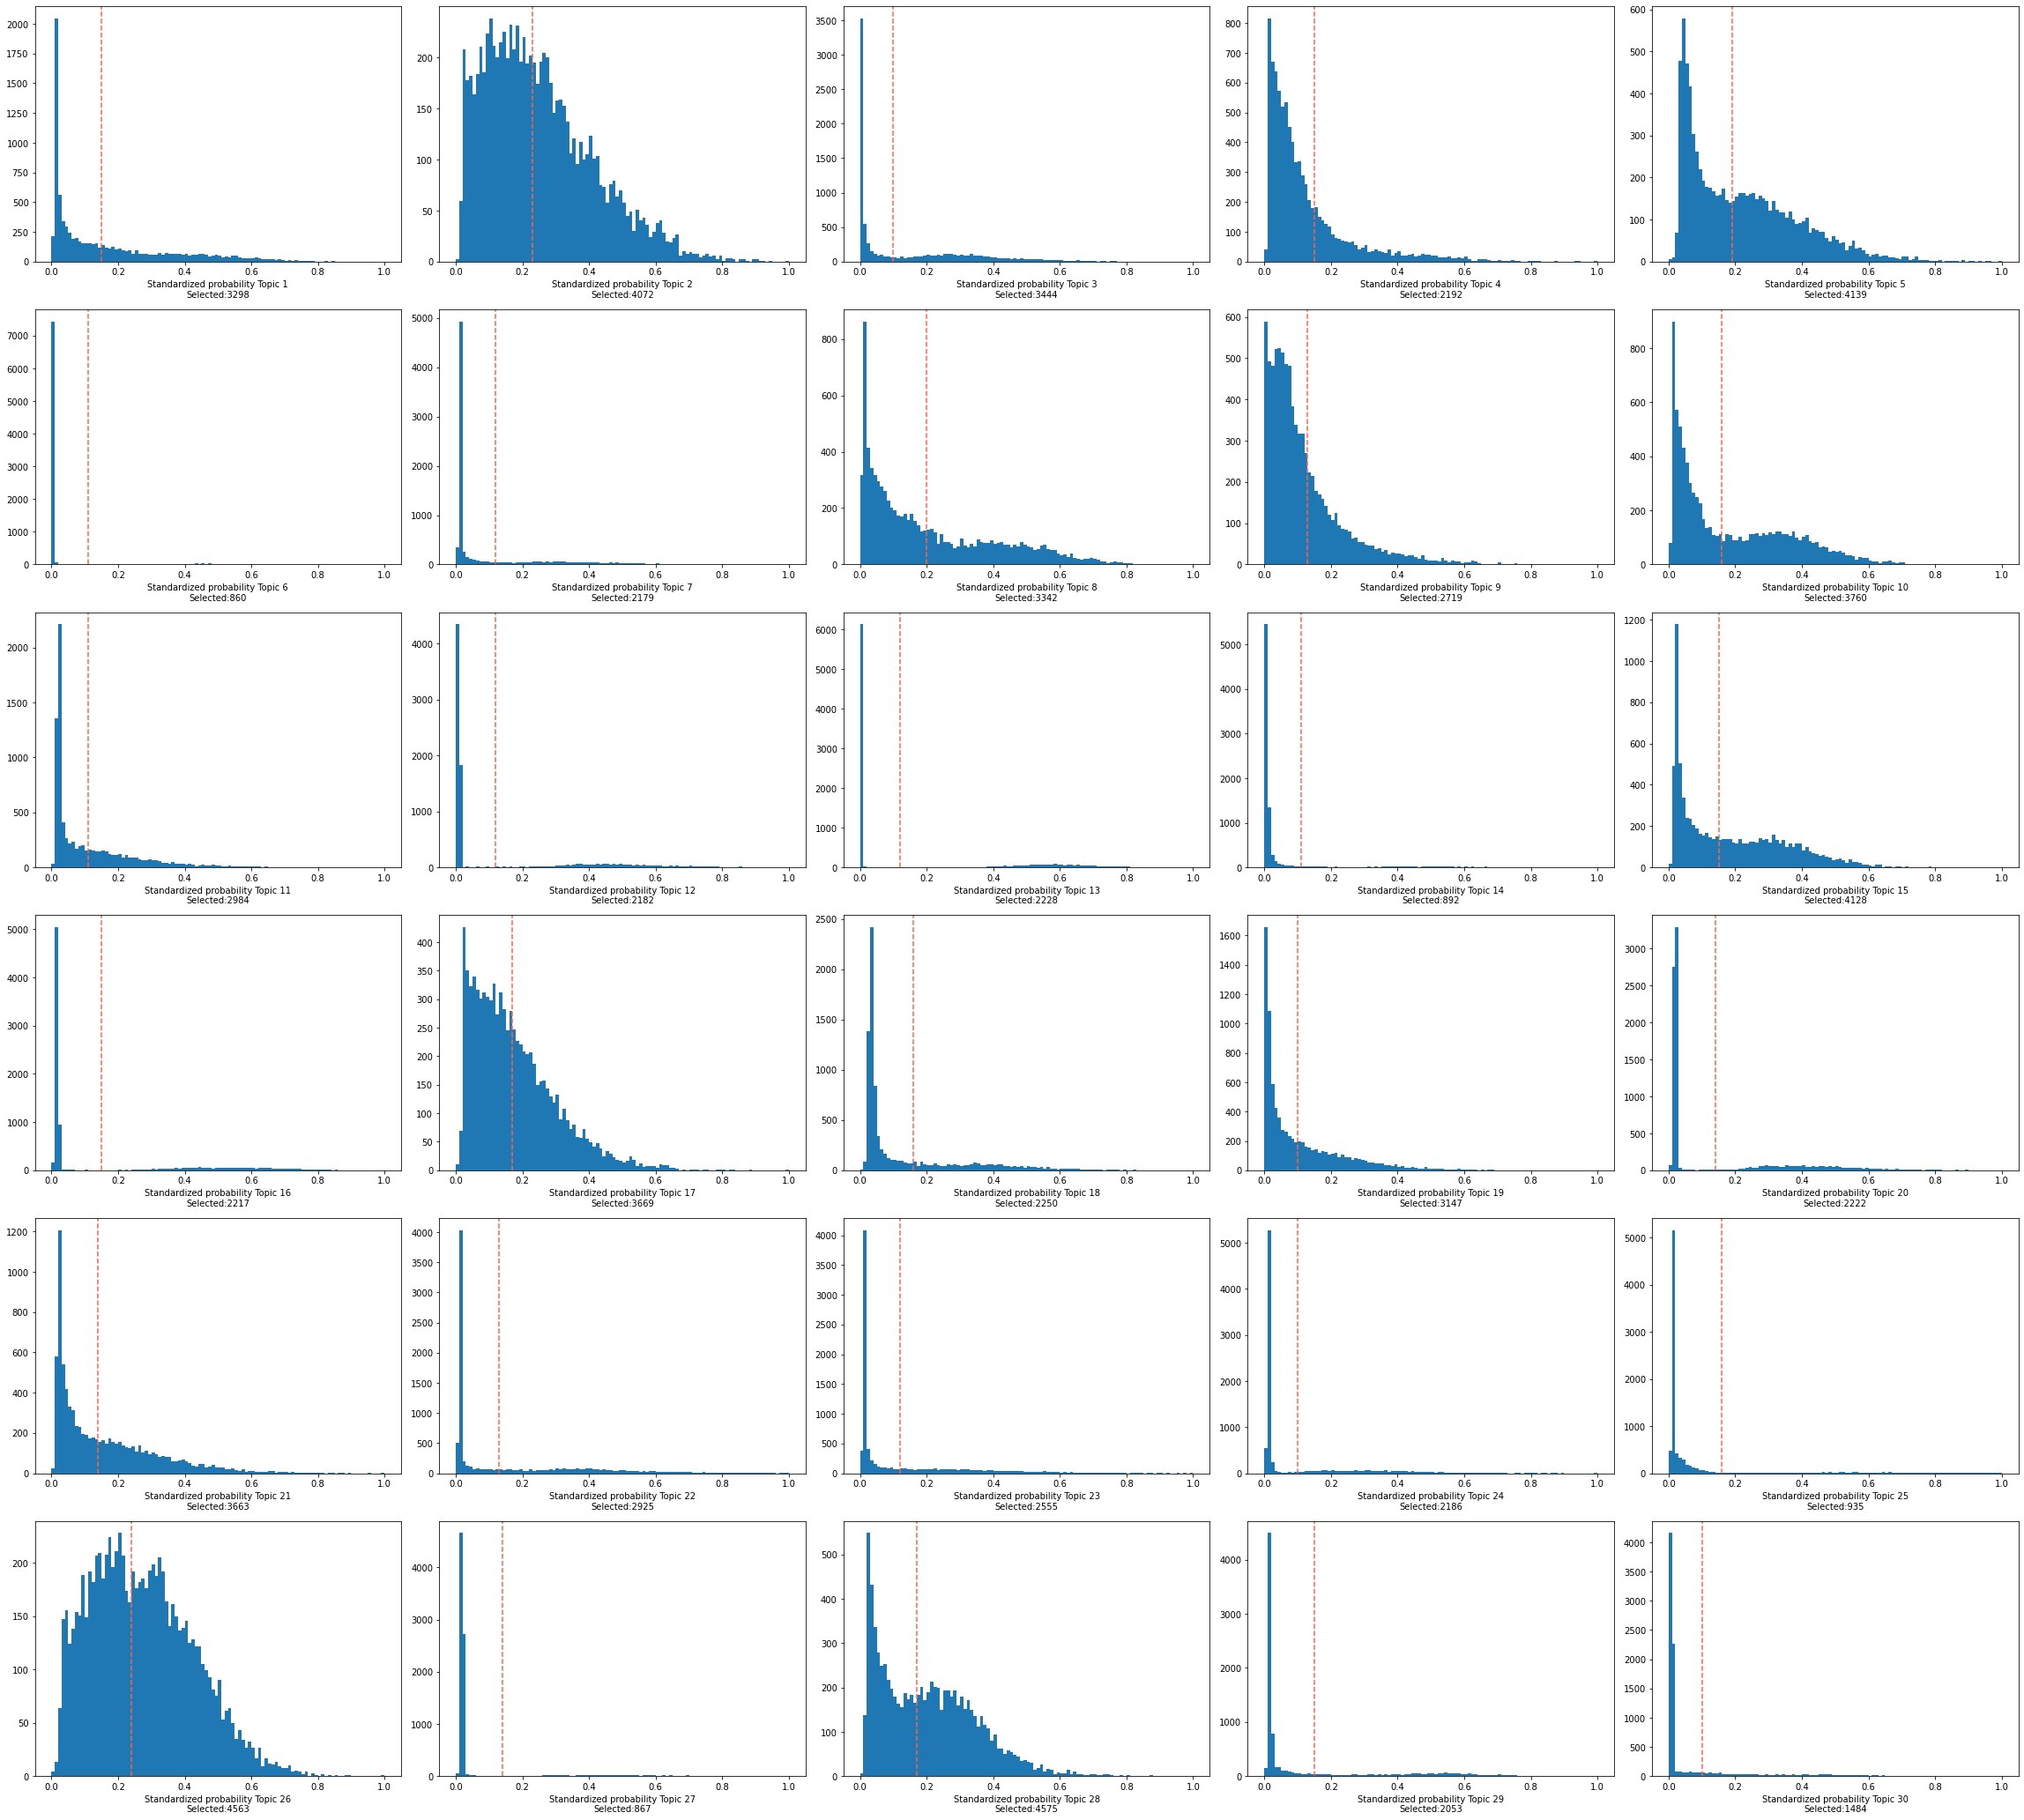

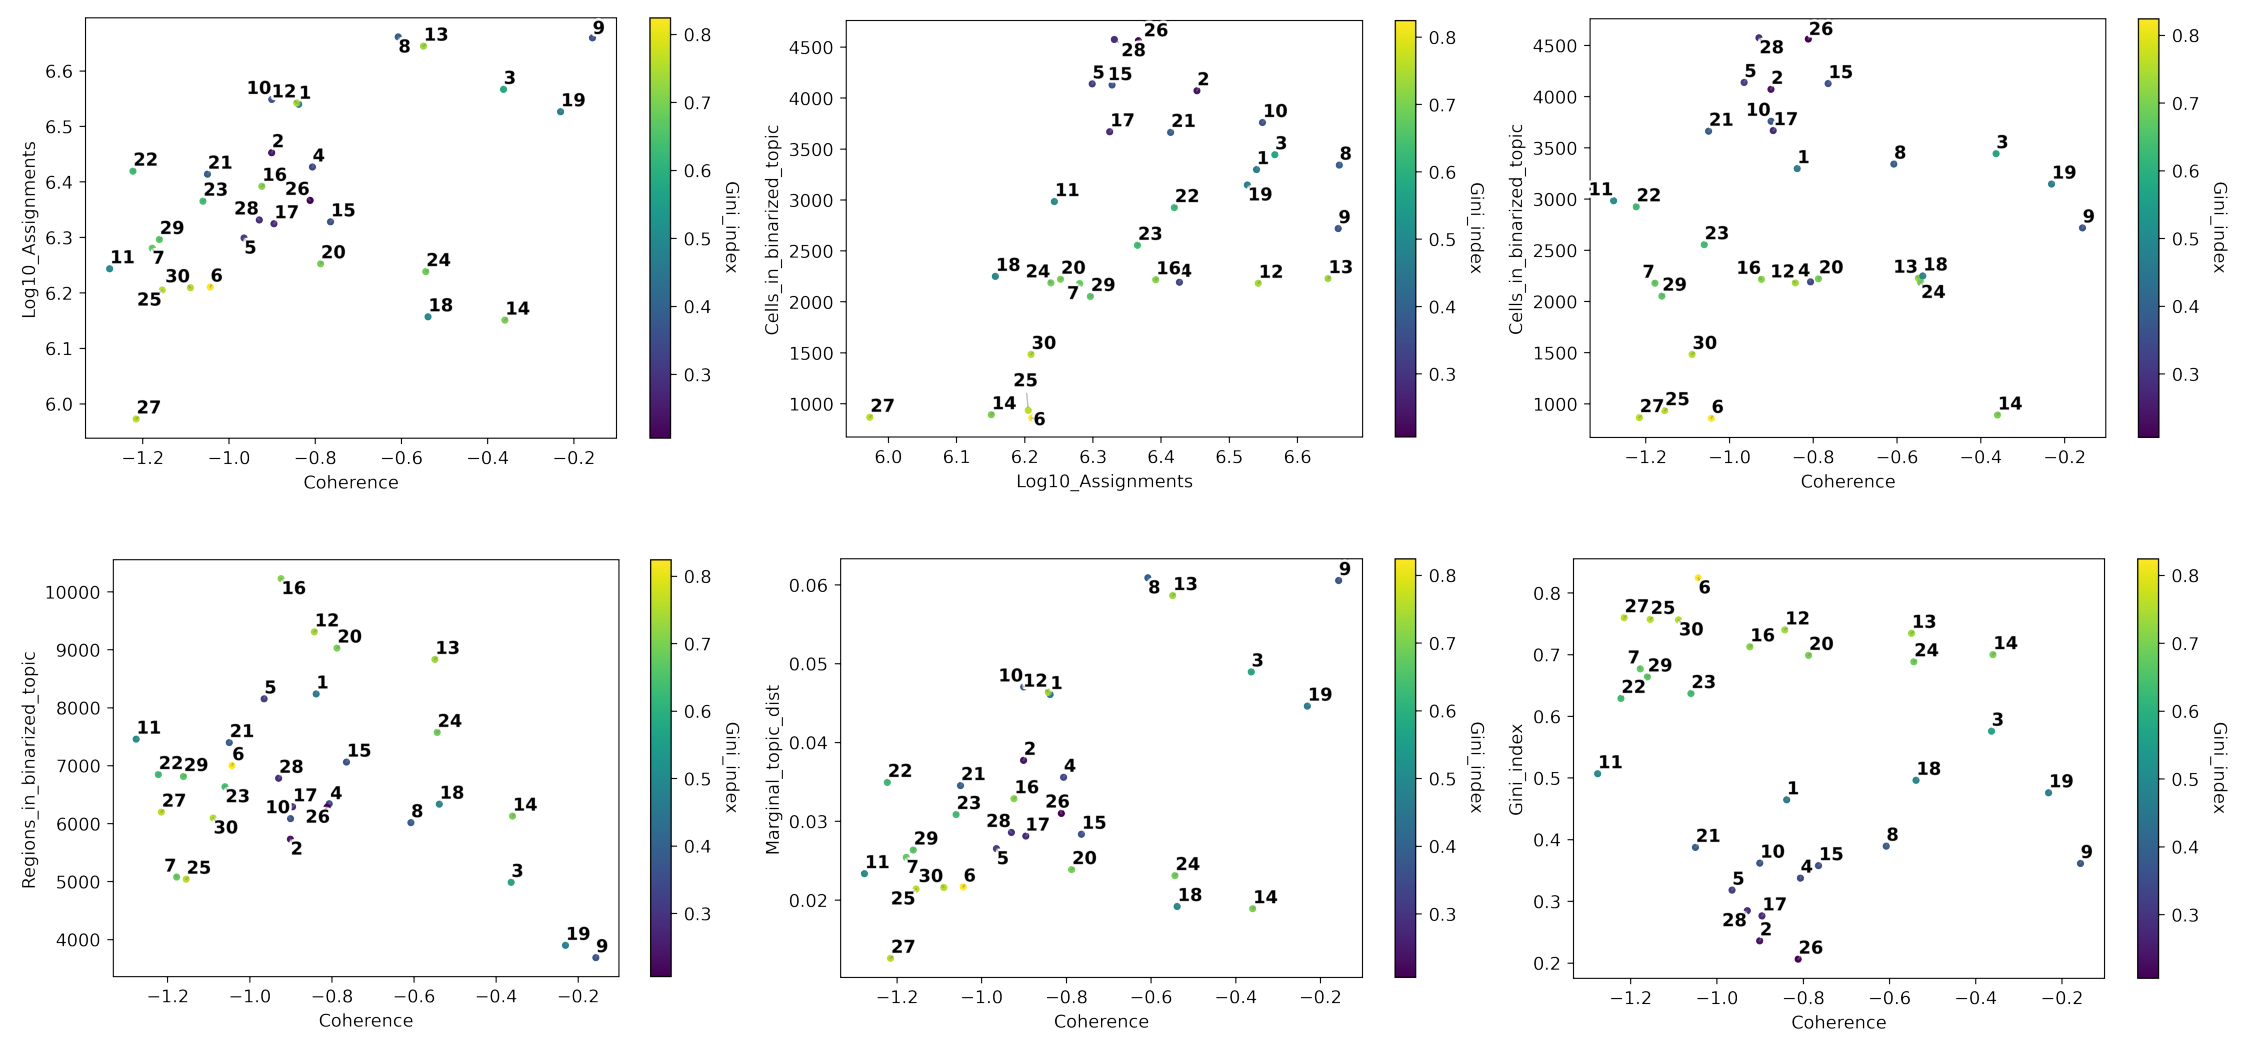

2023-03-08 11:57:22,125 cisTopic     INFO     Imputing drop-outs
2023-03-08 11:57:25,577 cisTopic     INFO     Scaling
2023-03-08 11:57:29,458 cisTopic     INFO     Keep non zero rows
2023-03-08 11:57:34,453 cisTopic     INFO     Imputed accessibility sparsity: 0.4538087093598091
2023-03-08 11:57:34,454 cisTopic     INFO     Create CistopicImputedFeatures object
2023-03-08 11:57:34,455 cisTopic     INFO     Done!
2023-03-08 11:57:34,469 cisTopic     INFO     Normalizing imputed data
2023-03-08 11:57:48,769 cisTopic     INFO     Done!
2023-03-08 11:58:01,354 cisTopic     INFO     Calculating mean
2023-03-08 11:58:02,966 cisTopic     INFO     Calculating variance


<Figure size 432x288 with 0 Axes>

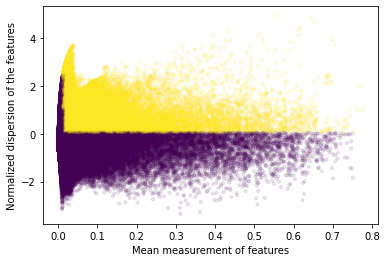

2023-03-08 11:58:18,961 cisTopic     INFO     Done!
Found 54396 variable regions
Cytotoxic T cell
CD4+ T cell
Natural killer cell
CD14+ monocyte
B cell
CD16+ monocyte
Dendritic cell


2023-03-08 11:58:24,682	INFO services.py:1470 -- View the Ray dashboard at http://127.0.0.1:8265


(markers_ray pid=1166803) 2023-03-08 11:58:29,376 cisTopic     INFO     Formatting data for 10xv2_sampleA_Cytotoxic T cell_VS_10xv2_sampleB_Cytotoxic T cell
(markers_ray pid=1166802) 2023-03-08 11:58:29,840 cisTopic     INFO     Formatting data for 10xv2_sampleB_Cytotoxic T cell_VS_10xv2_sampleA_Cytotoxic T cell
(markers_ray pid=1166799) 2023-03-08 11:58:30,553 cisTopic     INFO     Formatting data for 10xv2_sampleA_CD4+ T cell_VS_10xv2_sampleB_CD4+ T cell
(markers_ray pid=1166803) 2023-03-08 11:58:31,055 cisTopic     INFO     Computing p-value for 10xv2_sampleA_Cytotoxic T cell_VS_10xv2_sampleB_Cytotoxic T cell
(markers_ray pid=1166802) 2023-03-08 11:58:31,425 cisTopic     INFO     Computing p-value for 10xv2_sampleB_Cytotoxic T cell_VS_10xv2_sampleA_Cytotoxic T cell
(markers_ray pid=1166792) 2023-03-08 11:58:31,428 cisTopic     INFO     Formatting data for 10xv2_sampleB_CD4+ T cell_VS_10xv2_sampleA_CD4+ T cell
(markers_ray pid=1166797) 2023-03-08 11:58:32,084 cisTopic     INFO     Fo

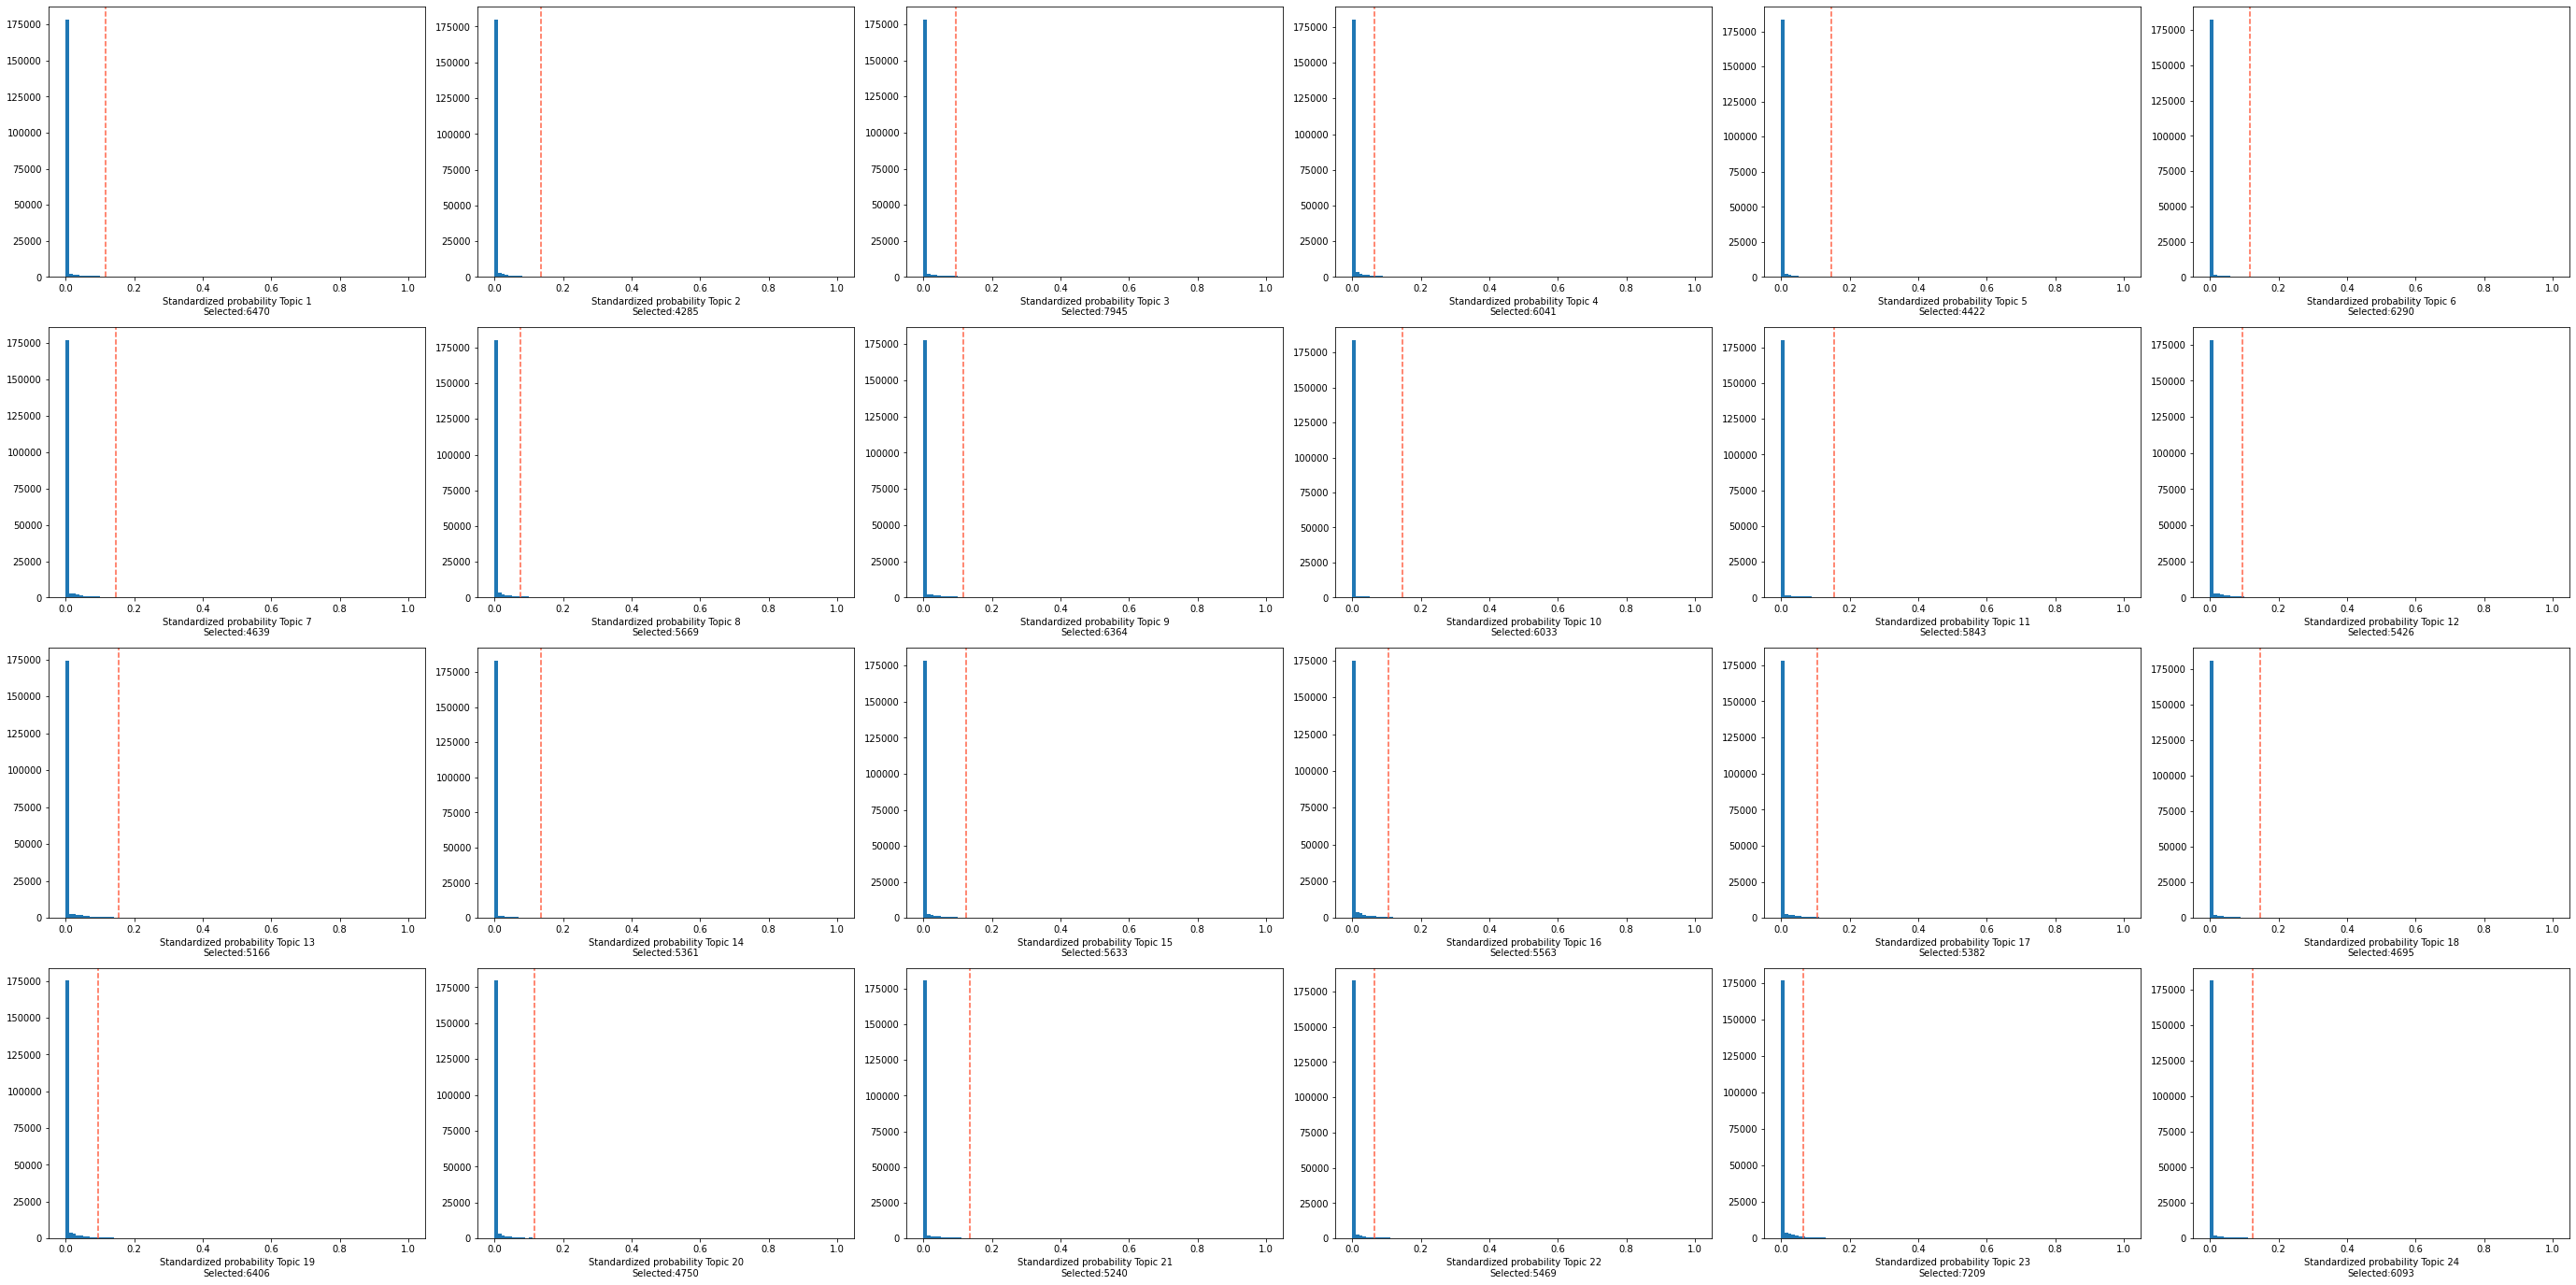

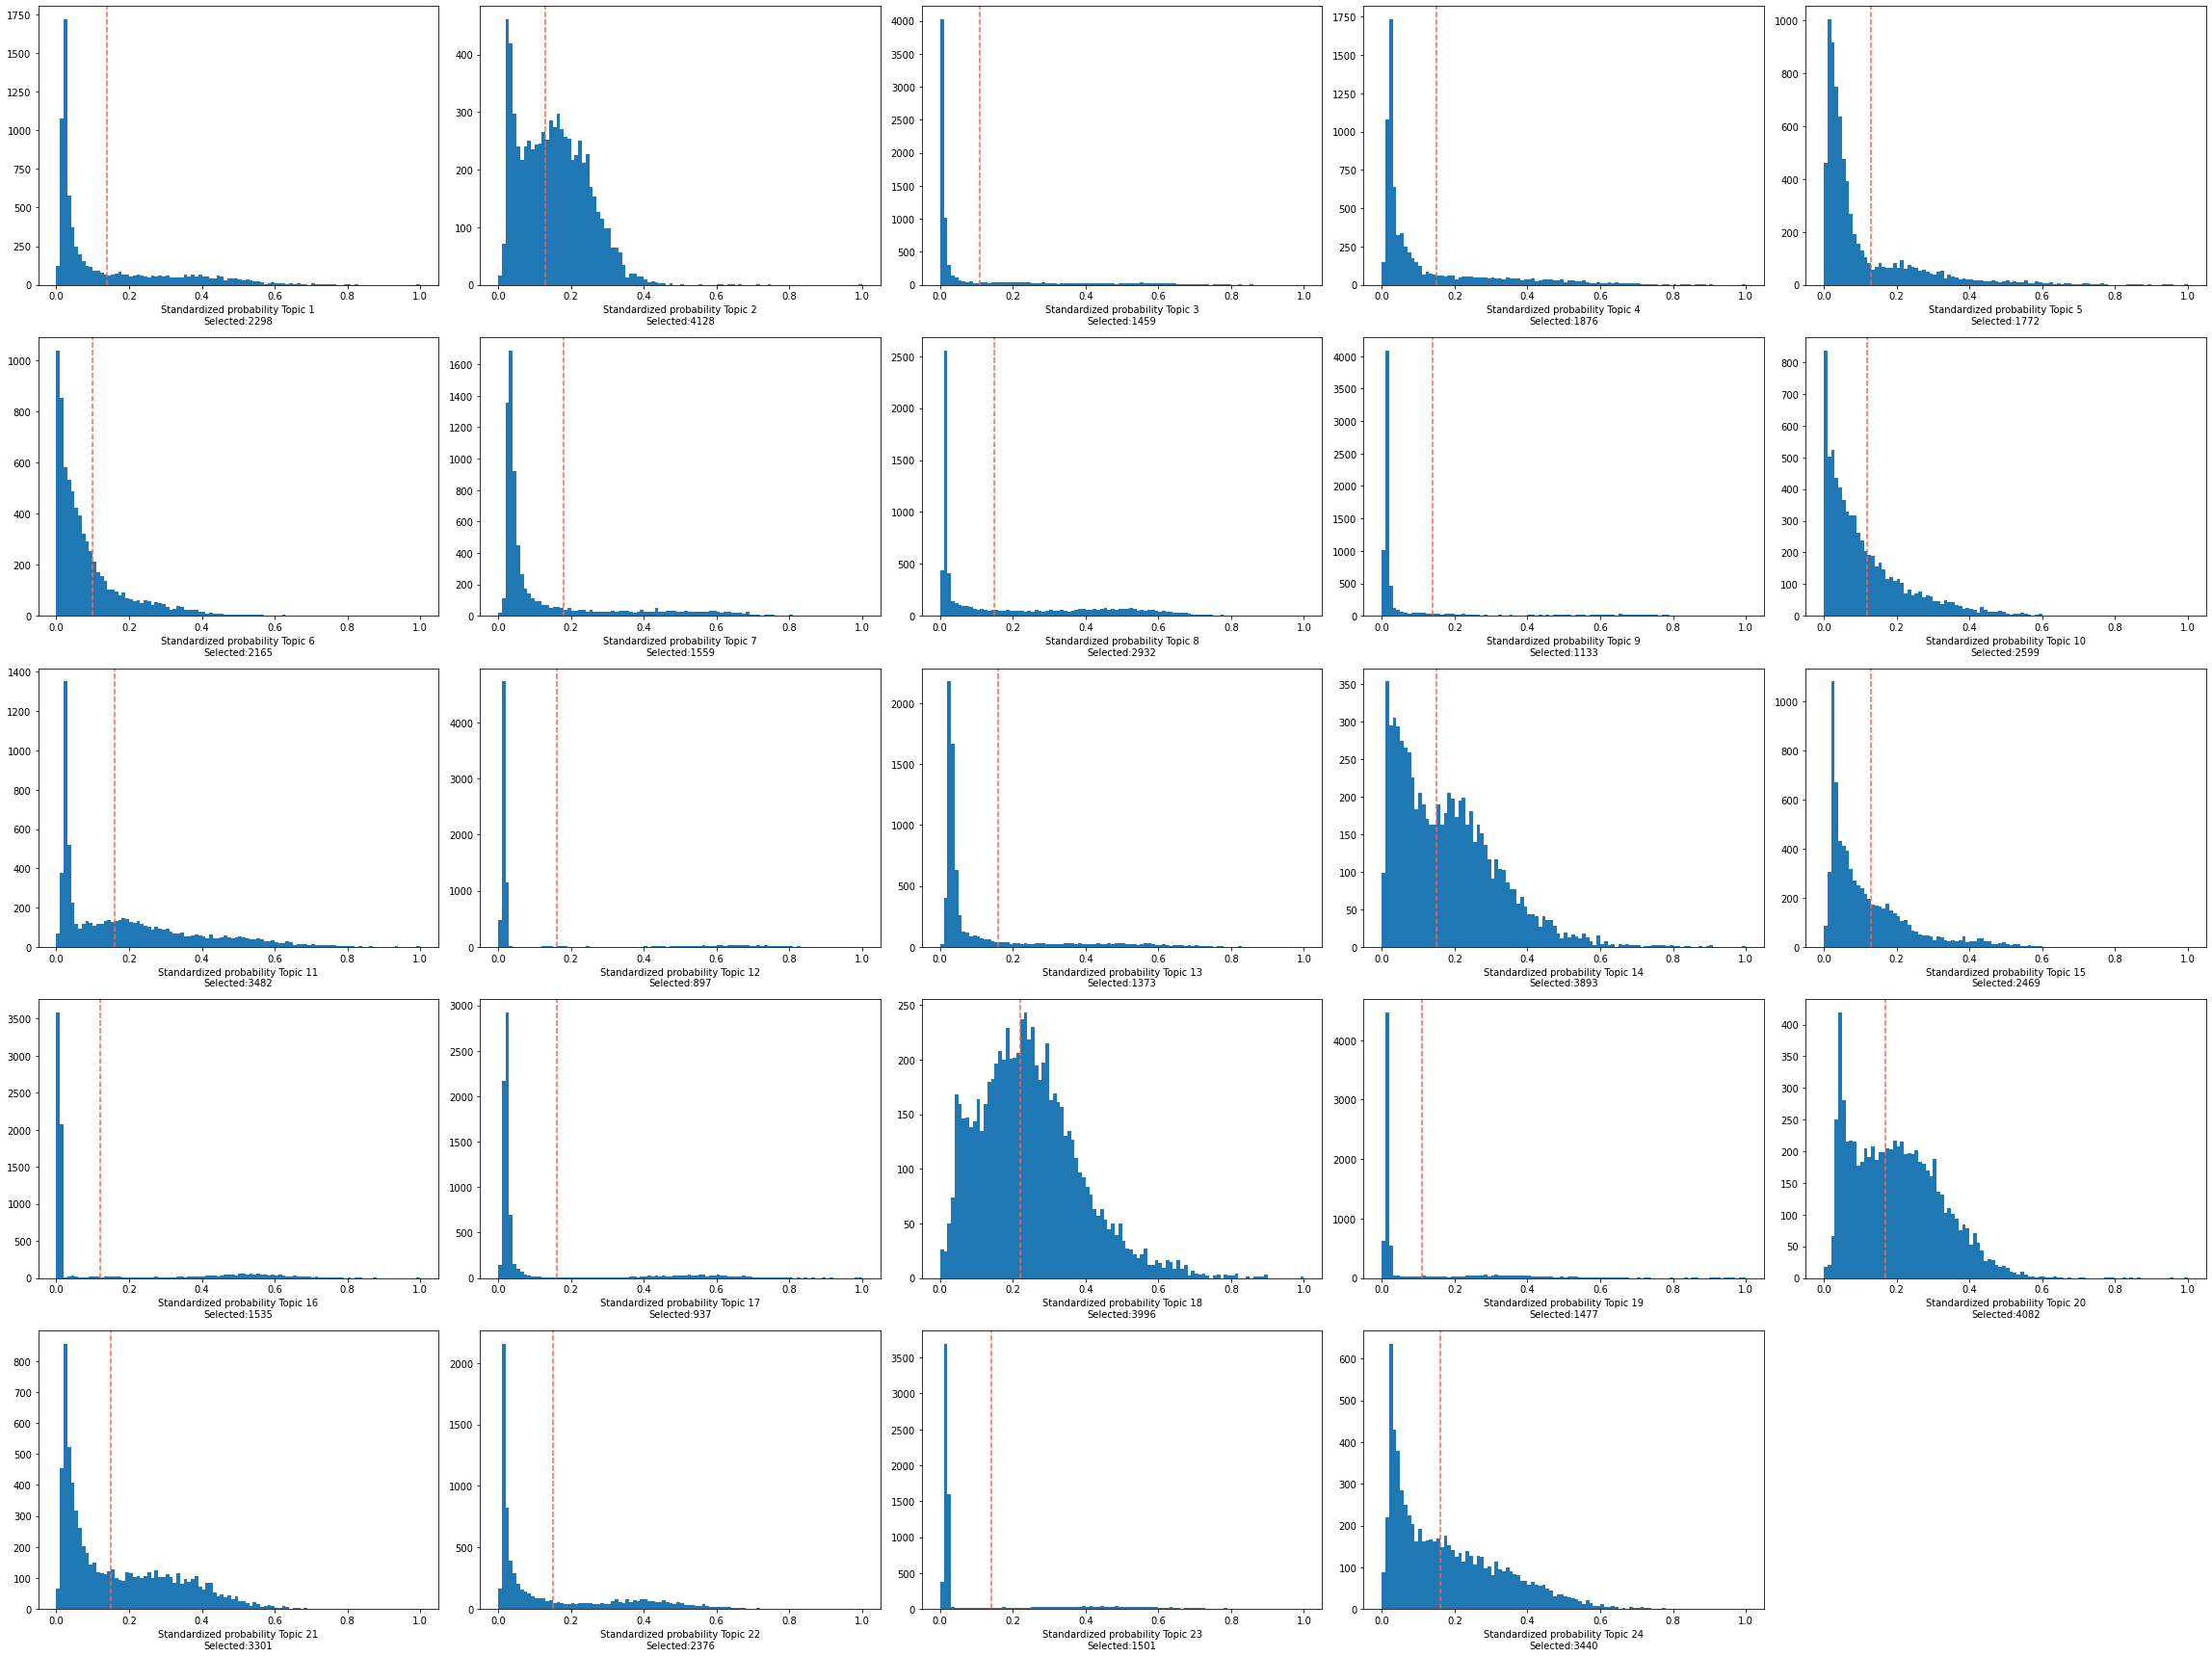

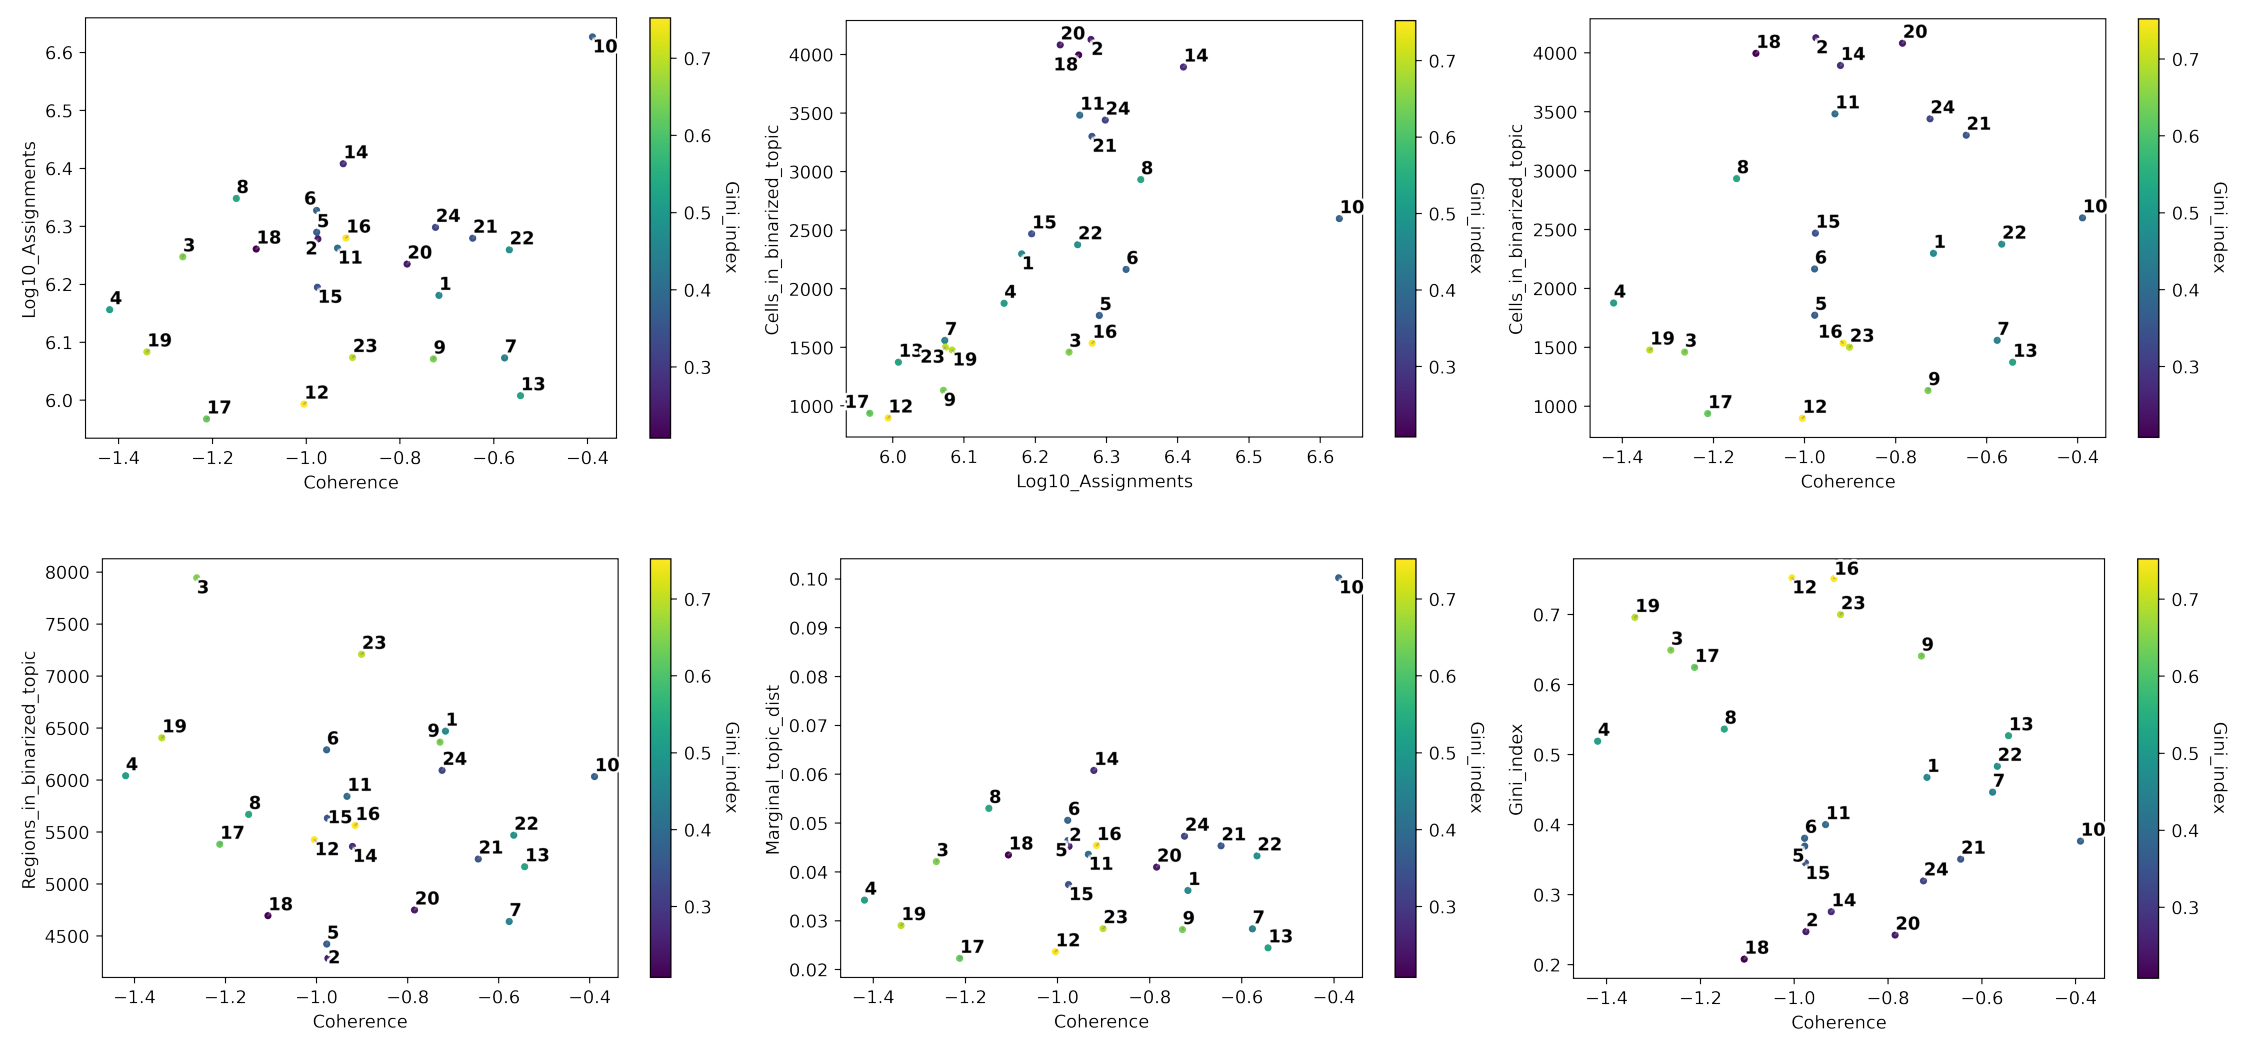

2023-03-08 12:00:11,516 cisTopic     INFO     Imputing drop-outs
2023-03-08 12:00:14,517 cisTopic     INFO     Scaling
2023-03-08 12:00:17,494 cisTopic     INFO     Keep non zero rows
2023-03-08 12:00:21,614 cisTopic     INFO     Imputed accessibility sparsity: 0.4896277382381281
2023-03-08 12:00:21,624 cisTopic     INFO     Create CistopicImputedFeatures object
2023-03-08 12:00:21,625 cisTopic     INFO     Done!
2023-03-08 12:00:21,647 cisTopic     INFO     Normalizing imputed data
2023-03-08 12:00:32,537 cisTopic     INFO     Done!
2023-03-08 12:00:41,599 cisTopic     INFO     Calculating mean
2023-03-08 12:00:42,783 cisTopic     INFO     Calculating variance


<Figure size 432x288 with 0 Axes>

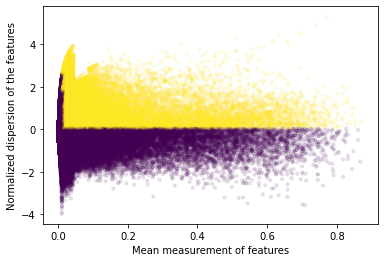

2023-03-08 12:00:55,645 cisTopic     INFO     Done!
Found 35344 variable regions
Cytotoxic T cell
CD4+ T cell
Natural killer cell
CD14+ monocyte
B cell
CD16+ monocyte
Dendritic cell


2023-03-08 12:01:00,326	INFO services.py:1470 -- View the Ray dashboard at http://127.0.0.1:8265


(markers_ray pid=1167820) 2023-03-08 12:01:04,355 cisTopic     INFO     Formatting data for ddseq_sampleA_Cytotoxic T cell_VS_ddseq_sampleB_Cytotoxic T cell
(markers_ray pid=1167831) 2023-03-08 12:01:04,859 cisTopic     INFO     Formatting data for ddseq_sampleB_Cytotoxic T cell_VS_ddseq_sampleA_Cytotoxic T cell
(markers_ray pid=1167828) 2023-03-08 12:01:05,247 cisTopic     INFO     Formatting data for ddseq_sampleA_CD4+ T cell_VS_ddseq_sampleB_CD4+ T cell
(markers_ray pid=1167820) 2023-03-08 12:01:05,454 cisTopic     INFO     Computing p-value for ddseq_sampleA_Cytotoxic T cell_VS_ddseq_sampleB_Cytotoxic T cell
(markers_ray pid=1167822) 2023-03-08 12:01:05,715 cisTopic     INFO     Formatting data for ddseq_sampleB_CD4+ T cell_VS_ddseq_sampleA_CD4+ T cell
(markers_ray pid=1167831) 2023-03-08 12:01:05,929 cisTopic     INFO     Computing p-value for ddseq_sampleB_Cytotoxic T cell_VS_ddseq_sampleA_Cytotoxic T cell
(markers_ray pid=1167819) 2023-03-08 12:01:06,073 cisTopic     INFO     Fo

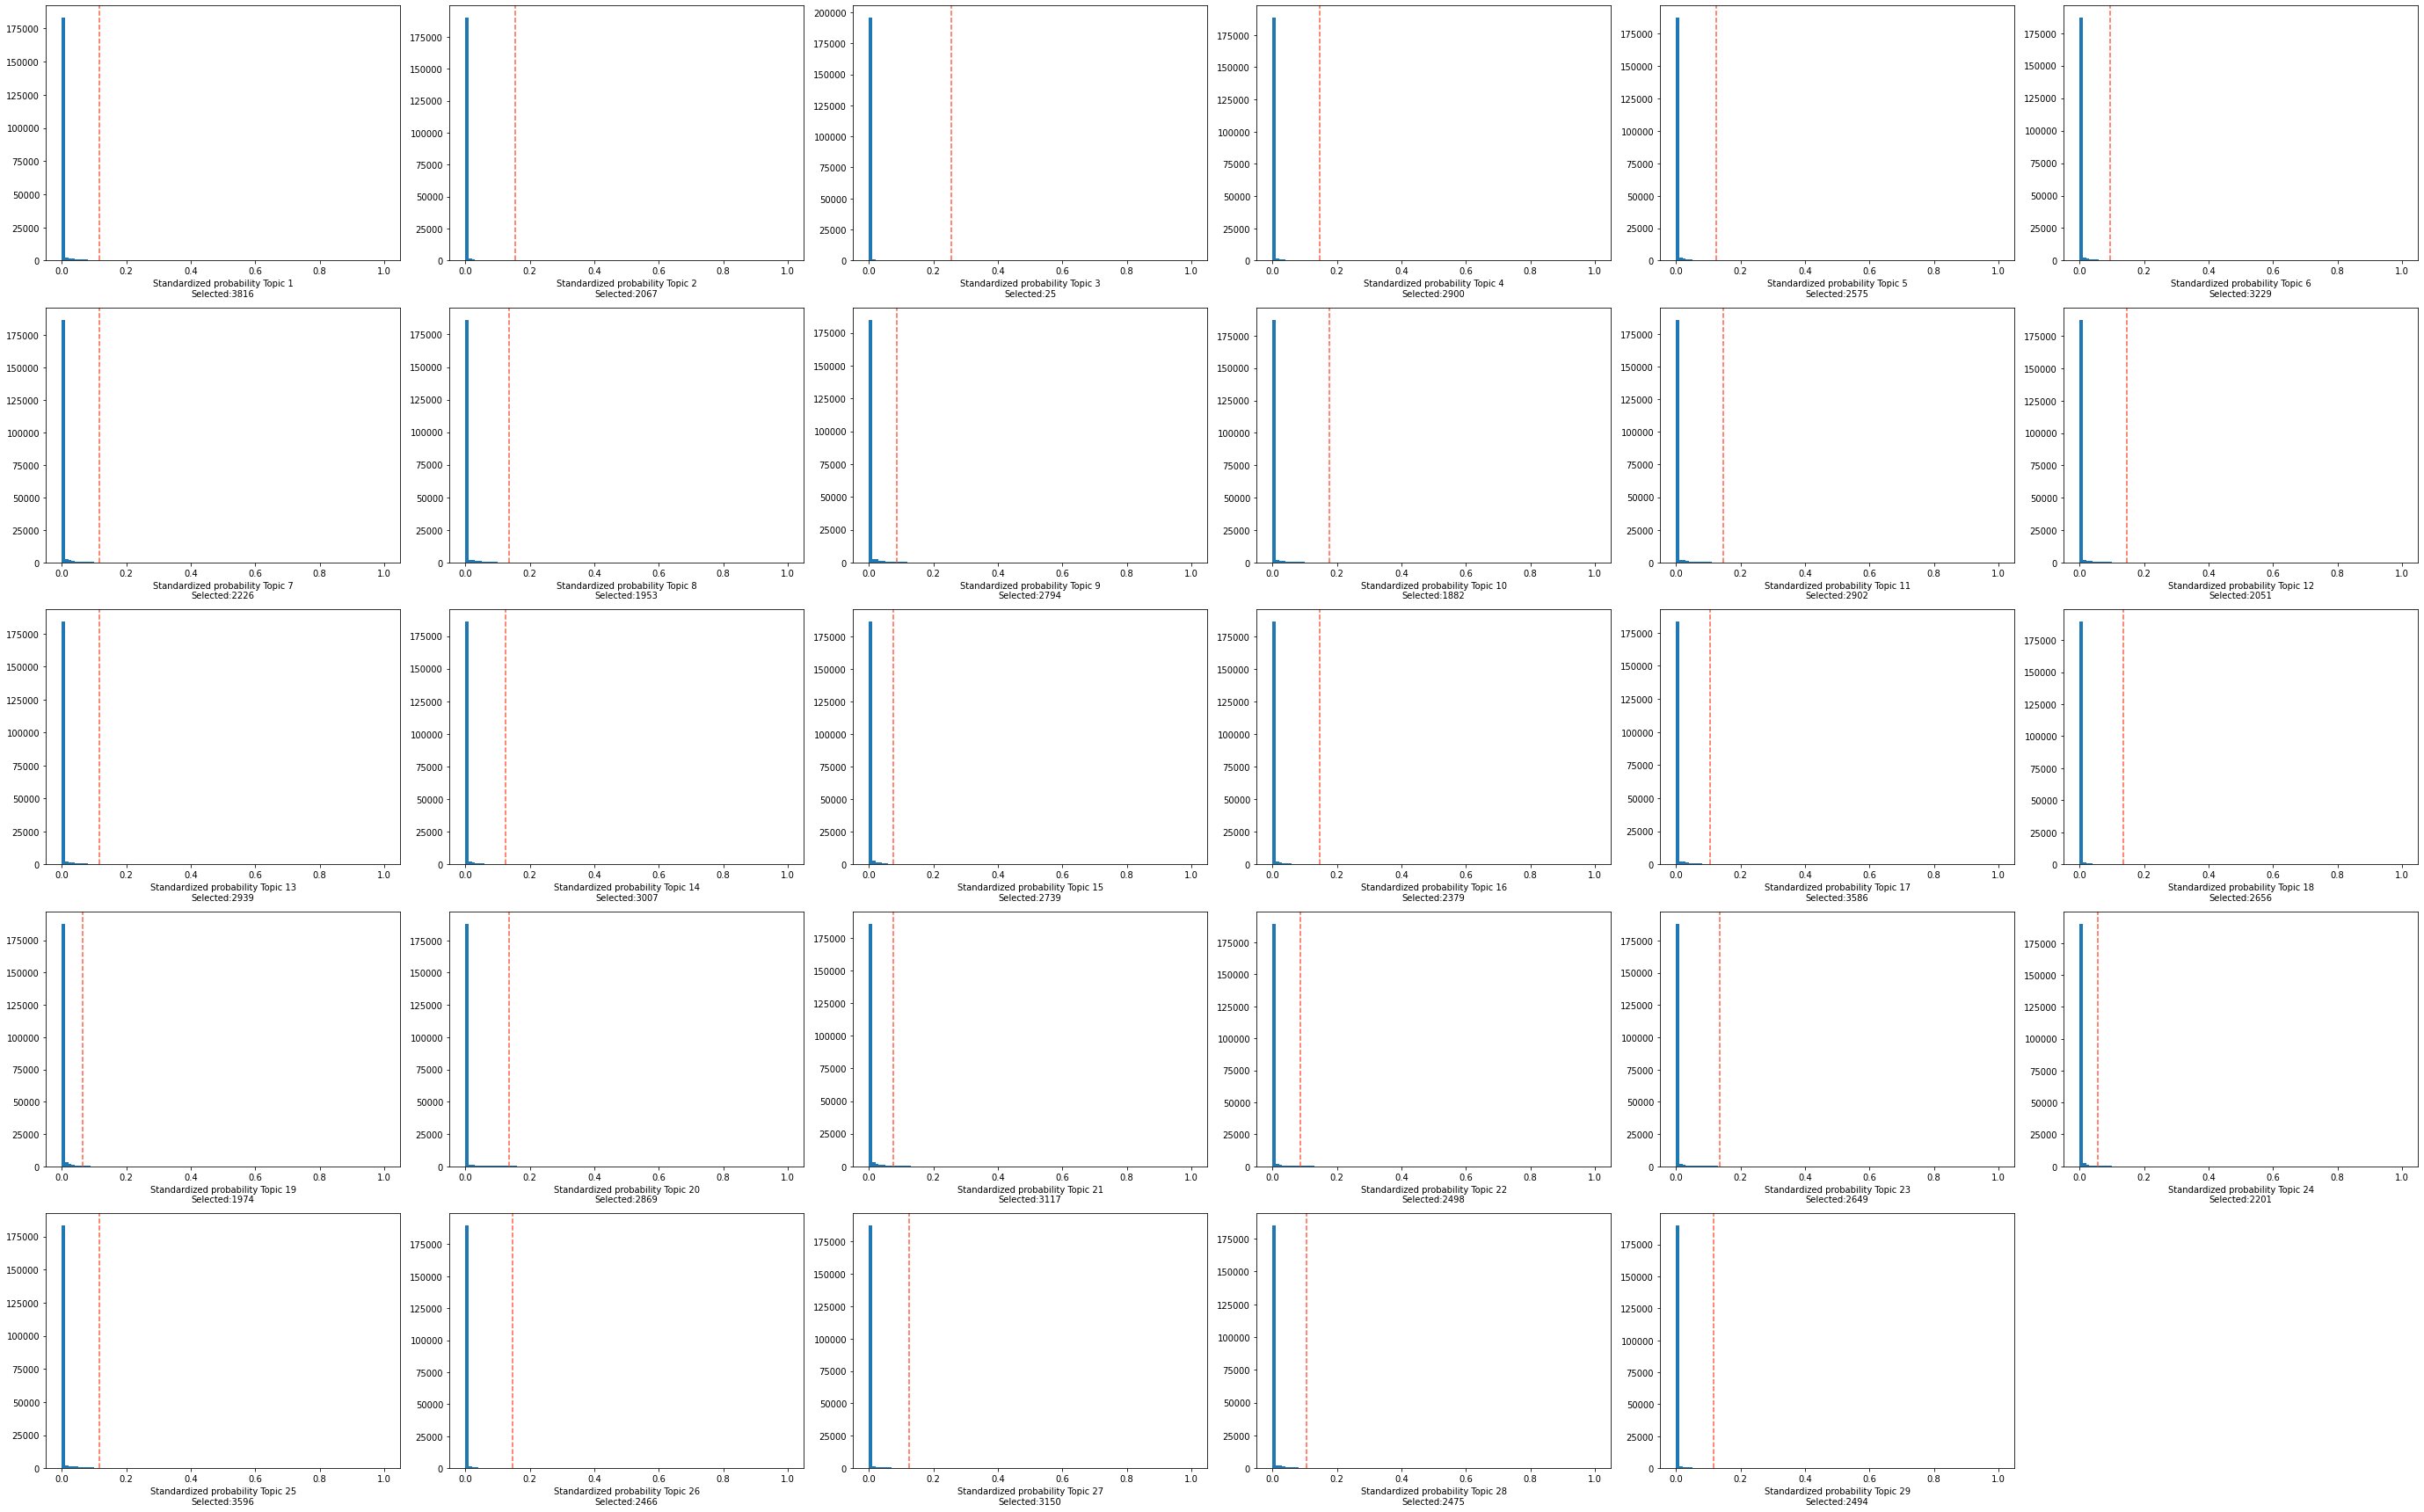

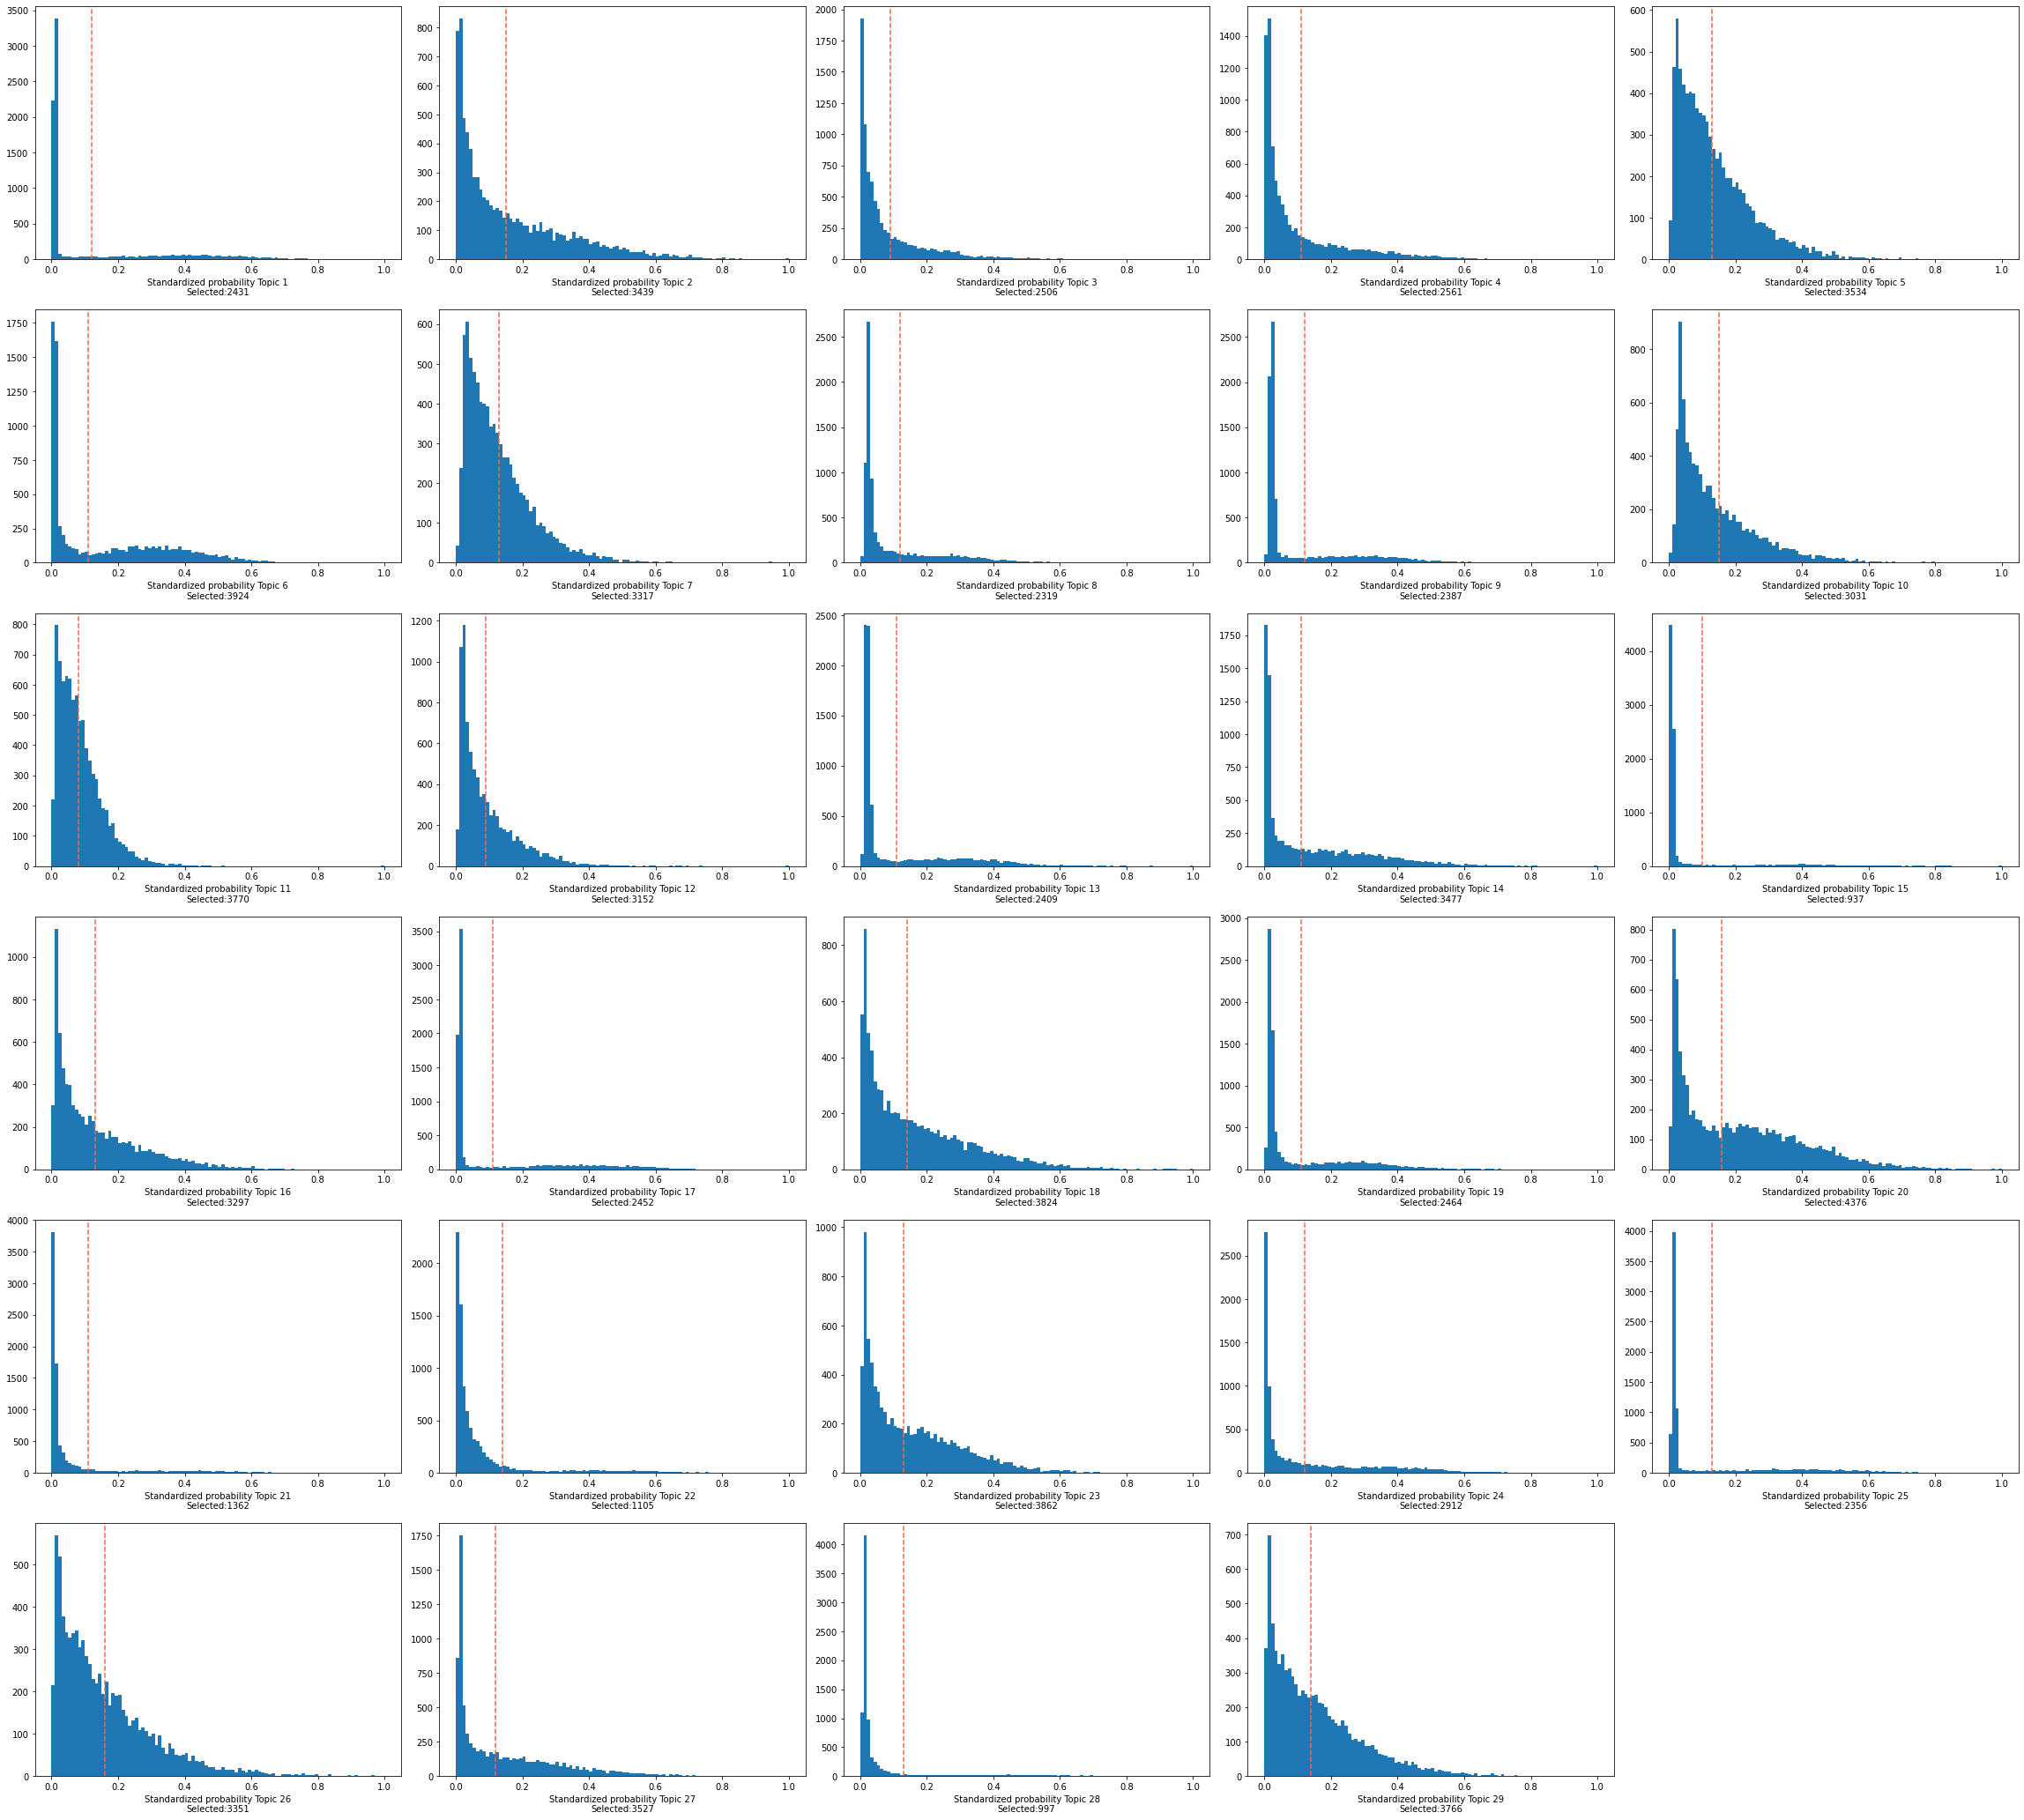

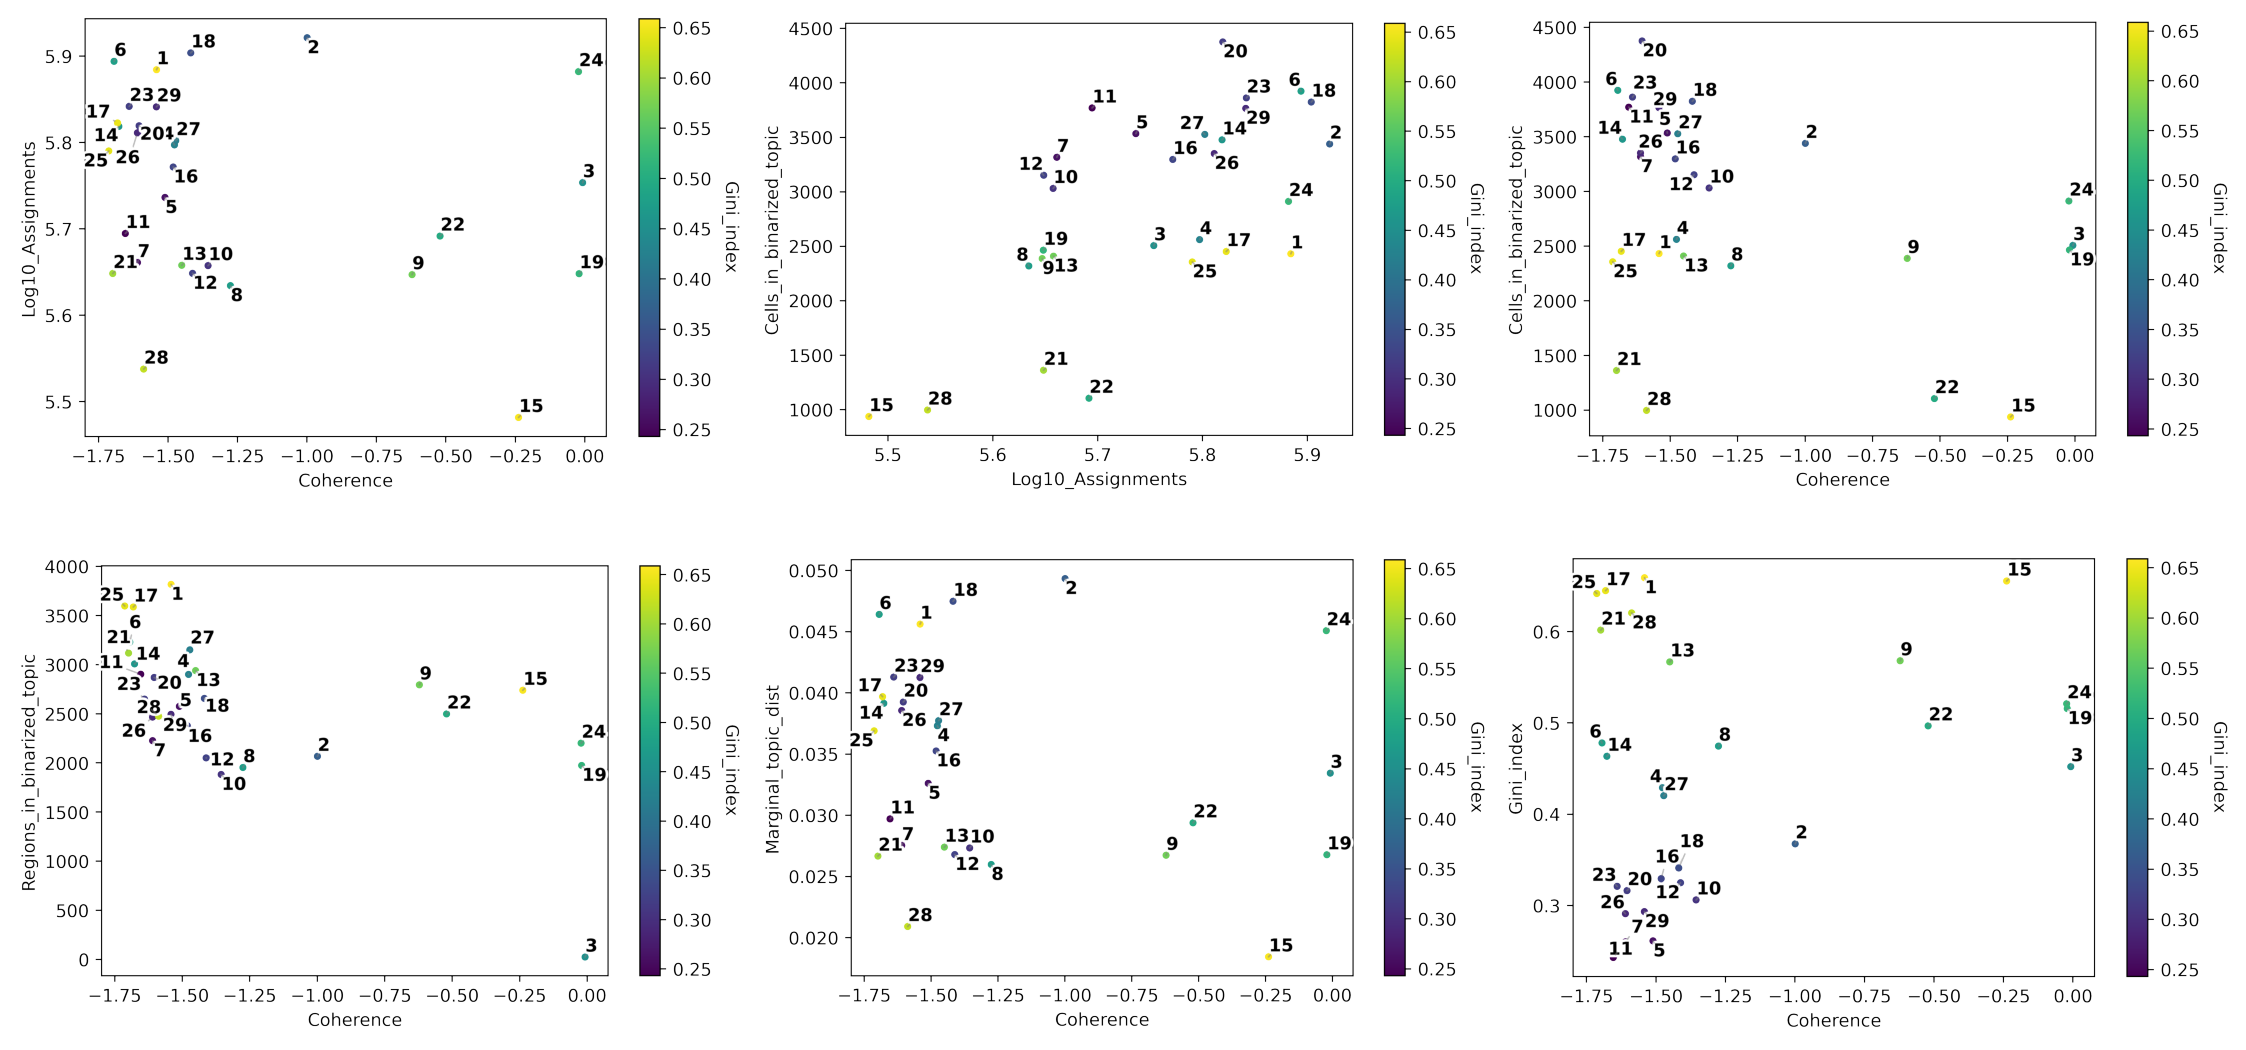

2023-03-08 12:02:50,062 cisTopic     INFO     Imputing drop-outs
2023-03-08 12:02:53,542 cisTopic     INFO     Scaling
2023-03-08 12:02:57,009 cisTopic     INFO     Keep non zero rows
2023-03-08 12:03:02,080 cisTopic     INFO     Imputed accessibility sparsity: 0.48431649446849756
2023-03-08 12:03:02,082 cisTopic     INFO     Create CistopicImputedFeatures object
2023-03-08 12:03:02,084 cisTopic     INFO     Done!
2023-03-08 12:03:02,099 cisTopic     INFO     Normalizing imputed data
2023-03-08 12:03:15,445 cisTopic     INFO     Done!
2023-03-08 12:03:28,268 cisTopic     INFO     Calculating mean
2023-03-08 12:03:29,778 cisTopic     INFO     Calculating variance


<Figure size 432x288 with 0 Axes>

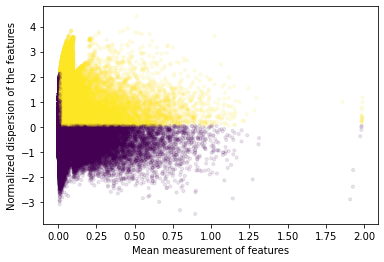

2023-03-08 12:03:44,955 cisTopic     INFO     Done!
Found 47315 variable regions
Cytotoxic T cell
CD4+ T cell
Natural killer cell
CD14+ monocyte
B cell
CD16+ monocyte
Dendritic cell


2023-03-08 12:03:50,254	INFO services.py:1470 -- View the Ray dashboard at http://127.0.0.1:8266


(markers_ray pid=1170716) 2023-03-08 12:03:54,610 cisTopic     INFO     Formatting data for hydrop_sampleA_Cytotoxic T cell_VS_hydrop_sampleB_Cytotoxic T cell
(markers_ray pid=1170715) 2023-03-08 12:03:55,216 cisTopic     INFO     Formatting data for hydrop_sampleB_Cytotoxic T cell_VS_hydrop_sampleA_Cytotoxic T cell
(markers_ray pid=1170709) 2023-03-08 12:03:55,869 cisTopic     INFO     Formatting data for hydrop_sampleA_CD4+ T cell_VS_hydrop_sampleB_CD4+ T cell
(markers_ray pid=1170716) 2023-03-08 12:03:56,100 cisTopic     INFO     Computing p-value for hydrop_sampleA_Cytotoxic T cell_VS_hydrop_sampleB_Cytotoxic T cell
(markers_ray pid=1170714) 2023-03-08 12:03:56,541 cisTopic     INFO     Formatting data for hydrop_sampleB_CD4+ T cell_VS_hydrop_sampleA_CD4+ T cell
(markers_ray pid=1170715) 2023-03-08 12:03:56,625 cisTopic     INFO     Computing p-value for hydrop_sampleB_Cytotoxic T cell_VS_hydrop_sampleA_Cytotoxic T cell
(markers_ray pid=1170701) 2023-03-08 12:03:57,244 cisTopic    

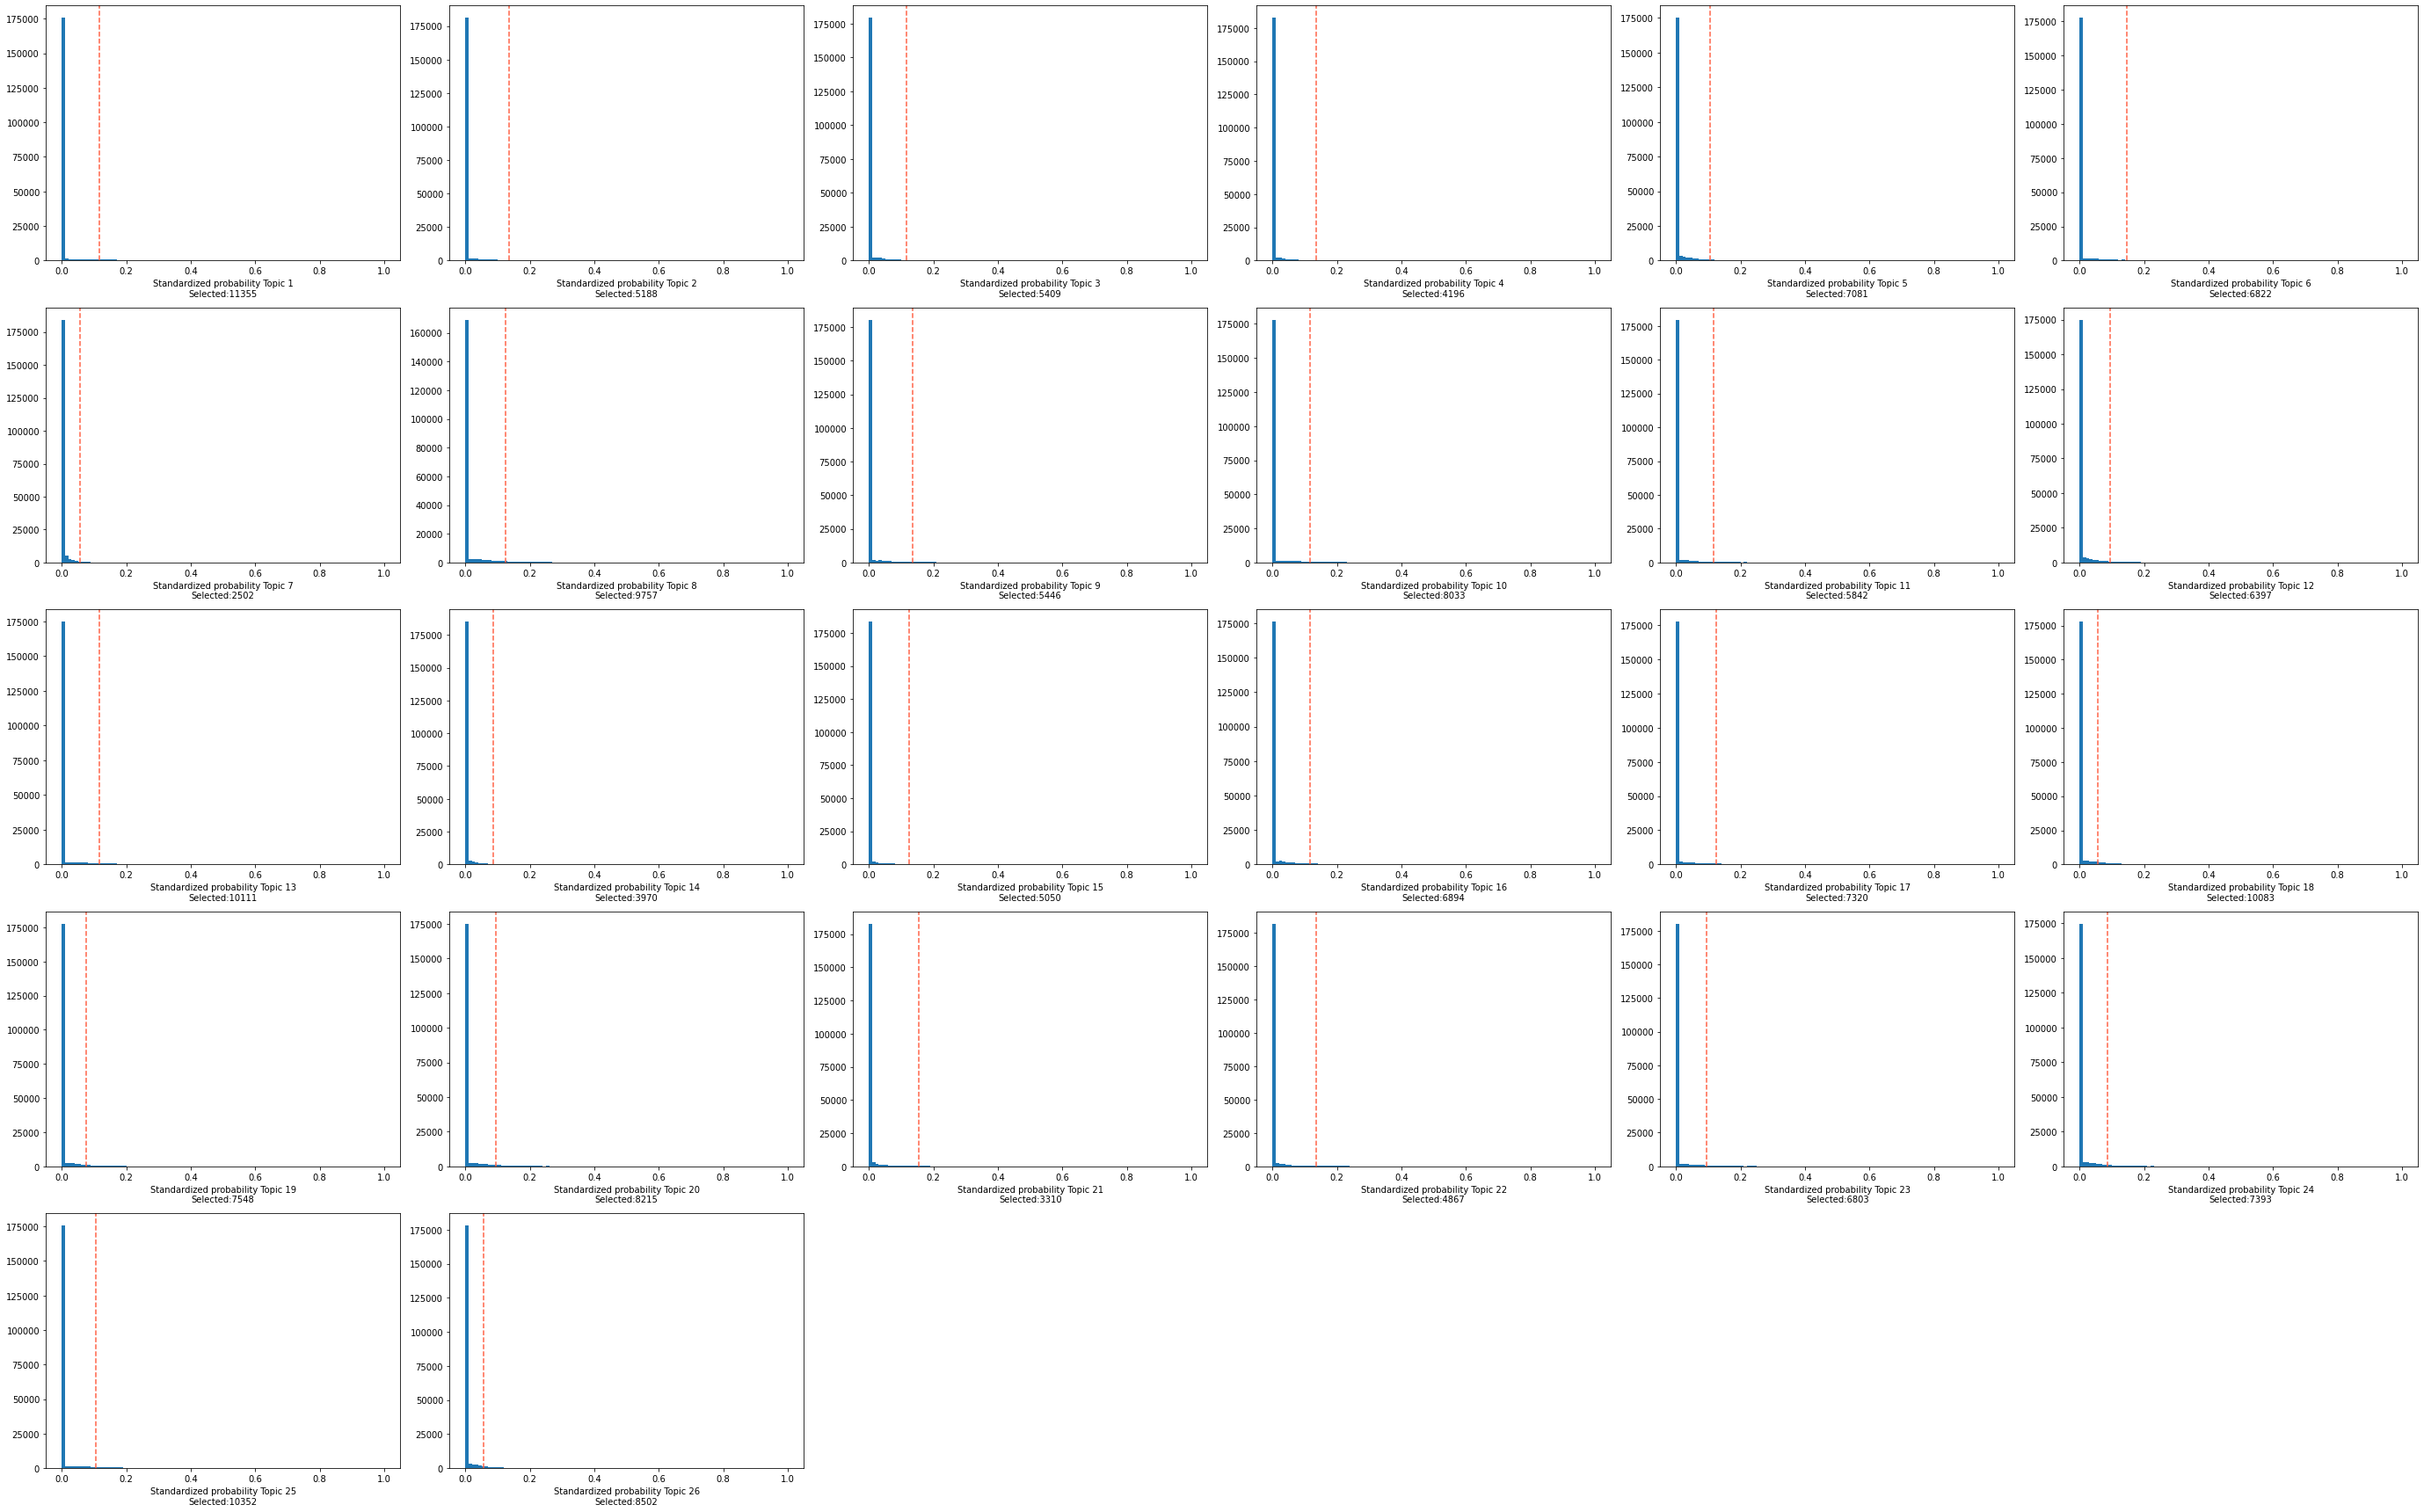

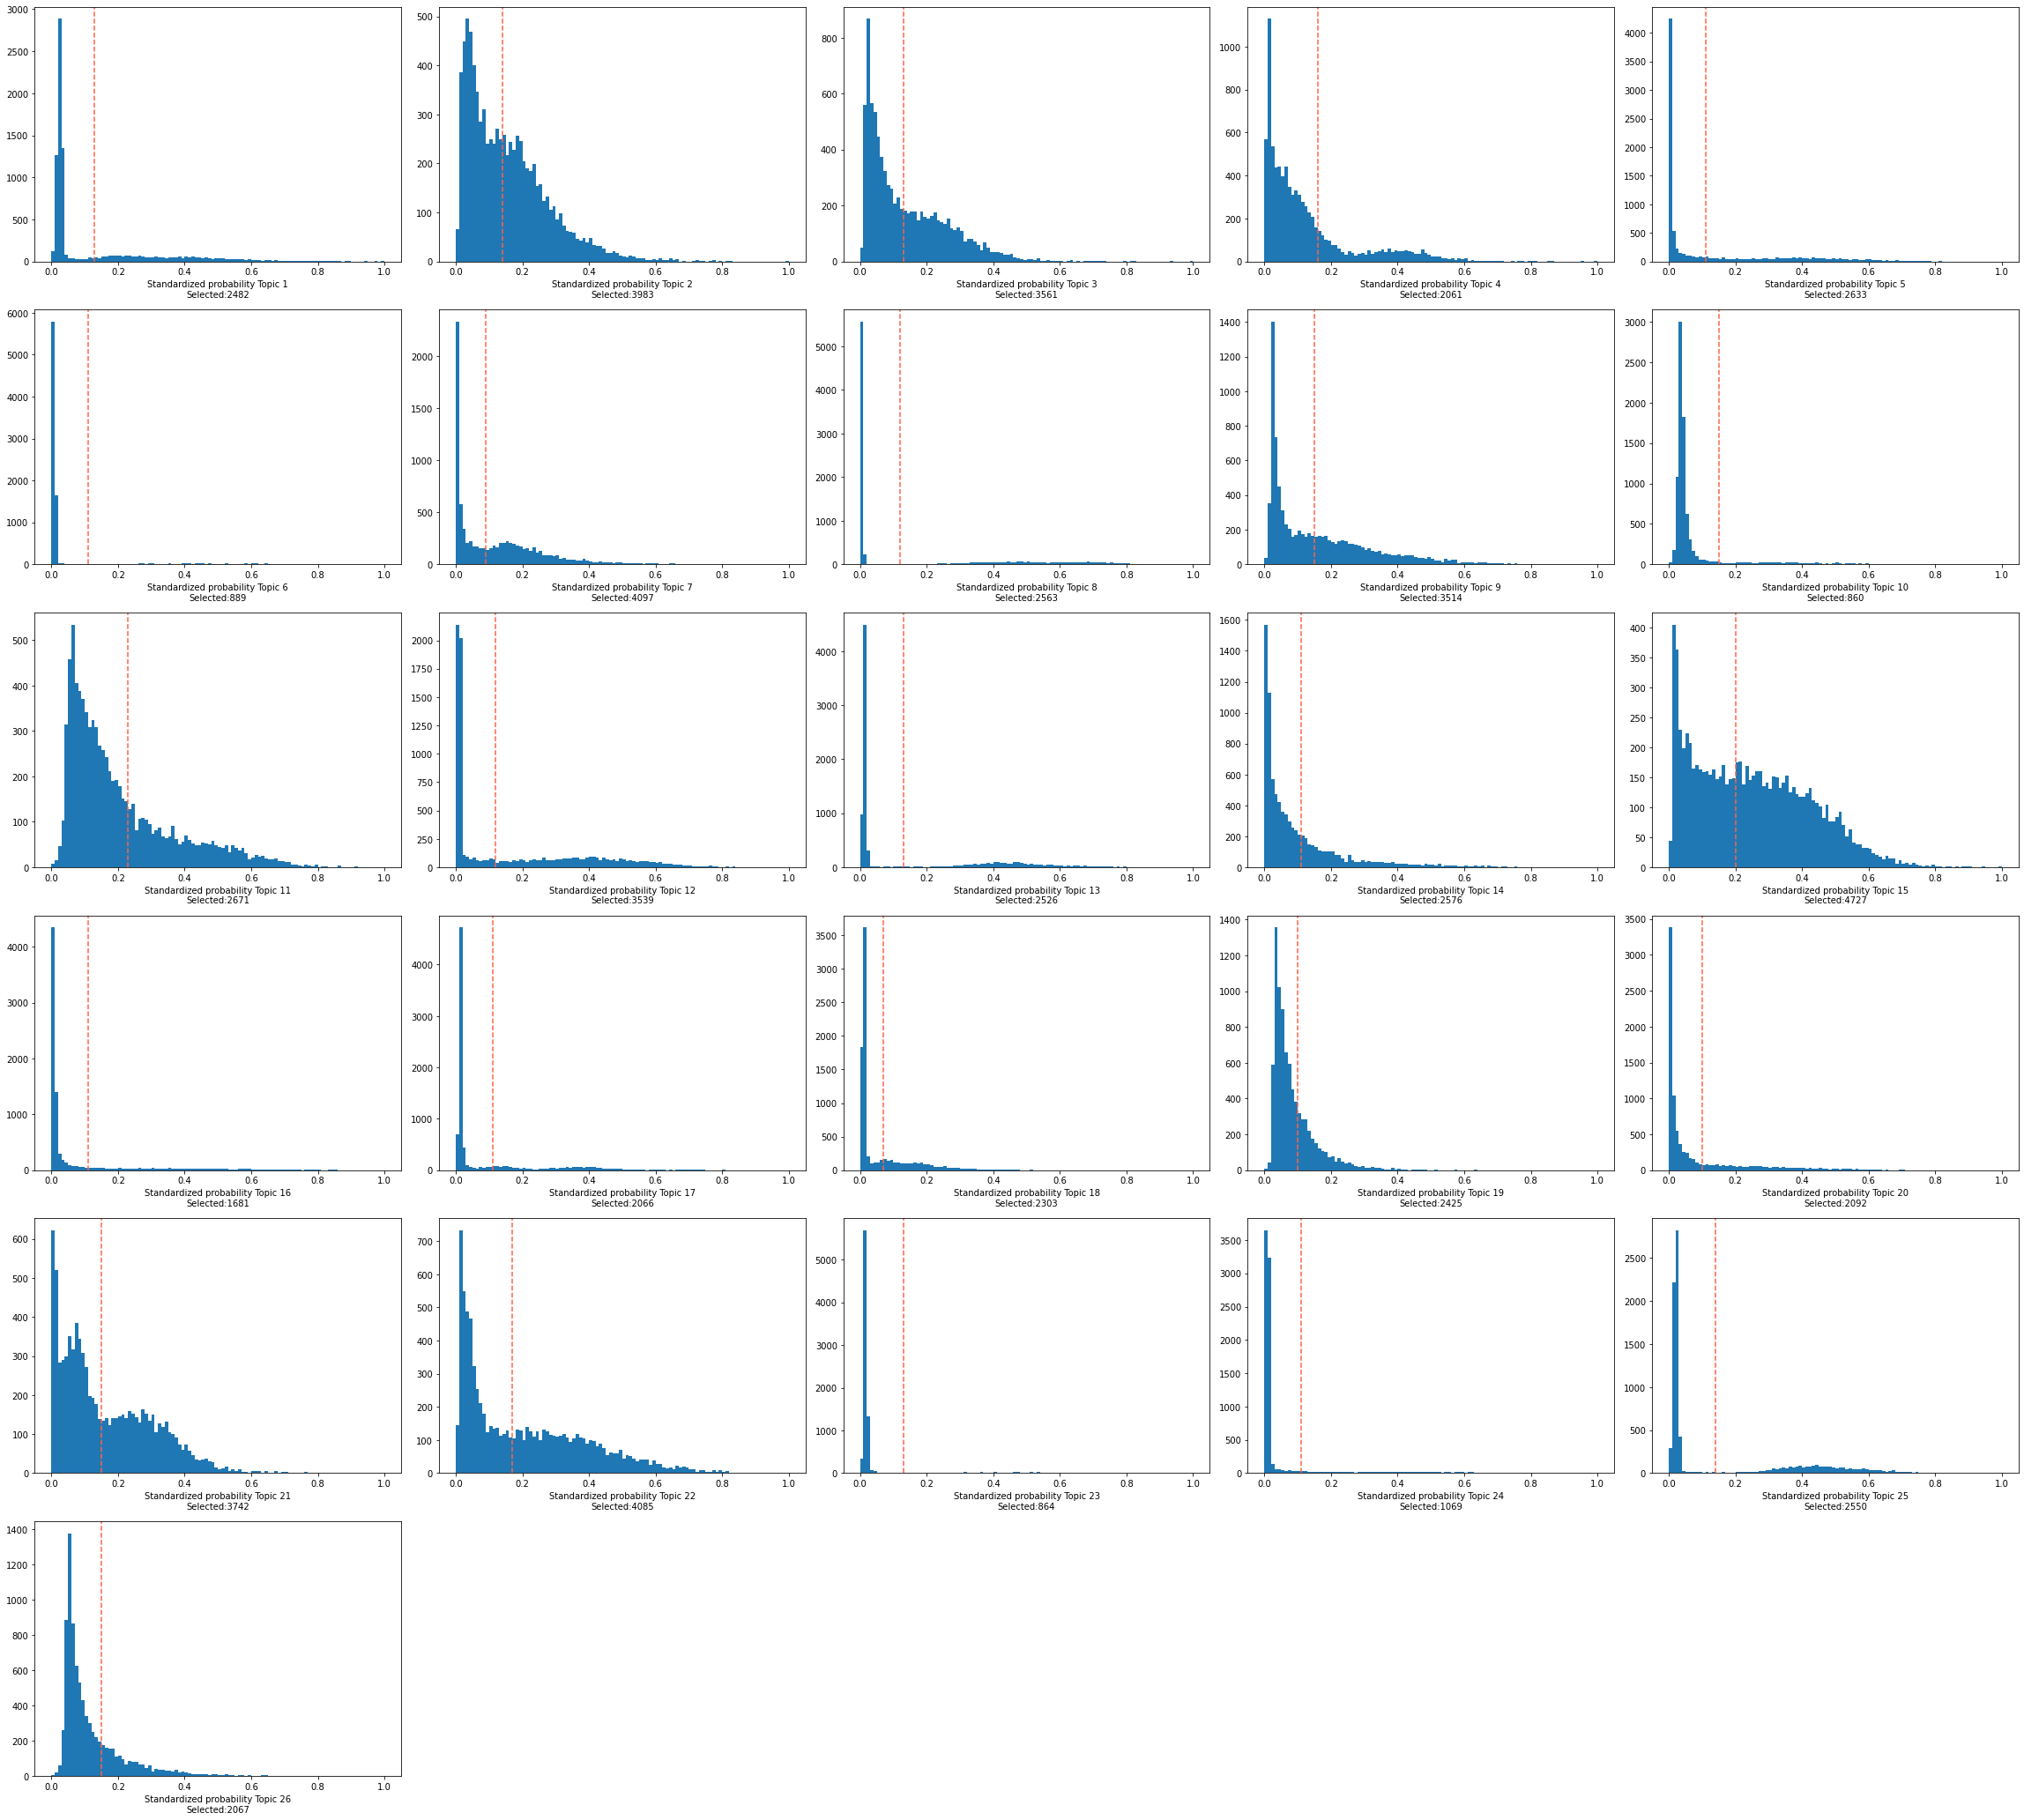

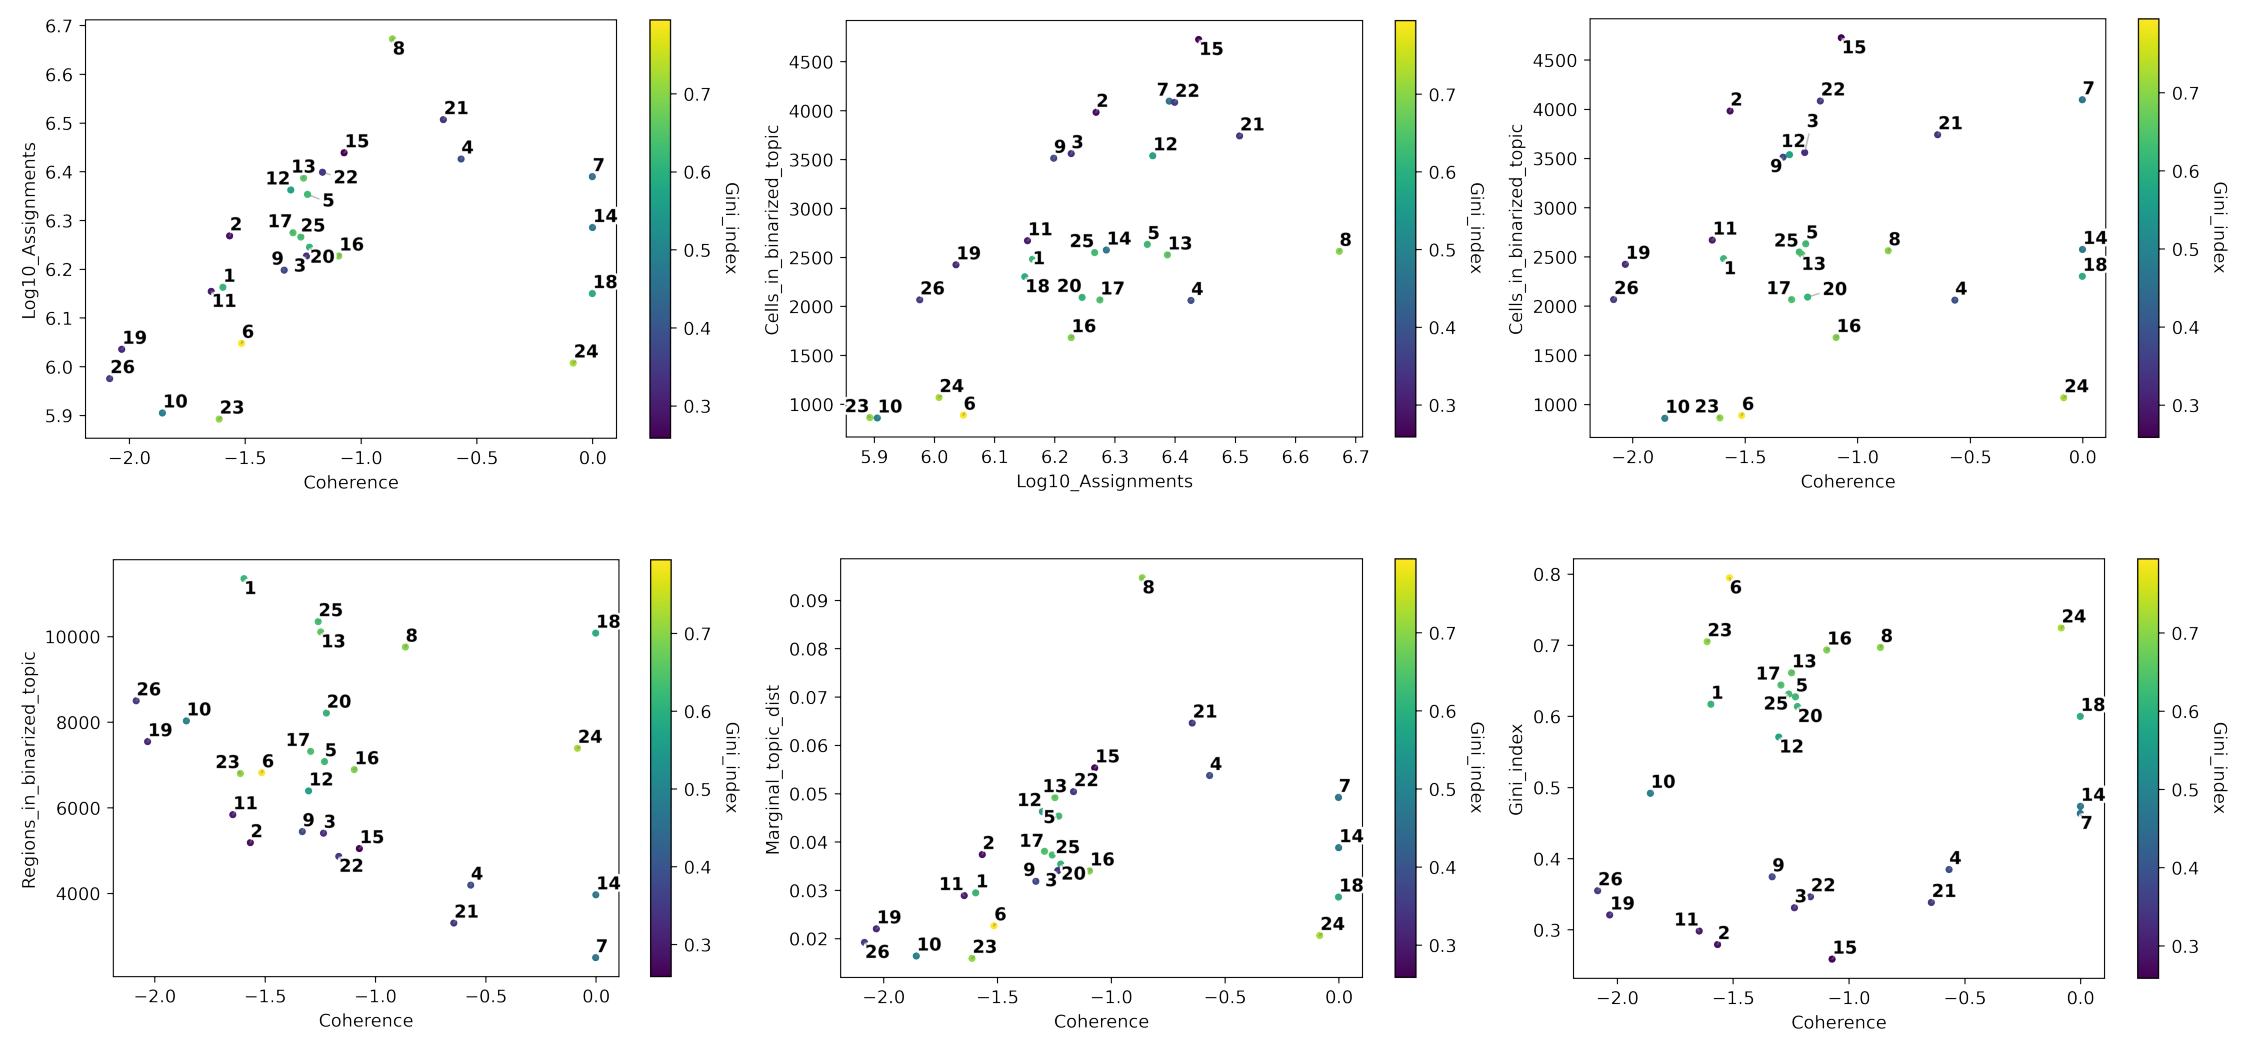

2023-03-08 12:05:40,032 cisTopic     INFO     Imputing drop-outs
2023-03-08 12:05:43,605 cisTopic     INFO     Scaling
2023-03-08 12:05:46,930 cisTopic     INFO     Keep non zero rows
2023-03-08 12:05:51,885 cisTopic     INFO     Imputed accessibility sparsity: 0.3930732811065528
2023-03-08 12:05:51,887 cisTopic     INFO     Create CistopicImputedFeatures object
2023-03-08 12:05:51,888 cisTopic     INFO     Done!
2023-03-08 12:05:51,901 cisTopic     INFO     Normalizing imputed data
2023-03-08 12:06:05,949 cisTopic     INFO     Done!
2023-03-08 12:06:34,903 cisTopic     INFO     Calculating mean
2023-03-08 12:06:36,489 cisTopic     INFO     Calculating variance


<Figure size 432x288 with 0 Axes>

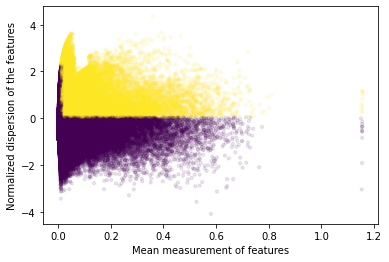

2023-03-08 12:06:53,982 cisTopic     INFO     Done!
Found 62533 variable regions
Cytotoxic T cell
CD4+ T cell
Natural killer cell
CD14+ monocyte
B cell
CD16+ monocyte
Dendritic cell


2023-03-08 12:07:00,131	INFO services.py:1470 -- View the Ray dashboard at http://127.0.0.1:8266


(markers_ray pid=1171806) 2023-03-08 12:07:04,710 cisTopic     INFO     Formatting data for mtscatac_sampleA_Cytotoxic T cell_VS_mtscatac_sampleB_Cytotoxic T cell
(markers_ray pid=1171805) 2023-03-08 12:07:05,595 cisTopic     INFO     Formatting data for mtscatac_sampleB_Cytotoxic T cell_VS_mtscatac_sampleA_Cytotoxic T cell
(markers_ray pid=1171809) 2023-03-08 12:07:06,357 cisTopic     INFO     Formatting data for mtscatac_sampleA_CD4+ T cell_VS_mtscatac_sampleB_CD4+ T cell
(markers_ray pid=1171806) 2023-03-08 12:07:06,577 cisTopic     INFO     Computing p-value for mtscatac_sampleA_Cytotoxic T cell_VS_mtscatac_sampleB_Cytotoxic T cell
(markers_ray pid=1171804) 2023-03-08 12:07:07,214 cisTopic     INFO     Formatting data for mtscatac_sampleB_CD4+ T cell_VS_mtscatac_sampleA_CD4+ T cell
(markers_ray pid=1171805) 2023-03-08 12:07:07,608 cisTopic     INFO     Computing p-value for mtscatac_sampleB_Cytotoxic T cell_VS_mtscatac_sampleA_Cytotoxic T cell
(markers_ray pid=1171807) 2023-03-08 1

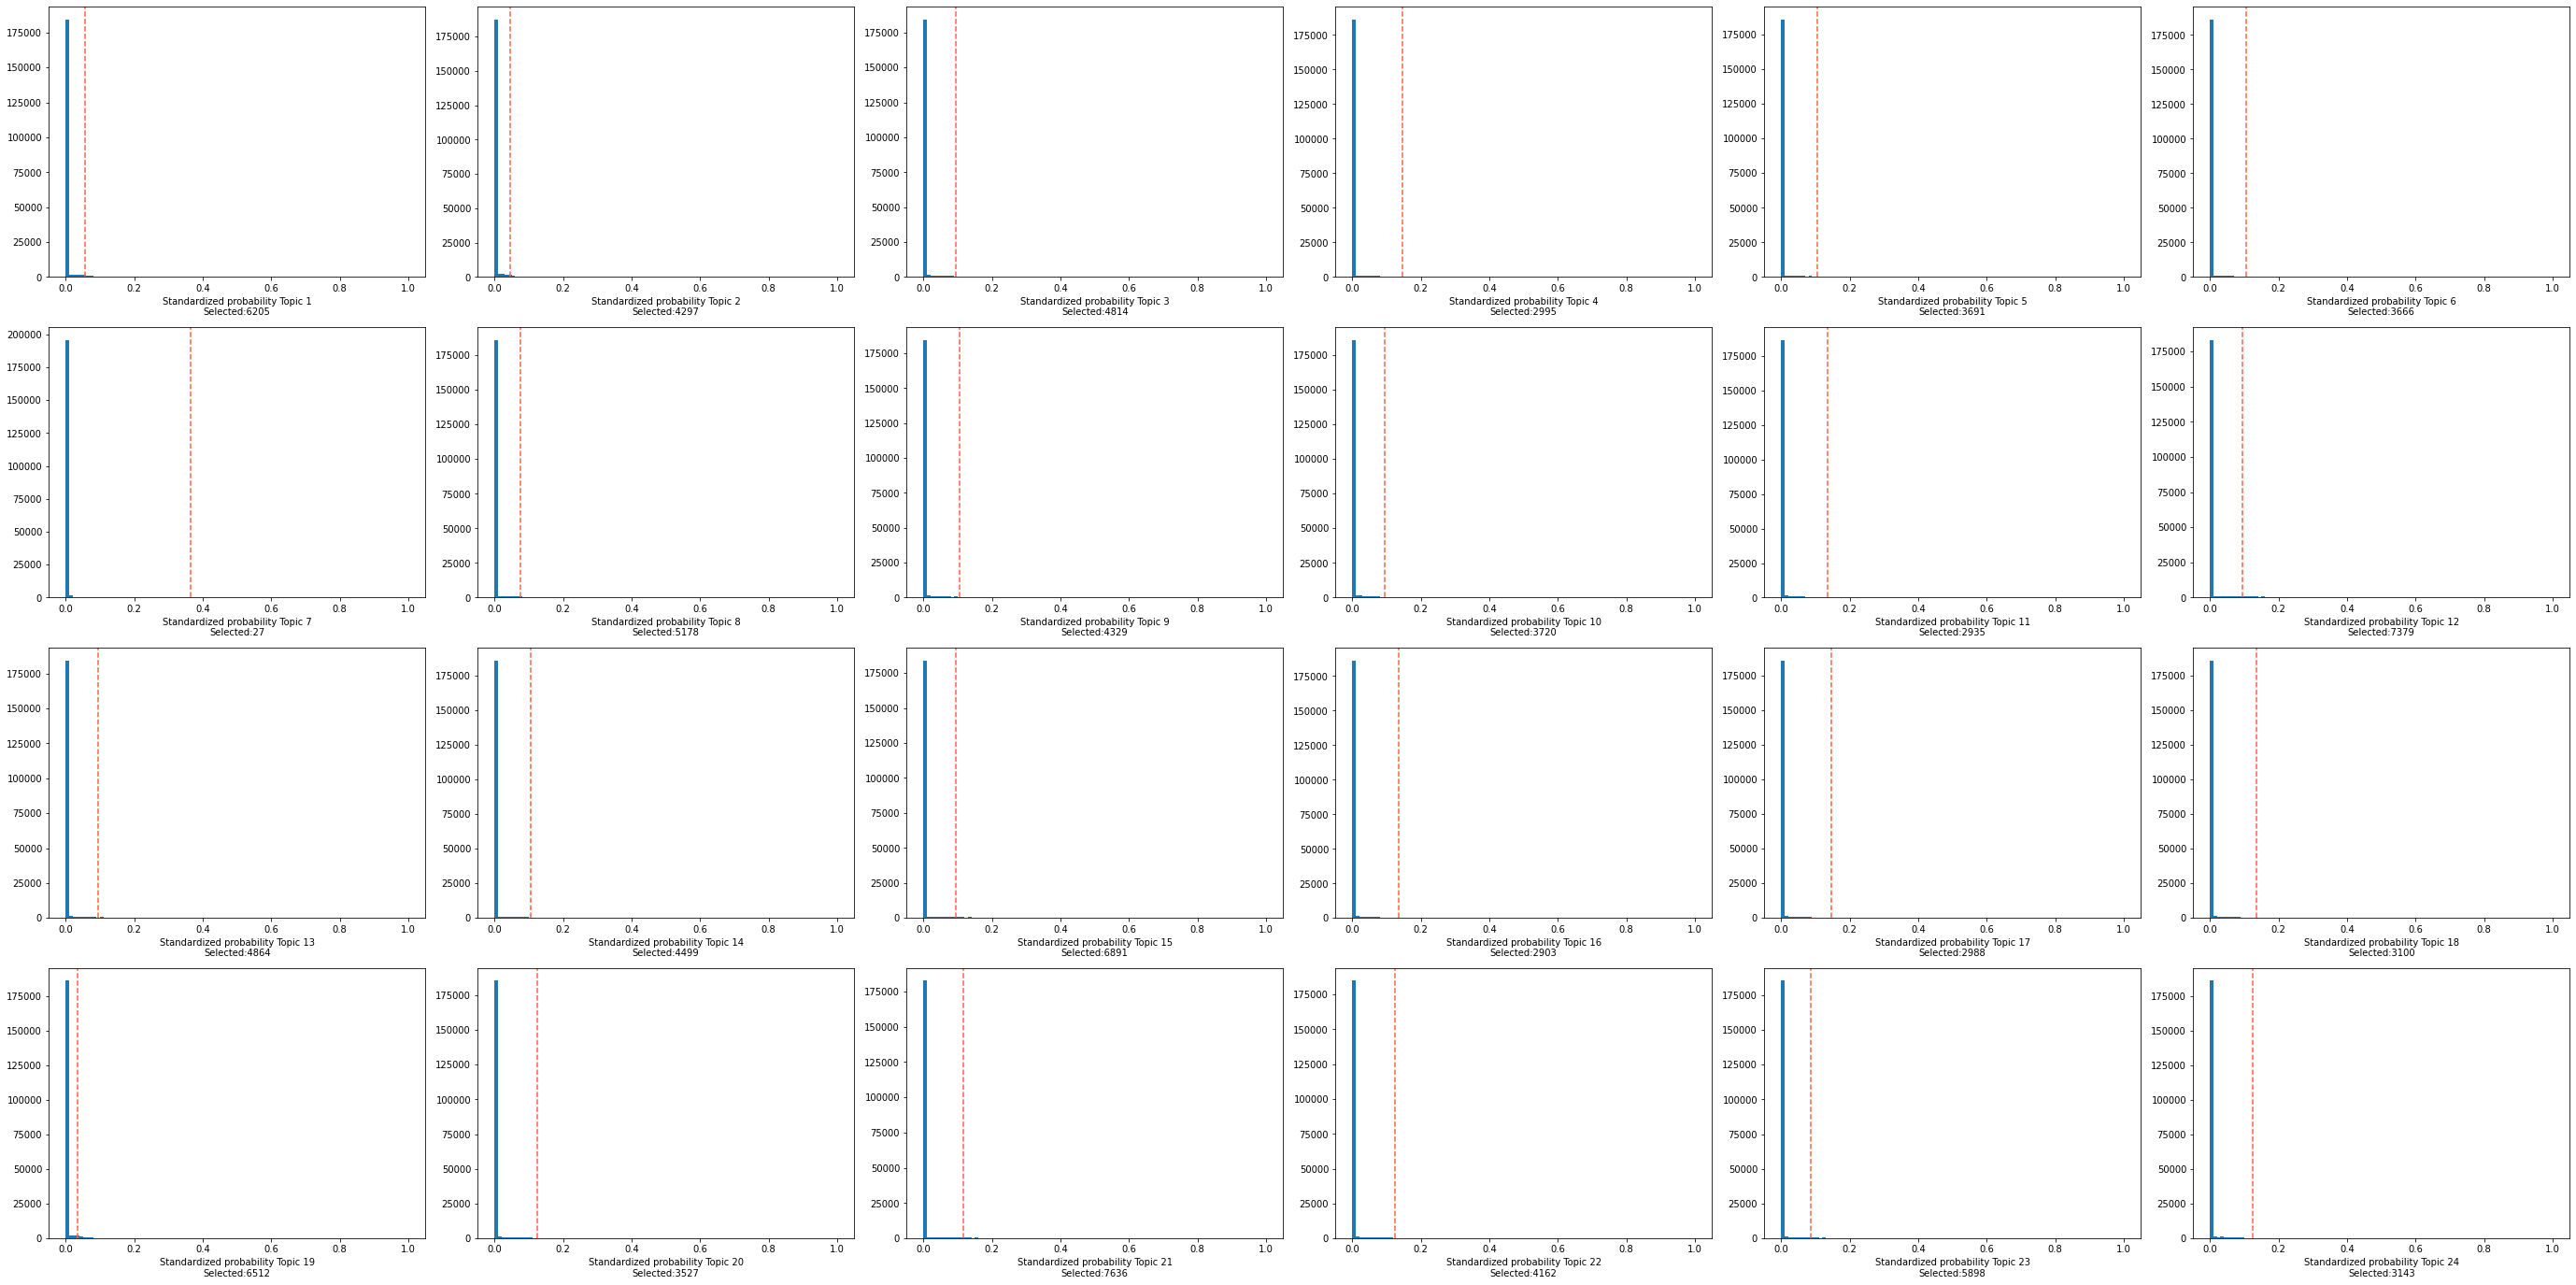

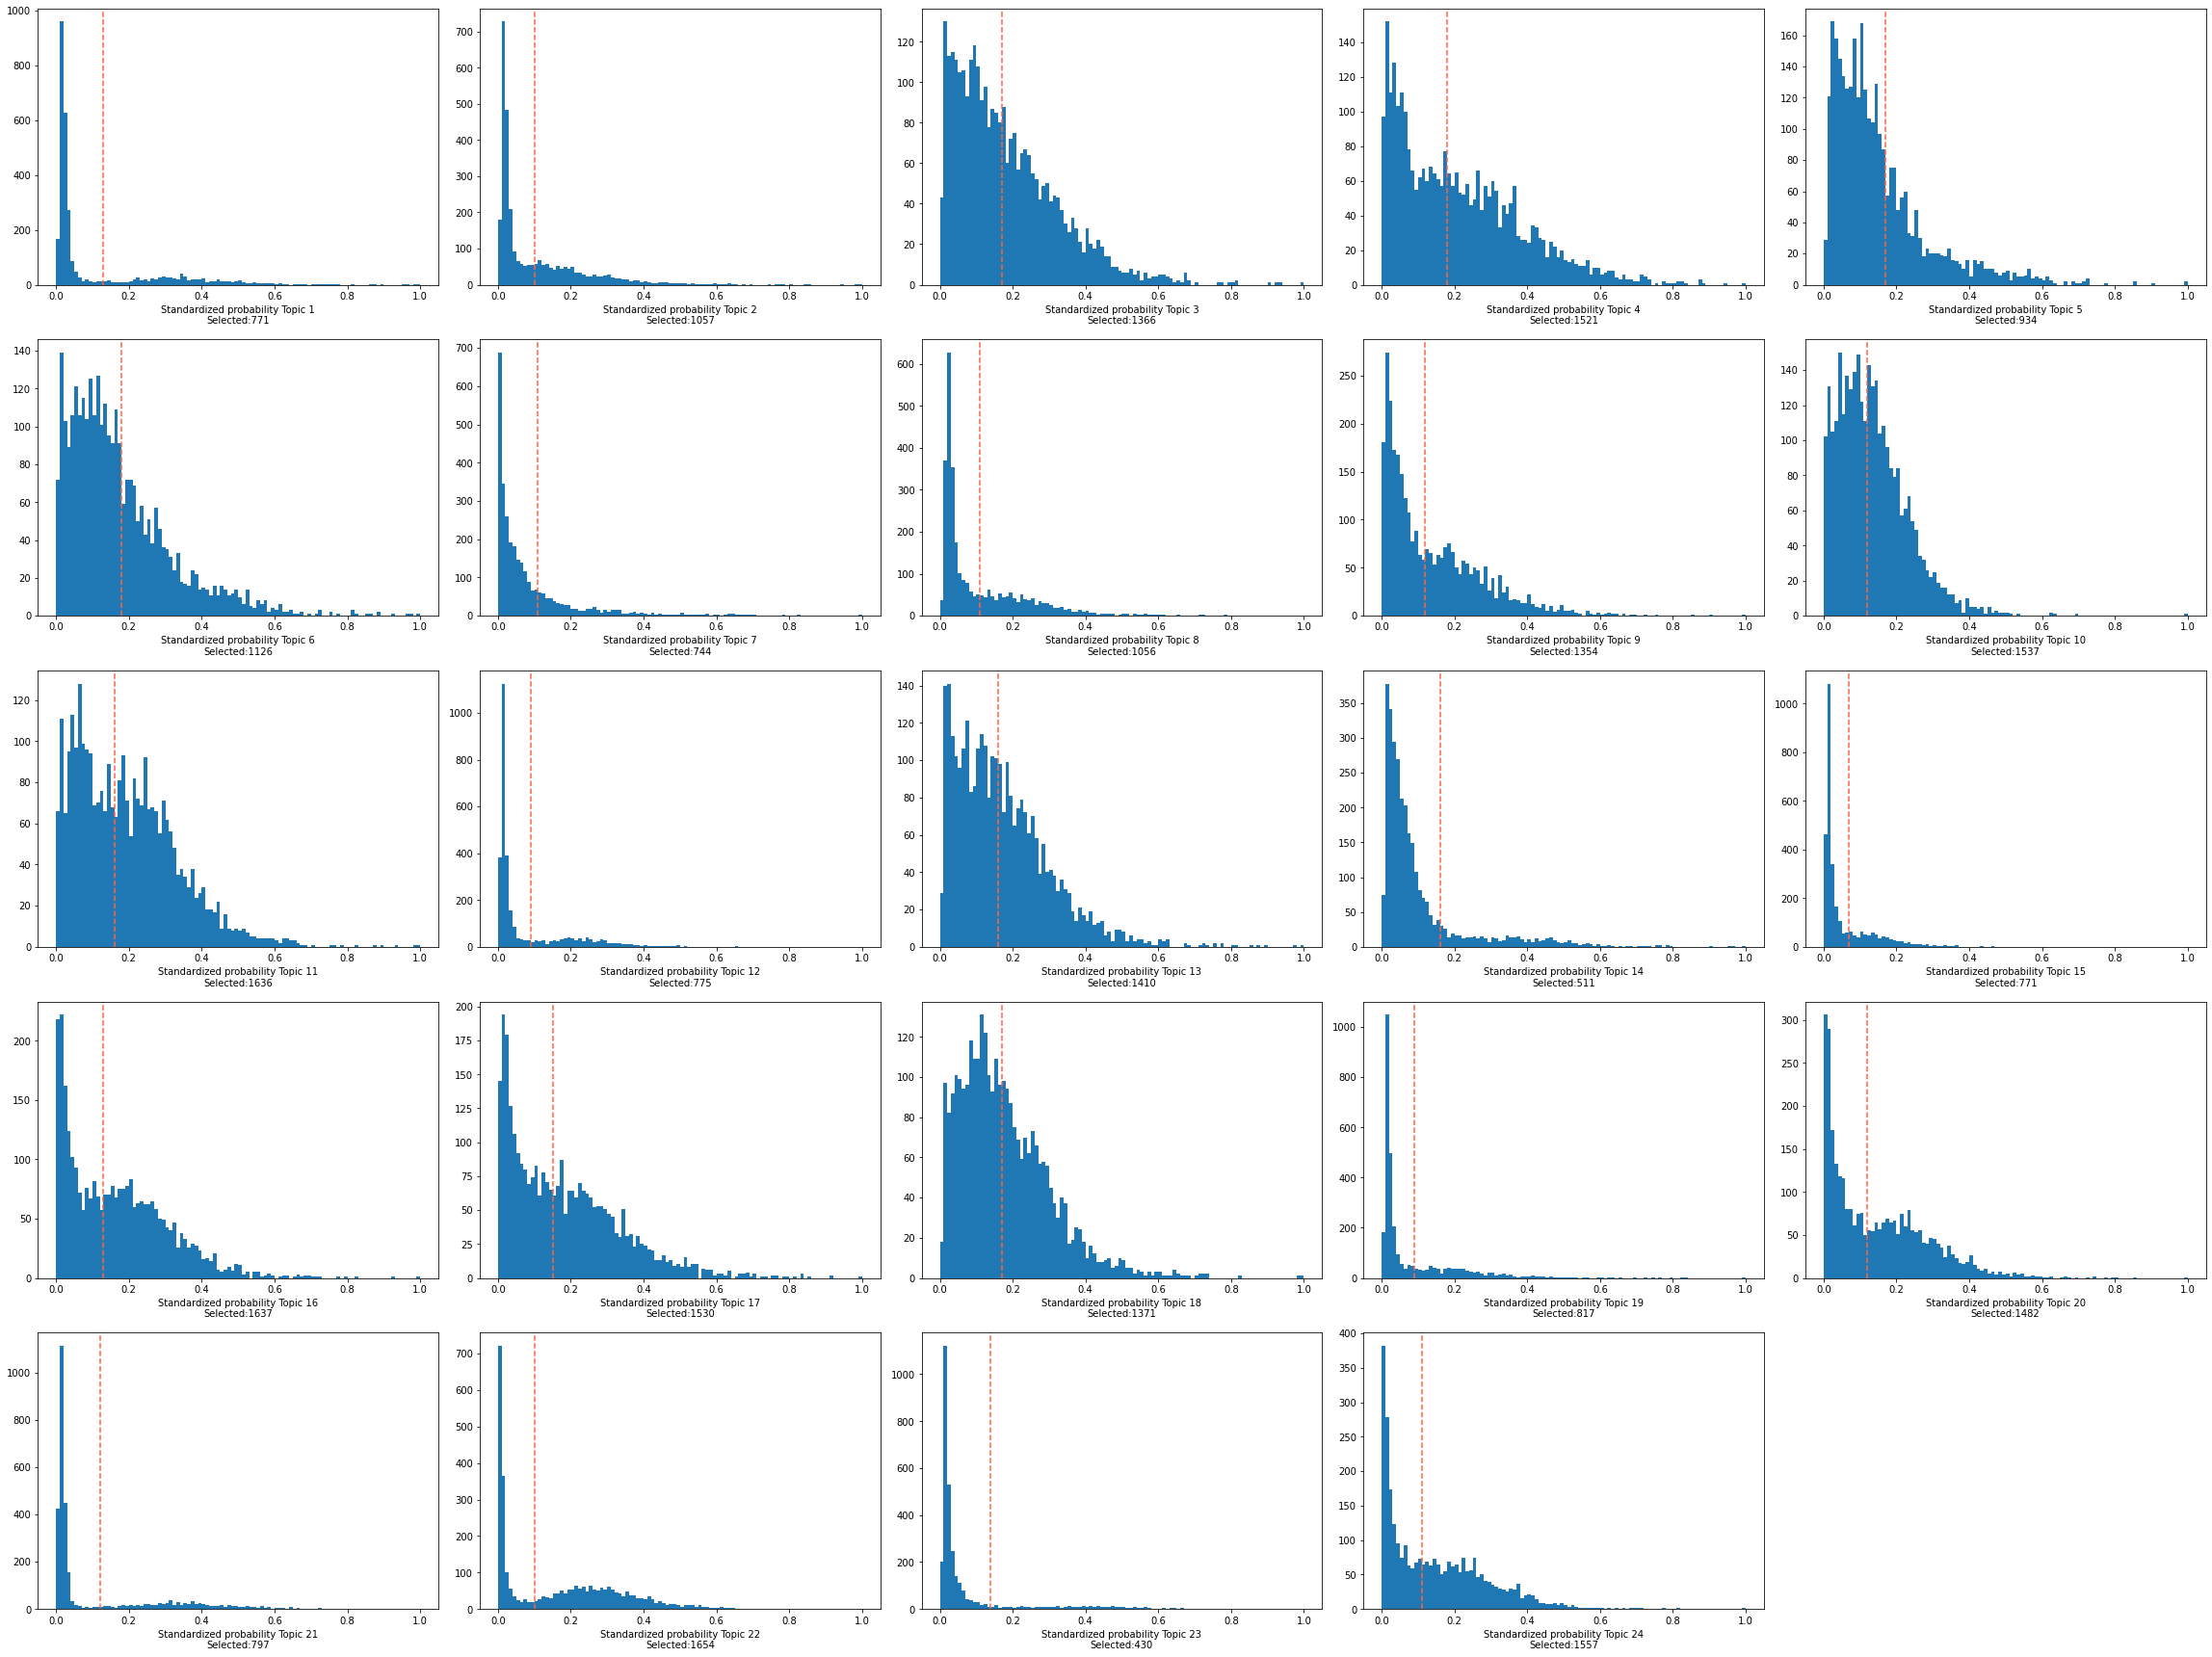

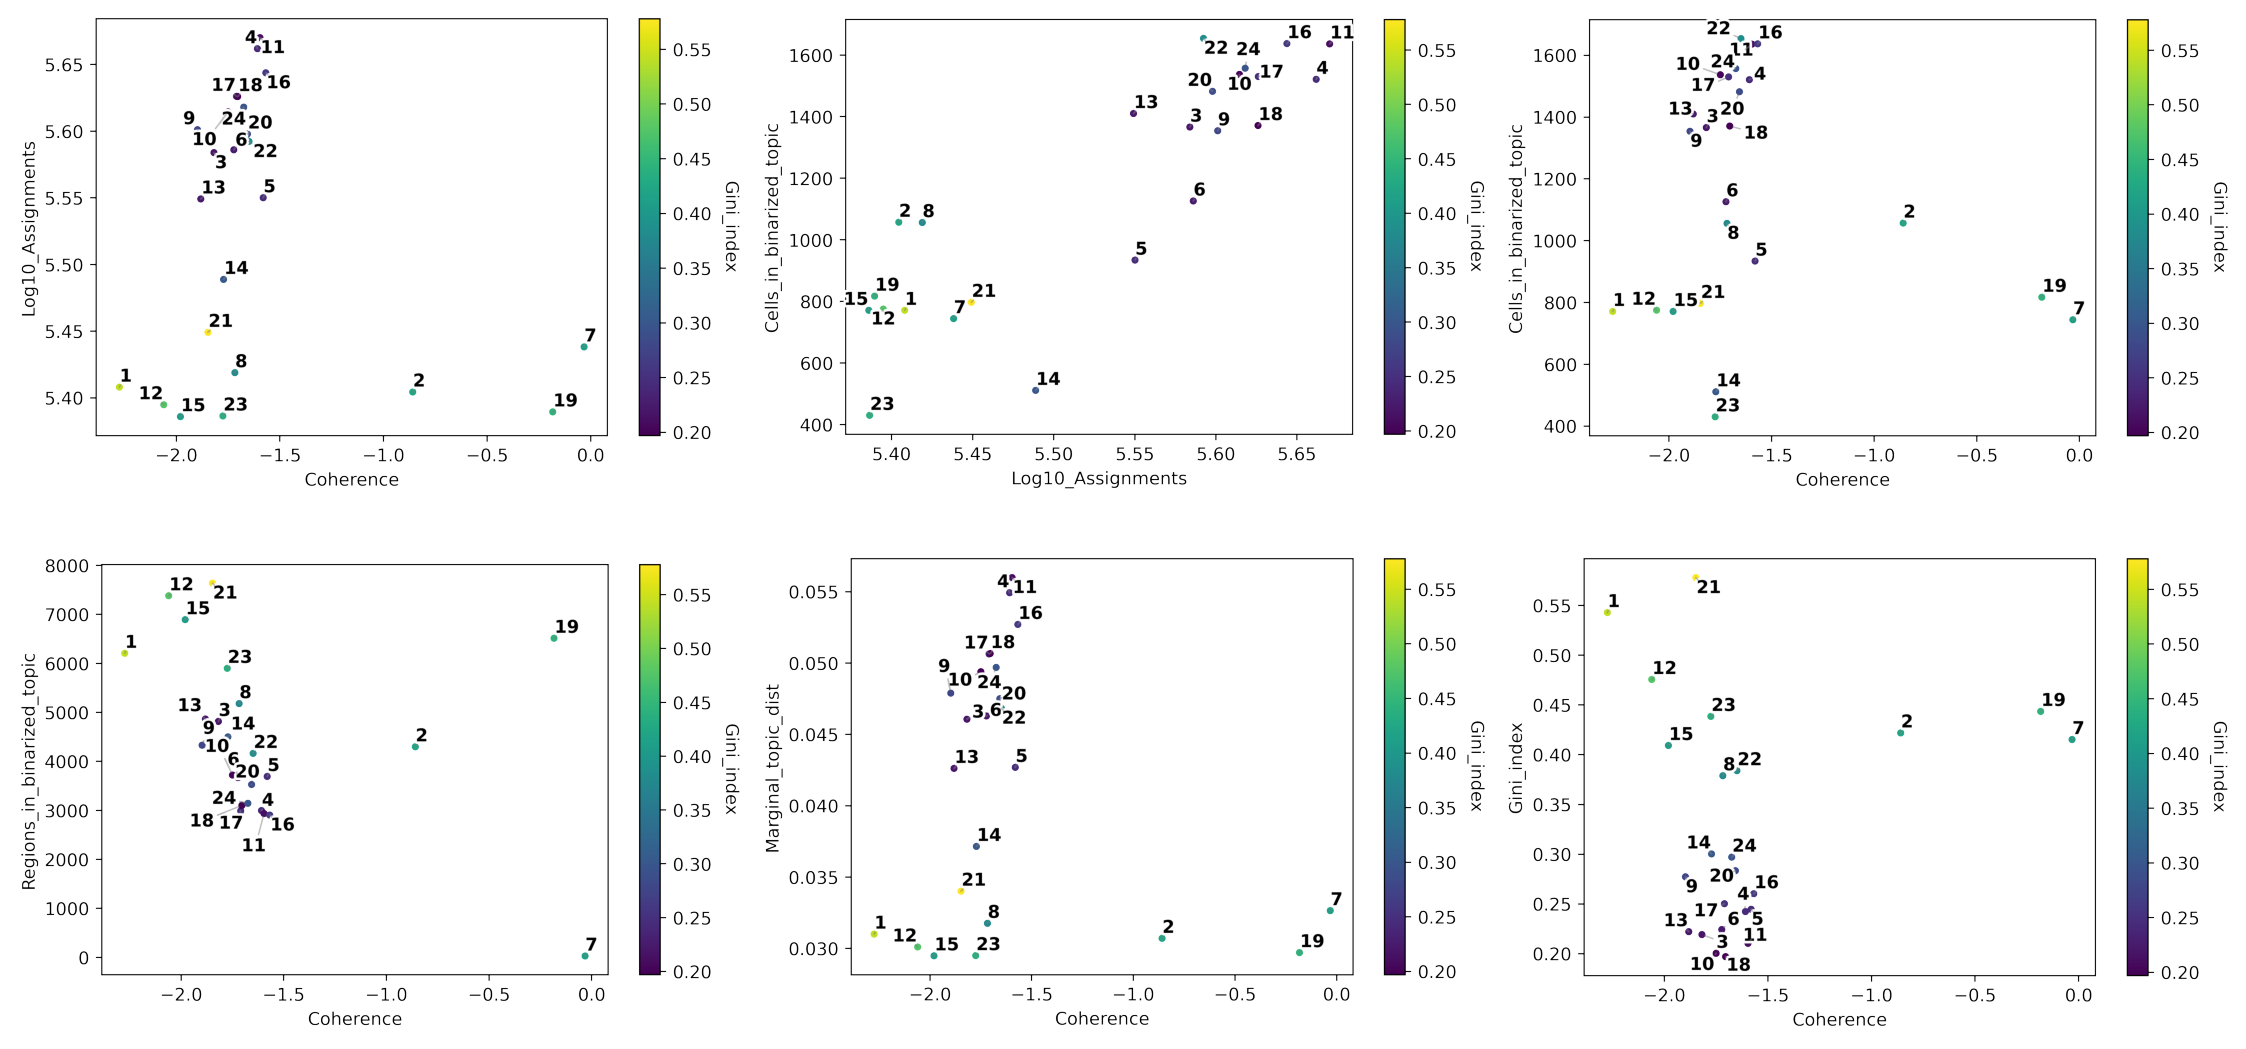

2023-03-08 12:09:05,456 cisTopic     INFO     Imputing drop-outs
2023-03-08 12:09:06,720 cisTopic     INFO     Scaling
2023-03-08 12:09:07,970 cisTopic     INFO     Keep non zero rows
2023-03-08 12:09:09,753 cisTopic     INFO     Imputed accessibility sparsity: 0.17042902038922658
2023-03-08 12:09:09,754 cisTopic     INFO     Create CistopicImputedFeatures object
2023-03-08 12:09:09,755 cisTopic     INFO     Done!
2023-03-08 12:09:09,769 cisTopic     INFO     Normalizing imputed data
2023-03-08 12:09:15,107 cisTopic     INFO     Done!
2023-03-08 12:09:19,857 cisTopic     INFO     Calculating mean
2023-03-08 12:09:20,499 cisTopic     INFO     Calculating variance


<Figure size 432x288 with 0 Axes>

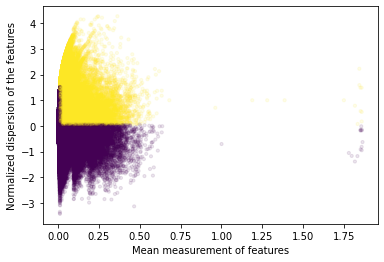

2023-03-08 12:09:31,133 cisTopic     INFO     Done!
Found 68849 variable regions
Cytotoxic T cell
CD4+ T cell
Natural killer cell
CD14+ monocyte
B cell
CD16+ monocyte
Dendritic cell


2023-03-08 12:09:35,293	INFO services.py:1470 -- View the Ray dashboard at http://127.0.0.1:8265


(markers_ray pid=1172992) 2023-03-08 12:09:39,536 cisTopic     INFO     Formatting data for s3atac_sampleA_Cytotoxic T cell_VS_s3atac_sampleB_Cytotoxic T cell
(markers_ray pid=1172993) 2023-03-08 12:09:39,834 cisTopic     INFO     Formatting data for s3atac_sampleB_Cytotoxic T cell_VS_s3atac_sampleA_Cytotoxic T cell
(markers_ray pid=1172983) 2023-03-08 12:09:40,124 cisTopic     INFO     Formatting data for s3atac_sampleA_CD4+ T cell_VS_s3atac_sampleB_CD4+ T cell
(markers_ray pid=1172987) 2023-03-08 12:09:40,490 cisTopic     INFO     Formatting data for s3atac_sampleB_CD4+ T cell_VS_s3atac_sampleA_CD4+ T cell
(markers_ray pid=1172992) 2023-03-08 12:09:40,653 cisTopic     INFO     Computing p-value for s3atac_sampleA_Cytotoxic T cell_VS_s3atac_sampleB_Cytotoxic T cell
(markers_ray pid=1172983) 2023-03-08 12:09:40,661 cisTopic     INFO     Computing p-value for s3atac_sampleA_CD4+ T cell_VS_s3atac_sampleB_CD4+ T cell
(markers_ray pid=1172985) 2023-03-08 12:09:40,712 cisTopic     INFO     

<IPython.core.display.Javascript object>

In [16]:
for sample in cistopic_obj_path_dict.keys():
    # for sample  in ['SAN_10xmultiome_1.FIXEDCELLS']:
    path = cistopic_obj_path_dict[sample]
    if not os.path.exists(f"downstream_analysis/DARs/{sample}"):
        if os.path.isfile(path):
            print(f"Loading {path}")
            with open(path, "rb") as f:
                cto = pickle.load(f)

            cto.cell_names = cto.cell_data.index
            if [x.split("-")[0] for x in cto.selected_model.cell_topic.columns] == [
                x.split("___")[0] for x in list(cto.cell_names)
            ]:
                cto.selected_model.cell_topic.columns = list(cto.cell_names)

            region_bin_topics = binarize_topics(
                cto,
                method="otsu",
                ntop=3000,
                plot=True,
                num_columns=6,
                save=f"plots_qc/{sample}__topic_region_binarized.png",
            )

            with open(
                f"downstream_analysis/binarized_topics/{sample}__topic_region_binarized.pkl",
                "wb",
            ) as f:
                pickle.dump(region_bin_topics, f, protocol=4)

            binarized_cell_topics = binarize_topics(
                cto,
                target="cell",
                method="li",
                plot=True,
                num_columns=5,
                nbins=100,
                save=f"plots_qc/{sample}__cells_topic_binarized.png",
            )

            with open(
                f"downstream_analysis/binarized_topics/{sample}__cells_topic_binarized.pkl",
                "wb",
            ) as f:
                pickle.dump(region_bin_topics, f, protocol=4)

            topic_qc_metrics = compute_topic_metrics(cto)

            with open(
                f"downstream_analysis/binarized_topics/{sample}__topic_qc.pkl", "wb"
            ) as f:
                pickle.dump(topic_qc_metrics, f, protocol=4)

            fig_dict = {
                "CoherenceVSAssignments": plot_topic_qc(
                    topic_qc_metrics,
                    var_x="Coherence",
                    var_y="Log10_Assignments",
                    var_color="Gini_index",
                    plot=False,
                    return_fig=True,
                ),
                "AssignmentsVSCells_in_bin": plot_topic_qc(
                    topic_qc_metrics,
                    var_x="Log10_Assignments",
                    var_y="Cells_in_binarized_topic",
                    var_color="Gini_index",
                    plot=False,
                    return_fig=True,
                ),
                "CoherenceVSCells_in_bin": plot_topic_qc(
                    topic_qc_metrics,
                    var_x="Coherence",
                    var_y="Cells_in_binarized_topic",
                    var_color="Gini_index",
                    plot=False,
                    return_fig=True,
                ),
                "CoherenceVSRegions_in_bin": plot_topic_qc(
                    topic_qc_metrics,
                    var_x="Coherence",
                    var_y="Regions_in_binarized_topic",
                    var_color="Gini_index",
                    plot=False,
                    return_fig=True,
                ),
                "CoherenceVSMarginal_dist": plot_topic_qc(
                    topic_qc_metrics,
                    var_x="Coherence",
                    var_y="Marginal_topic_dist",
                    var_color="Gini_index",
                    plot=False,
                    return_fig=True,
                ),
                "CoherenceVSGini_index": plot_topic_qc(
                    topic_qc_metrics,
                    var_x="Coherence",
                    var_y="Gini_index",
                    var_color="Gini_index",
                    plot=False,
                    return_fig=True,
                ),
            }

            fig = plt.figure(figsize=(40, 43))
            i = 1
            for fig_ in fig_dict.keys():
                plt.subplot(2, 3, i)
                img = fig2img(
                    fig_dict[fig_]
                )  # To convert figures to png to plot together, see .utils.py. This converts the figure to png.
                plt.imshow(img)
                plt.axis("off")
                i += 1
            plt.subplots_adjust(wspace=0, hspace=-0.70)
            # plt.tight_layout()
            plt.show()
            plt.savefig(
                f"plots_qc/{sample}__topic_qc_metrics.png", facecolor="white", dpi=150
            )

            topic_annot = topic_annotation(
                cto,
                annot_var="harmony_consensus_cell_type__mega",
                binarized_cell_topic=binarized_cell_topics,
                general_topic_thr=0.2,
            )
            topic_qc_metrics = pd.concat(
                [
                    topic_annot[
                        [
                            "harmony_consensus_cell_type__mega",
                            "Ratio_cells_in_topic",
                            "Ratio_group_in_population",
                        ]
                    ],
                    topic_qc_metrics,
                ],
                axis=1,
            )

            imputed_acc_obj = impute_accessibility(
                cto, selected_cells=None, selected_regions=None, scale_factor=10**6
            )

            normalized_imputed_acc_obj = normalize_scores(
                imputed_acc_obj, scale_factor=10**4
            )

            with open(
                f"downstream_analysis/imputed_acc_objs/{sample}__imputed_acc_obs.pkl",
                "wb",
            ) as f:
                pickle.dump(normalized_imputed_acc_obj, f, protocol=4)

            variable_regions = find_highly_variable_features(
                normalized_imputed_acc_obj,
                min_disp=0.05,
                min_mean=0.0125,
                max_mean=3,
                max_disp=np.inf,
                n_bins=20,
                n_top_features=None,
                plot=True,
                save=f"plots_qc/{sample}__HVR.png",
            )

            print(f"Found {len(variable_regions)} variable regions")
            with open(f"downstream_analysis/HVRs/{sample}__HVRs.bed", "w") as f:
                for line in [
                    x.replace(":", "\t").replace("-", "\t") for x in variable_regions
                ]:
                    f.write(f"{line}\n")

            with open(f"downstream_analysis/HVRs/{sample}__HVRs.pkl", "wb") as f:
                pickle.dump(variable_regions, f, protocol=4)

            if not os.path.exists(f"downstream_analysis/DARs/{sample}"):
                os.mkdir(f"downstream_analysis/DARs/{sample}")
                
            cto.cell_data["tech_fmx_sample_harmony_consensus_cell_type__mega"] = (
                 cto.cell_data["tech"] + "_" + cto.cell_data["fmx_sample"] + "_" + cto.cell_data["harmony_consensus_cell_type__mega"]
            )

            contrasts = []
            for tech in cto.cell_data["tech"].unique():
                for cell_type in cto.cell_data["harmony_consensus_cell_type__mega"].unique():
                    print(cell_type)
                    ct_a = tech + "_sampleA_" + cell_type
                    ct_b = tech + "_sampleB_" + cell_type
                    contrast = [[[ct_a], [ct_b]], [[ct_b], [ct_a]]]
                    contrasts = contrasts + contrast
        
            markers_dict = find_diff_features(
                cto,
                normalized_imputed_acc_obj,
                variable="tech_fmx_sample_harmony_consensus_cell_type__mega",
                var_features=variable_regions,
                contrasts=contrasts,
                adjpval_thr=0.05,
                log2fc_thr=np.log2(1),
                n_cpu=16,
            )
            with open(
                f"downstream_analysis/DARs/{sample}/{sample}__DARs_dict.pkl", "wb"
            ) as f:
                pickle.dump(markers_dict, f, protocol=4)

            for cell_type in markers_dict.keys():
                markers = markers_dict[cell_type].index.tolist()
                df = pd.DataFrame(markers)
                if len(df) == 0:
                    print(f"no DARs found for {cell_type} in {sample}")
                else:
                    df[[0, 1]] = df[0].str.split(":", expand=True)
                    df[[1, 2]] = df[1].str.split("-", expand=True)
                    df[3] = markers_dict[cell_type].index.tolist()
                    df[3] = cell_type.replace(" ", "_")  # + '_' + df[3].astype(str)
                    score = markers_dict[cell_type]["Log2FC"]
                    score = score.reset_index(drop=True)
                    df[4] = score
                    df[5] = "."
                    pval = markers_dict[cell_type]["Adjusted_pval"]
                    pval = pval.reset_index(drop=True)
                    df[6] = pval
                    name = cell_type.replace(" ", "_")
                    # name = name.replace('/', '-')
                    if not os.path.exists(f"downstream_analysis/DARs/{sample}"):
                        os.mkdir(f"downstream_analysis/DARs/{sample}")

                    df.to_csv(
                        f'downstream_analysis/DARs/{sample}/{sample}__{cell_type.replace(" ", "_")}__DARs.bed',
                        sep="\t",
                        header=False,
                        index=False,
                    )
                    df[0:2000].to_csv(
                        f'downstream_analysis/DARs/{sample}/{sample}__{cell_type.replace(" ", "_")}__DARs.TOP2k.bed',
                        sep="\t",
                        header=False,
                        index=False,
                    )

        else:
            print(f"{path} does not exist!")
    else:
        print(f"downstream_analysis/DARs/{sample} already exists!")

In [17]:
for file_path in sorted(glob.glob("downstream_analysis/DARs/*/*__DARs.bed")):
    print(file_path)
    df = pd.read_csv(file_path, sep="\t", header=None)
    df[3] = df[3] + "_" + [str(x) for x in pd.DataFrame(range(len(df)))[0]]
    df.to_csv(
        file_path.replace(".bed", ".unique.bed"), header=None, index=False, sep="\t"
    )
    df[:2000].to_csv(
        file_path.replace(".bed", ".unique.TOP2K.bed"), header=None, index=False, sep="\t"
    )

downstream_analysis/DARs/10xmultiome/10xmultiome__10xmultiome_sampleA_B_cell_VS_10xmultiome_sampleB_B_cell__DARs.bed
downstream_analysis/DARs/10xmultiome/10xmultiome__10xmultiome_sampleA_CD14+_monocyte_VS_10xmultiome_sampleB_CD14+_monocyte__DARs.bed
downstream_analysis/DARs/10xmultiome/10xmultiome__10xmultiome_sampleA_CD4+_T_cell_VS_10xmultiome_sampleB_CD4+_T_cell__DARs.bed
downstream_analysis/DARs/10xmultiome/10xmultiome__10xmultiome_sampleA_Cytotoxic_T_cell_VS_10xmultiome_sampleB_Cytotoxic_T_cell__DARs.bed
downstream_analysis/DARs/10xmultiome/10xmultiome__10xmultiome_sampleB_B_cell_VS_10xmultiome_sampleA_B_cell__DARs.bed
downstream_analysis/DARs/10xmultiome/10xmultiome__10xmultiome_sampleB_CD14+_monocyte_VS_10xmultiome_sampleA_CD14+_monocyte__DARs.bed
downstream_analysis/DARs/10xmultiome/10xmultiome__10xmultiome_sampleB_CD4+_T_cell_VS_10xmultiome_sampleA_CD4+_T_cell__DARs.bed
downstream_analysis/DARs/10xmultiome/10xmultiome__10xmultiome_sampleB_Cytotoxic_T_cell_VS_10xmultiome_sampleA

<IPython.core.display.Javascript object>

In [18]:
for file_path in sorted(glob.glob("harmony_consensus_cell_type__mega_male_female_DARs/10xmultiome_celltypefair_1.FIXEDCELLS/*/*__DARs.bed")):
    print(file_path)
    df = pd.read_csv(file_path, sep="\t", header=None)
    df[3] = df[3] + "_" + [str(x) for x in pd.DataFrame(range(len(df)))[0]]
    df.to_csv(
        file_path.replace(".bed", ".unique.bed"), header=None, index=False, sep="\t"
    )

<IPython.core.display.Javascript object>